# BTG Pactual - Análise de sentimentos

**INTEGRANTES:**


1. Dayllan de Souza Alho
2. Eric Tachdjian
3. Gabriela de Morais da Silva
4. Giovanna Furlan Torres
5. Lucas de Britto Vieira
6. Michel Mansur




# Introdução


**1.Problema a ser resolvido:**
O BTG Pactual enfrenta o desafio de otimizar suas estratégias de marketing digital e entender melhor o comportamento e preferências dos consumidores nas redes sociais. Com o aumento do investimento em marketing digital e a crescente utilização das redes sociais, a análise de dados de mídia social é fundamental para obter informações relevantes e tomar decisões de negócios mais eficazes. O objetivo é utilizar PLN para rastrear dados e analisar a receptividade dos usuários às campanhas no Instagram do banco, identificar palavras-chave nos comentários e direcionar novas campanhas baseadas nos interesses dos consumidores.

**2. Solução Proposta**
Sabendo que mais de 50% da população mundial que usa redes sociais por mais de 2 horas por dia e a crescente importância do marketing nas empresas (TAPI, 2023), o BTG Pactual em parceria com o Inteli está desenvolvendo o projeto de "Análise de Sentimento das Campanhas de Marketing em Redes Sociais". Através da tecnologia de Processamento de Linguagem Natural (PLN), será desenvolvido uma ferramenta que ajudará a empresa a compreender a receptividade dos clientes às suas campanhas de marketing e nas tomadas de decisões das áreas de negócios, através da análise de sentimento e identificação de palavras-chave nos comentários dos usuários, permitindo uma resposta rápida a possíveis problemas ou oportunidades.




A análise de sentimentos dos comentários das campanhas de marketing do instagram do BTG Pactual será realizada através do Google Colaboratory, por meio deste notebook. Nas sessões seguintes serão demonstradas passo a passo de como os dados foram utilizados até a conclusão e entrega do modelo esperado, passando pelas fases: 


1. Seleção dos dados;
2. Processamento dos dados selecionados;
3. Transformação dos dados (pré-processamento);
4. Teste do modelo; e
5. Interpretação e Avaliação do modelo;



#Setup

A configuração de setup é o processo de preparar e organizar o ambiente para uso. Envolvendo a instalação de bibliotecas e configuração de outros ajustes necessários. O objetivo é criar um ambiente funcional para executar tarefas específicas.

## 1.1.Conexão com drive

Para realizar a análise, padronização e manipulação dos dados é necessário selecionar a base de dados desejada. Neste documento a importação da mesma será feita através do Google Drive e o arquivo está em formato excel (csv).

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.2. Instalando as bibliotecas

**Antes de Importar a base é necessário instalar algumas bibliotecas como:**
1. Pandas: é uma biblioteca de análise 
de dados em Python que oferece estruturas de dados e ferramentas para manipulação e análise de dados. Com o Pandas, é possível ler, escrever e manipular dados em diversos formatos, como CSV, Excel, SQL, etc. Ele oferece uma grande quantidade de funcionalidades para trabalhar com dados em Python, incluindo a capacidade de filtrar, agregar, reorganizar e transformar dados de várias maneiras.

2. TextBlob: é uma biblioteca de processamento de linguagem natural em Python. Ela oferece uma interface simples para tarefas comuns de NLP, como análise de sentimentos, correção ortográfica, extração de frases-chave e classificação de texto. O TextBlob é construído sobre a biblioteca NLTK (Natural Language Toolkit) e oferece uma sintaxe fácil de usar para muitas tarefas de processamento de linguagem natural. É uma biblioteca muito útil para análise de texto em Python.

3. Emoji: é uma biblioteca Python que permite a conversão de emojis de texto para representações de texto Unicode e vice-versa. Além disso, fornece funções úteis para trabalhar com emojis, como contar o número de emojis em uma string, remover todos os emojis de uma string e substituir cada emoji em uma string por um texto de substituição especificado.

4. Re: A biblioteca "re" é uma ferramenta para trabalhar com expressões regulares, permitindo a extração e manipulação de informações de forma eficiente. 

5. Unidecode: Unicode é um padrão de codificação de caracteres de forma universal para a representação de caracteres de todas as línguas escritas, bem como símbolos matemáticos, musicais, entre outros.

6. Enelvo.normaliser: A enelvo.normaliser é uma biblioteca específica para normalização de texto em português. Ela oferece recursos para corrigir erros de digitação, converter abreviações e substituir palavras informais por suas formas mais corretas. A função principal dessa biblioteca é auxiliar na normalização de texto, tornando-o mais padronizado e compreensível.

7. Numpy (np): A biblioteca numpy fornece estruturas de dados eficientes para manipulação e cálculos numéricos, além de funções matemáticas de alto desempenho.

8. Sklearn.feature_extraction.text.CountVectorizer: É uma classe do scikit-learn que converte uma coleção de documentos de texto em uma matriz de contagem de tokens. Cada documento é representado por um vetor onde cada elemento é o número de ocorrências de um token específico no documento.

9. Keras.preprocessing.text.Tokenizer: É uma classe do Keras que é usada para pré-processamento de texto. Ela converte texto em sequências de números inteiros (índices de palavras) ou matrizes esparsas. Também oferece recursos como tokenização, vetorização e indexação de palavras.

10. Nltk.tokenize.word_tokenize: É uma função do NLTK (Natural Language Toolkit) que divide um texto em uma lista de palavras ou tokens. É uma forma de tokenização que leva em consideração o contexto linguístico para separar as palavras.

In [3]:
pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 8.3 MB/s eta 0:00:00


In [4]:
pip install -U emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.8/355.8 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.5.0-py2.py3-none-any.whl size=351211 sha256=f054581c0b7295cdbde2f20e46585434165b1d5d5ef252c26514010247cacfb9
  Stored in directory: /root/.cache/pip/wheels/2a/0c/2c/07b5af72b120503fe24590691d24c462a25e5e530db8700a96
Successfully built emoji


In [5]:
!pip install emoji --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
pip install enelvo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 19.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234911 sha256=4bf763a8f9b3f17575e71350b25fdd2fd02d5a9487e8f69b336223b1eca4bc4d
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.5.0
    Uninstalling emoji-2.5.0:
      Successfully uninstalled emoji-2.5.0


In [8]:
import pandas as pd
from textblob import TextBlob
import emoji
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
nltk.download('wordnet')
import re
import unidecode
from enelvo.normaliser import Normaliser
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from unidecode import unidecode


import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import StandardScaler

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [9]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

from gensim.models import Word2Vec

## 1.3.Lendo CSV

In [10]:
base = pd.read_csv('/content/drive/MyDrive/PROJETO BTG/BaseDadosBTG2.csv')

A célula de código abaixo é responsável por realizar a leitura e apresentação dos dados carregados da base na etapa anterior.

**dados** - Apresenta a planilha dos comentários das campanhas de marketing do instagram do BTG Pactual

## 1.4.Visualização dos tipos de colunas

As colunas apresentadas na base de dados disponibilizada possui tipos diferentes de formatação, sendo divididos em:

1. **float :** Responsável por armazenar números reais com precisão de 6 casas decimais;
2. **object :** Responsável por armazenar qualquer tipo de dado genêrico, utilizado para representar características abstratas;
3. **int64 :** Dado numérico que pode armazenar valores inteiros de até 64 bits.

O código abaixo apresenta os tipos encontrados na planilha BaseBTGM6. 

In [11]:
base.dtypes

id                        int64
dataPublicada            object
autor                    object
texto                    object
sentimento               object
tipoInteracao            object
anomalia                  int64
probabilidadeAnomalia     int64
linkPost                 object
processado                int64
contemHyperlink           int64
autor_anonimo             int64
textoLimpo               object
diferenca                object
dtype: object

### 1.4.1 Retirando as "" dos nomes das colunas

Como é possível observar acima as colunas estão nomeadas com aspas, e para um melhor aproveitamento do código é preciso retirar essa pontuação dos nomes.

#### 1.4.1.1 Teste isolado da remoção das aspas

In [12]:
#Criando um dataframe para teste
teste = pd.DataFrame({'"Nome"': ['Gabriela', 'Giovanna'], '"Idade"': [20, 30]})
print(teste.head())

#Função de tirar aspas dos nomes das colunas 
def tiraAspas(teste):
    teste.columns = [col.replace('"', '') for col in teste.columns]
    return teste

#Aplicação da função
teste = tiraAspas(teste)
print(teste.head())

     "Nome"  "Idade"
0  Gabriela       20
1  Giovanna       30
       Nome  Idade
0  Gabriela     20
1  Giovanna     30


#### 1.4.1.2. Definição da função

In [13]:
def tiraAspas(base):
    base_rename = base.rename(columns=lambda x: re.sub('[\"\']', '', x))
    return base_rename


#### 1.4.1.3. Aplicação da função tiraAspas

In [14]:
# Aplicando a função na base de dados
base_rename = tiraAspas(base)
#Resultado da função
base_rename

,id,dataPublicada,autor,texto,sentimento,tipoInteracao,anomalia,probabilidadeAnomalia,linkPost,processado,contemHyperlink,autor_anonimo,textoLimpo,diferenca
0,1,2022-03-04 09:38:00,v8_capital,Confira os resultados dos nossos fundos no mês...,NEUTRAL,marcação,1,52,https://www.instagram.com/p/CarqO6drRux/,0,0,1,NaN,445 days 14:22:00
1,2,2022-03-04 09:29:00,winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,0,43,https://www.instagram.com/p/CarpQUluh7z/,0,0,2,NaN,445 days 14:31:00
2,3,2022-03-04 09:20:00,marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação,0,45,https://www.instagram.com/p/CaroK9Nu8tC/,0,0,3,NaN,445 days 14:40:00
3,4,2022-03-04 08:36:00,lmviapiana,Minuto touro de ouro,POSITIVE,comentário,0,38,https://www.instagram.com/p/CapXhB5Lvas/#17977...,0,0,4,NaN,445 days 15:24:00
4,5,2022-03-03 21:10:00,vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,0,17,https://www.instagram.com/p/CapXhB5Lvas/#17842...,0,0,5,NaN,446 days 02:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12350,3044013,2022-11-30 11:51:00,onixcapital,Uma noite de encontros e muito conhecimento on...,NEUTRAL,marcação,1,54,https://www.instagram.com/reel/CllsqI7goSC/,0,0,4003,Uma noite de encontros e muito conhecimento on...,174 days 12:09:00
12351,3044212,2022-11-30 12:25:00,amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação,0,39,https://www.instagram.com/p/Cllw0CmNGkX/,0,0,697,Erros financeiros para eliminar antes dos 30 a...,174 days 11:35:00
12352,3044213,2022-11-30 12:18:00,jayipacderota,Estou muito grato por todo o esforço que você ...,POSITIVE,comentário,1,52,https://www.instagram.com/p/CllkSBOuKlJ/#17960...,0,0,5838,Estou muito grato por todo o esforço que você ...,174 days 11:42:00
12353,3044412,2022-11-30 12:50:00,moinho_cultural,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,marcação,0,43,https://www.instagram.com/reel/ClluX-cAoaf/,0,0,5103,"""backhand_index_pointing_rightGUADAKAN está ch...",174 days 11:10:00


### 1.4.2.Explicação das colunas

#### 1.4.2.1.Colunas utilizadas

## 1.6. Formatação de Data

Esta etapa foi feita pois os cometários feitos 3 meses depois da postagem de uma campanha não são interessantes para a análise.

### 1.6.1.Teste isolado

In [15]:
# # Carregar a base de dados
# teste = pd.DataFrame({'dataPublicada': ['2022-01-01 10:00:00', '2022-01-02 14:30:00', '2022-01-03 20:45:00', '2022-01-04 09:15:00'] })

# # Remover as aspas duplas da coluna 'dataPublicada'
# teste['dataPublicada'] = teste['dataPublicada'].apply(lambda x: x.replace('"', ''))

# # Imprimir a coluna 'dataPublicada' sem as aspas duplas
# print(teste['dataPublicada'])

# # Converter a coluna 'data' para o formato de data
# teste['dataPublicada'] = pd.to_datetime(teste['dataPublicada'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# # Verificar se existem valores válidos na coluna 'dataPublicada'
# if teste['dataPublicada'].notna().any():
#     # Obter a data atual
#     data_atual = pd.Timestamp.now().normalize()

#     # Calcular a diferença entre cada data na coluna e a data atual
#     teste['diferenca'] = abs(teste['dataPublicada'] - data_atual)

#     # Verificar se existem valores válidos na coluna 'diferenca'
#     if teste['diferenca'].notna().any():
#         # Encontrar a data com a menor diferença
#         data_mais_proxima = teste['dataPublicada'].loc[teste['diferenca'].idxmin()]

#         print("A data mais próxima do dia atual é:", data_mais_proxima)
#     else:
#         print("Não há valores válidos na coluna 'diferenca'.")
# else:
#     print("Não há valores válidos na coluna 'dataPublicada'.")

# # Calcular a data três meses antes da data mais próxima
# data_tres_meses_antes = data_mais_proxima - pd.DateOffset(months=3)

# # Filtrar apenas as datas que são três meses antes da data mais próxima
# datas_filtradas = teste.loc[teste['dataPublicada'] >= data_tres_meses_antes]

# print("Datas três meses antes da data mais próxima:")
# print(datas_filtradas['dataPublicada'])

# # Criar um novo DataFrame com as colunas que atendem à regra
# dadosTeste = teste[teste['dataPublicada'] >= data_tres_meses_antes][['dataPublicada']].copy()
# dadosTeste

### 1.6.2.Datas antes da formatação

In [16]:
# base_rename

In [17]:
# base_rename['dataPublicada']

### 1.6.3.Processando a coluna dataPublicada

In [18]:
# # Remover as aspas duplas da coluna 'dataPublicada' 
# base_rename['dataPublicada'] = base_rename['dataPublicada'].astype(str).apply(lambda x: x.replace('"', ''))

# # Imprimir a coluna 'dataPublicada' sem as aspas duplas
# print(base_rename['dataPublicada'])

In [19]:
# # Converter a coluna 'data' para o formato de data
# base_rename['dataPublicada'] = pd.to_datetime(base_rename['dataPublicada'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# # Verificar se existem valores válidos na coluna 'dataPublicada'
# if base_rename['dataPublicada'].notna().any():
#     # Obter a data atual
#     data_atual = pd.Timestamp.now().normalize()

#     # Calcular a diferença entre cada data na coluna e a data atual
#     base_rename['diferenca'] = abs(base_rename['dataPublicada'] - data_atual)

#     # Verificar se existem valores válidos na coluna 'diferenca'
#     if base_rename['diferenca'].notna().any():
#         # Encontrar a data com a menor diferença
#         data_mais_proxima = base_rename['dataPublicada'].loc[base_rename['diferenca'].idxmin()]

#         print("A data mais próxima do dia atual é:", data_mais_proxima)
#     else:
#         print("Não há valores válidos na coluna 'diferenca'.")
# else:
#     print("Não há valores válidos na coluna 'dataPublicada'.")


Buscando três meses antes do último registro do DataFrame

In [20]:
# # Calcular a data três meses antes da data mais próxima
# data_tres_meses_antes = data_mais_proxima - pd.DateOffset(months=3)

# # Filtrar apenas as datas que são três meses antes da data mais próxima
# datas_filtradas = base_rename.loc[base_rename['dataPublicada'] >= data_tres_meses_antes]

# print("Datas três meses antes da data mais próxima:")
# print(datas_filtradas['dataPublicada'])

In [21]:
# # Criar um novo DataFrame com as colunas que atendem à regra
# dados = base_rename[base_rename['dataPublicada'] >= data_tres_meses_antes][['dataPublicada', 'autor_anonimo', 'texto', 'sentimento', 'tipoInteracao']].copy()

## 1.7. Base Tratada

In [22]:
dados = base_rename[['autor', 'texto', 'sentimento', 'tipoInteracao']].copy()

In [23]:
dados

,autor,texto,sentimento,tipoInteracao
0,v8_capital,Confira os resultados dos nossos fundos no mês...,NEUTRAL,marcação
1,winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação
2,marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação
3,lmviapiana,Minuto touro de ouro,POSITIVE,comentário
4,vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta
...,...,...,...,...
12350,onixcapital,Uma noite de encontros e muito conhecimento on...,NEUTRAL,marcação
12351,amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação
12352,jayipacderota,Estou muito grato por todo o esforço que você ...,POSITIVE,comentário
12353,moinho_cultural,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,marcação


# Explicação das Etapas

## Teste Isolado 

Define-se um teste isolado, como o teste do sistema de forma independente, verificando todo o processo específico, sem interferência de outros componentes. A execução é feita de forma separada, com o fornecimento da entrada específica, auxiliando na identificação de problemas, além de permitir "guardar" a lógica utilizada no desenvolvimento do programa em larga escala.

## Teste da Função

Responsável pela verificação do funcionamento da função específica do sistema. Busca Verificar se a função produz os resultados esperados.

Através dela, nesse programa,a criamos a pipeline do sistema. Uma sequência de processos que são executados em uma determinada ordem, buscando modificar no caso, realizar o pré-processamento dos textos fornecidos. Assim, utiliza-se o resultado da etapa anterior como entrada para a próxima. O objetivo é automatizar a execuçã dividindo-as em tarefas menores e mais simples.

# Atividade 1: Remoção de comentários do BTGPactual

## 1.1.Teste isolado da remoção de comentários do BTGPactual

In [24]:
# Criando um DataFrame para o teste
teste = pd.DataFrame({
    'autor': ['@btgPactual', '@inteli', '@btgPactual', '@btgPactual', '@inteli', '@SisitemasDeInformação'],
    'texto': ['Obrigada pelo feedback', 'Poderia Melhorar as transações do pix', 'Obrigada pelo feedback', 'Obrigada pelo feedback', 'Gosto muito no BTG', 'Sistemas é o melhor curso.']
})

print(teste)

# Função de retirar comentários do BTGPactual
def filtrar_dados_por_autor(teste, autor):
    # Filtra os dados por autor, removendo as linhas em que a coluna 'autor' contém a string passada como parâmetro.
    # Substitui os valores nulos (NaN) da coluna 'autor' por 'desconhecido'.
    # Retorna um novo DataFrame com as linhas filtradas.
    # Substitui os valores nulos (NaN) da coluna 'autor' por 'desconhecido'.
    teste['autor'] = teste['autor'].fillna('desconhecido')

    # Cria um novo DataFrame chamado 'dados_filtrados', que contém todas as linhas do DataFrame original (dados), exceto aquelas em que a coluna 'autor' contém a string passada como parâmetro.
    # O operador ~ é usado para selecionar todas as linhas em que a condição 'dados['autor'].str.contains(autor)' é falsa.
    dados_filtrados = teste[~teste['autor'].str.contains(autor)]
    
    return dados_filtrados

dados_filtrados = filtrar_dados_por_autor(teste, '@btgPactual')
print(dados_filtrados)


                    autor                                  texto
0             @btgPactual                 Obrigada pelo feedback
1                 @inteli  Poderia Melhorar as transações do pix
2             @btgPactual                 Obrigada pelo feedback
3             @btgPactual                 Obrigada pelo feedback
4                 @inteli                     Gosto muito no BTG
5  @SisitemasDeInformação             Sistemas é o melhor curso.
                    autor                                  texto
1                 @inteli  Poderia Melhorar as transações do pix
4                 @inteli                     Gosto muito no BTG
5  @SisitemasDeInformação             Sistemas é o melhor curso.


## 1.2. Definição de Função

Função de remoção de autor

In [25]:
def filtrar_dados_por_autor(dados, autor_anonimo):
    # Converter a coluna 'autor_anonimo' para o tipo string
    dados['autor'] = dados['autor'].astype(str)
    
    # Filtrar os dados por autor, removendo as linhas em que a coluna 'autor_anonimo' contém a string passada como parâmetro
    # Substituir os valores nulos (NaN) da coluna 'autor_anonimo' por 'desconhecido'
    dados_anonimos = dados[~dados['autor'].str.contains(autor_anonimo, na=False)]
    
    return dados_anonimos

## 1.3. Testes da Função de Remoção de autor

In [26]:
dados_filtrados = filtrar_dados_por_autor(dados, 'autor_anonimo')
dados_filtrados

,autor,texto,sentimento,tipoInteracao
0,v8_capital,Confira os resultados dos nossos fundos no mês...,NEUTRAL,marcação
1,winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação
2,marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação
3,lmviapiana,Minuto touro de ouro,POSITIVE,comentário
4,vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta
...,...,...,...,...
12350,onixcapital,Uma noite de encontros e muito conhecimento on...,NEUTRAL,marcação
12351,amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação
12352,jayipacderota,Estou muito grato por todo o esforço que você ...,POSITIVE,comentário
12353,moinho_cultural,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,marcação


## 1.4 - Salvando CSV da Remoção de Autor

In [27]:
# Chamar a função para filtrar os dados por autor anônimo/content/drive/MyDrive/PROJETO BTG/dados_filtrados.csv
autor_anonimo = 'desconhecido'  # Substitua pela string que representa o autor anônimo
dados_filtrados = filtrar_dados_por_autor(dados, autor_anonimo)

# Verificar o resultado
print(dados_filtrados.head())

# Salvar os dados filtrados em um novo arquivo CSV
dados_filtrados.to_csv('/content/drive/MyDrive/PROJETO BTG/remocaoautor.csv', index=False)
print('Dados filtrados salvos com sucesso.')


           autor                                              texto  \
0     v8_capital  Confira os resultados dos nossos fundos no mês...   
1  winthegame_of  A Alvarez & Marsal estará conosco no Sportainm...   
2     marta_bego  #Repost btgpactual with make_repost ・・・ Entend...   
3     lmviapiana                               Minuto touro de ouro   
4   vanilson_dos                                   @ricktolledo Sim   

  sentimento tipoInteracao  
0    NEUTRAL      marcação  
1    NEUTRAL      marcação  
2    NEUTRAL      marcação  
3   POSITIVE    comentário  
4    NEUTRAL      resposta  
Dados filtrados salvos com sucesso.


In [28]:
dados_filtrados = pd.read_csv('/content/drive/MyDrive/PROJETO BTG/remocaoautor.csv')
dados_filtrados

,autor,texto,sentimento,tipoInteracao
0,v8_capital,Confira os resultados dos nossos fundos no mês...,NEUTRAL,marcação
1,winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação
2,marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação
3,lmviapiana,Minuto touro de ouro,POSITIVE,comentário
4,vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta
...,...,...,...,...
12350,onixcapital,Uma noite de encontros e muito conhecimento on...,NEUTRAL,marcação
12351,amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação
12352,jayipacderota,Estou muito grato por todo o esforço que você ...,POSITIVE,comentário
12353,moinho_cultural,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,marcação


## 1.5. Anonimização

Anonimizar dados é importante para garantir a privacidade e a segurança das informações pessoais dos indivíduos de forma ética e responsável. Além disso, ajuda a evitar viés. 

### 1.5.1.Teste isolado 

In [29]:
# # Criar um dataframe de exemplo
# teste = pd.DataFrame({
#     'autor': ['Dayllan', 'Erick', 'Gabriela', 'Giovanna', 'Lucas', 'Michel'],
#     'comentario': ['Gostei do produto', 'Não gostei', 'Concordo com o Lucas', 'Achei muito caro', 'Gostei bastante', 'Não compraria de novo']
# })

# # Criar um dicionário para mapear cada autor ao seu identificador numérico
# autores = teste['autor'].unique()
# mapeamento = {autor: i+1 for i, autor in enumerate(autores)}

# # Adicionar uma nova coluna com o identificador numérico
# teste['autor_anonimo'] = teste['autor'].map(mapeamento)

# # Exibir o resultado
# print(teste)

### 1.5.2.Definição da função de anonimação

In [30]:
# # Criar um dicionário para mapear cada autor ao seu identificador numérico
# autores = base_rename['autor'].unique()
# mapeamento = {autor: i+1 for i, autor in enumerate(autores)}

# # Adicionar uma nova coluna com o identificador numérico
# base_rename['autor_anonimo'] = base_rename['autor'].map(mapeamento)

# # Salvar o dataframe com a nova coluna
# base_rename.to_csv('/content/drive/MyDrive/PROJETO BTG/BaseDadosBTG2.csv', index=False)

### 1.5.3. Teste da Anonimização

In [31]:
# base_rename

In [32]:
# base_rename['autor_anonimo']

A remoção dos comentários relacionados à empresa BTG Pactual da coluna “autor” da base de dados, foi realizada uma vez que o objetivo é analisar as opiniões e sentimentos expressos pelos usuários em relação à empresa, e incluir os comentários feitos pela própria empresa poderia enviesar os resultados. 

# Atividade 2: Descrição de emojis de Emojis

Emoji é uma representação gráfica que neste contexto pode expressar sentimentos. Sendo assim foi utilizado um método de tradução e interpretação do emoji.

## 2.1.Teste isolado para função de descrição de emojis

In [33]:
# criando DataFrame de teste
teste = pd.DataFrame({'texto': ['Oi 👋', 'Tudo bem? 😊', '🌞☕']})
teste['texto']

# define a função de remoção de emojis
def removeEmoji():
    remove_emoji = lambda x: emoji.demojize(str(x)).replace(":", "").strip()
    return remove_emoji

# Aplica a função 
teste['textoLimpo'] = teste['texto'].apply(removeEmoji())
teste['textoLimpo']

0                              Oi waving_hand
1    Tudo bem? smiling_face_with_smiling_eyes
2                   sun_with_facehot_beverage
Name: textoLimpo, dtype: object

## 2.2. Descrição da função

In [34]:
# Define a função de remoção de emojis
def removeEmoji(text):
    remove_emoji = lambda x: emoji.demojize(str(x)).replace(":", "").strip()
    return remove_emoji(text)

# Aplica a função à coluna "texto" do DataFrame
def removeEmoji_(dados_filtrados):
    dados_filtrados['texto'] = dados_filtrados['texto'].apply(removeEmoji)   
    return dados_filtrados
# Aplicar a função removeEmoji_ ao DataFrame dados_filtrados
dados_sem_emoji = removeEmoji_(dados_filtrados)

## 2.3. Teste da função

In [35]:
dados_sem_emoji

,autor,texto,sentimento,tipoInteracao
0,v8_capital,Confira os resultados dos nossos fundos no mês...,NEUTRAL,marcação
1,winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação
2,marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação
3,lmviapiana,Minuto touro de ouro,POSITIVE,comentário
4,vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta
...,...,...,...,...
12350,onixcapital,Uma noite de encontros e muito conhecimento on...,NEUTRAL,marcação
12351,amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação
12352,jayipacderota,Estou muito grato por todo o esforço que você ...,POSITIVE,comentário
12353,moinho_cultural,"""backhand_index_pointing_rightGUADAKAN está ch...",NEUTRAL,marcação


## 2.4 - Salvando CSV do texto sem Emoji

In [36]:
# Salvar o DataFrame com todas as colunas originais e a coluna "texto" sem emojis em um novo arquivo CSV
dados_sem_emoji.to_csv('/content/drive/MyDrive/PROJETO BTG/texto_sem_emoji.csv', index=False)

print('Dados com coluna "texto" sem emojis salvos com sucesso.')

Dados com coluna "texto" sem emojis salvos com sucesso.


In [37]:
dados_sem_emoji = pd.read_csv('/content/drive/MyDrive/PROJETO BTG/texto_sem_emoji.csv')
dados_sem_emoji

,autor,texto,sentimento,tipoInteracao
0,v8_capital,Confira os resultados dos nossos fundos no mês...,NEUTRAL,marcação
1,winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação
2,marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação
3,lmviapiana,Minuto touro de ouro,POSITIVE,comentário
4,vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta
...,...,...,...,...
12350,onixcapital,Uma noite de encontros e muito conhecimento on...,NEUTRAL,marcação
12351,amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação
12352,jayipacderota,Estou muito grato por todo o esforço que você ...,POSITIVE,comentário
12353,moinho_cultural,"""backhand_index_pointing_rightGUADAKAN está ch...",NEUTRAL,marcação


# Atividade 3: Remoção de pontuações e acentos.

As pontuações e acentos não carregam significado semântico ou lexical relevante. O uso deles pode dificultar a análise de textos e a comparação de palavras. Além de poder tornar mais difícil o treinamento e a aplicação de modelos de PLN. Logo o processo de remoção de pontuações e acentos pode ajudar a normalizar o texto e reduzir o número de recursos que precisam ser analisados e comparados. 

Ou seja, visa a remoção de símbolos de pontuação, e caracteres especiais, os quais não possuem significado semântico e podem interferir em análises de texto. A remoção é feita usando expressões regulares, colaborando para simplificar o texto, resultando em análises mais eficientes.

## 3.1.Remoção de pontuações 

###3.1.1 Teste isolado

Foi utilizado o parâmetro [^\w\s]|_ para localizar e substituir caracteres não alfanuméricos em uma string.

In [38]:
#Criando dataframe para teste isolado 
teste = pd.DataFrame({'texto': ['@BTGPacual tem como ajudar a @Ana_clara #obrigado!', 'Olá!@BtgPac_tual Tudo bem_?']})

def removeCaracteres(texto):
    if isinstance(texto, str): #verifica se o que está sendo processado é uma string
        return re.sub(r'[^\w\s]|_', ' ', texto)#substituir todos os caracteres especiais por uma string vazia 
    else:
        return texto
# define a função de remoção de caracteres
remove_caracteres = lambda x: removeCaracteres(str(x))
#Aplica a função 
teste['texto'] = teste['texto'].apply(remove_caracteres)
teste['texto']

0     BTGPacual tem como ajudar a  Ana clara  obrig...
1                          Olá  BtgPac tual Tudo bem  
Name: texto, dtype: object

## 3.1.2.Definição da função remove caracteres especiais

Foi utilizado o parâmetro [^\w\s] para localizar e substituir caracteres não alfanuméricos em uma string.

In [39]:
# Define a função de remoção de caracteres especiais
def removeCaracteres(text):
    if isinstance(text, str):
        return re.sub(r'[^\w\s]', '', text)
    else:
        return text

# Aplica a função à coluna "texto" do DataFrame
dados_sem_caracteres = dados.copy()
dados_sem_caracteres['texto'] = dados_sem_caracteres['texto'].apply(removeCaracteres)

## 3.1.3. Teste da função remove caracteres e salvando o CSV

In [40]:
# Salvar o DataFrame com todas as colunas originais e a coluna "texto" sem caracteres especiais em um novo arquivo CSV
dados_sem_caracteres.to_csv('/content/drive/MyDrive/PROJETO BTG/dados_sem_caracteres.csv', index=False)

print('Dados com coluna "texto" sem caracteres especiais salvos com sucesso.')

Dados com coluna "texto" sem caracteres especiais salvos com sucesso.


In [41]:
dados_sem_caracteres = pd.read_csv('/content/drive/MyDrive/PROJETO BTG/dados_sem_caracteres.csv')
dados_sem_caracteres

,autor,texto,sentimento,tipoInteracao
0,v8_capital,Confira os resultados dos nossos fundos no mês...,NEUTRAL,marcação
1,winthegame_of,A Alvarez Marsal estará conosco no Sportainme...,NEUTRAL,marcação
2,marta_bego,Repost btgpactual with make_repost Entenda os...,NEUTRAL,marcação
3,lmviapiana,Minuto touro de ouro,POSITIVE,comentário
4,vanilson_dos,ricktolledo Sim,NEUTRAL,resposta
...,...,...,...,...
12350,onixcapital,Uma noite de encontros e muito conhecimento on...,NEUTRAL,marcação
12351,amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação
12352,jayipacderota,Estou muito grato por todo o esforço que você ...,POSITIVE,comentário
12353,moinho_cultural,GUADAKAN está chegando A aula pública em form...,NEUTRAL,marcação


## 3.2.Remoção de acentos 

### 3.2.1.Teste isolado função retira acentos

In [42]:
# Criando dataframe para teste isolado
teste = pd.DataFrame({'texto': ['Olá como vai você?', 'Função de remoção']})
teste

# Define a função de remoção de acentos
def removeAcentos(x):
    return unidecode(x) if isinstance(x, str) else x

# Aplica a função no DataFrame
teste['texto'] = teste['texto'].apply(removeAcentos)
teste['texto']


0    Ola como vai voce?
1     Funcao de remocao
Name: texto, dtype: object

## 3.2.2.Definição da função retira acentos

 A função unidecode.unidecode(x) é utilizada para remover caracteres acentuados e outros caracteres especiais de strings.

In [43]:
# Importe a função unidecode corretamente
from unidecode import unidecode

# Define a função de remoção de acentos
def removeAcentos(x):
    return unidecode(x) if isinstance(x, str) else x


# Aplica a função à coluna "texto" do DataFrame
dados_sem_acentos = dados_sem_caracteres.copy()
dados_sem_acentos['texto'] = dados_sem_acentos['texto'].apply(removeAcentos)


## 3.2.3 Teste da função retira acentos

In [44]:
# Exibe os primeiros registros para conferir os resultados
dados_sem_acentos['texto']

0        Confira os resultados dos nossos fundos no mes...
1        A Alvarez  Marsal estara conosco no Sportainme...
2        Repost btgpactual with make_repost  Entenda os...
3                                     Minuto touro de ouro
4                                          ricktolledo Sim
                               ...                        
12350    Uma noite de encontros e muito conhecimento on...
12351    Erros financeiros para eliminar antes dos 30 a...
12352    Estou muito grato por todo o esforco que voce ...
12353    GUADAKAN esta chegando  A aula publica em form...
12354    btgpactual pq o morning call nao esta mais apa...
Name: texto, Length: 12355, dtype: object

In [45]:
removeAcentos__ = dados_sem_acentos['texto']

In [46]:
# Salva o DataFrame com a coluna "texto" modificada em um novo arquivo CSV
dados_sem_acentos.to_csv('/content/drive/MyDrive/PROJETO BTG/dados_sem_acentos.csv', index=False)

print('Dados com a coluna "texto" sem caracteres especiais e sem acentos foram salvos com sucesso.')

Dados com a coluna "texto" sem caracteres especiais e sem acentos foram salvos com sucesso.


In [47]:
# Carregar o arquivo CSV
dados_sem_acentos = pd.read_csv('/content/drive/MyDrive/PROJETO BTG/dados_sem_acentos.csv')

# Exibir os dados carregados
dados_sem_acentos

,autor,texto,sentimento,tipoInteracao
0,v8_capital,Confira os resultados dos nossos fundos no mes...,NEUTRAL,marcação
1,winthegame_of,A Alvarez Marsal estara conosco no Sportainme...,NEUTRAL,marcação
2,marta_bego,Repost btgpactual with make_repost Entenda os...,NEUTRAL,marcação
3,lmviapiana,Minuto touro de ouro,POSITIVE,comentário
4,vanilson_dos,ricktolledo Sim,NEUTRAL,resposta
...,...,...,...,...
12350,onixcapital,Uma noite de encontros e muito conhecimento on...,NEUTRAL,marcação
12351,amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação
12352,jayipacderota,Estou muito grato por todo o esforco que voce ...,POSITIVE,comentário
12353,moinho_cultural,GUADAKAN esta chegando A aula publica em form...,NEUTRAL,marcação






# Atividade 4: Conversão de gírias e abreviações

O código visa atuar na transformação de gírias, abreviações e termos informais em palavras completas para melhorar a compreensão e consistência dos textos.

## 4.1. Teste Isolado que remove as gírias e abreviações

In [48]:
norm = Normaliser(tokenizer='readable')

mensagem = 'Até hj vc n me respondeu. Oq aconteceu?'
resposta = norm.normalise(mensagem)
print(resposta)

até hoje você não me respondeu . o que aconteceu ?


## 4.2. Definição da Função de remoção das gírias e abreviações

In [49]:
# Dicionário de gírias e abreviações para normalização
dicionario_girias = {
    'vc': 'voce',
    'vcs':'voce',
    'Vc': 'voce',
    'pq': 'porque',
    'tbm': 'tambem',
    'q': 'que',
    'td': 'tudo',
    'blz': 'beleza',
    'flw': 'falou',
    'kd': 'cade',
    'to': 'estou',
    'mt': 'muito',
    'cmg': 'comigo',
    'ctz': 'certeza',
    'jah': 'ja',
    'naum': 'nao',
    'ta': 'esta',
    'eh': 'e',
    'vlw': 'valeu',
    'p': 'para',
    'qnd': 'quando',
    'msm': 'mesmo',
    'fzr': 'fazer',
    'agr': 'agora'
}

# Conjunto de palavras a serem desconsideradas encontradas em pré-processamento exploratório
palavras_desconsideradas = {
    "warrenbrasil", "sportainmetâ", "sportainmentâ", "hubstage", "kaletsky", "scandiuzzi", "futofmoney",
    "disclaimer", "astraoficialbr", "furnasenergia", "alelobrasil", "bancodaycoval", "grupohagana",
    "steinwaybrasil", "joseavillez", "dianaroth", "beachtennis", "alliancejjteam", "fabiogurgel",
    "masterjacare", "gigipaivabjj", "clubefiinews", "mouratoglou", "octocapitalbr"}

# Função para normalizar o texto substituindo gírias e abreviações e removendo emojis, caracteres especiais e acentos
def normalizar_texto(texto):
    # Remover emojis
    texto_sem_emojis = removeEmoji(texto)
    
    # Remover caracteres especiais
    texto_sem_caracteres = removeCaracteres(texto_sem_emojis)
    
    # Remover acentos
    texto_sem_acentos = removeAcentos(texto_sem_caracteres)
    
    palavras = texto_sem_acentos.split()
    palavras_normalizadas = []
    
    for palavra in palavras:
        if palavra in palavras_desconsideradas or palavra == 'criptomoedas':
            palavras_normalizadas.append(palavra)
        else:
            palavra_normalizada = dicionario_girias.get(palavra, palavra)
            palavras_normalizadas.append(palavra_normalizada)
    
    texto_normalizado = ' '.join(palavras_normalizadas)
    
    return texto_normalizado

# Aplicar a normalização do texto
dados_sem_acentos['texto_normalizado'] = dados_sem_acentos['texto'].apply(normalizar_texto)

# Aplicar a função de normalização na coluna "textoLimpo" do DataFrame
def normalizar_texto_(removeAcento_):
    # Aplicar a função de normalização na coluna "textoLimpo" do DataFrame
    dados_sem_acentos['texto_normalizado'] = removeAcento_.apply(normalizar_texto)
    return dados_sem_acentos['texto_normalizado']

texto_normalizado__ = normalizar_texto_(removeAcentos__)

## 4.3. Teste da Função que remove as gírias e abreviações

In [50]:
#Frase original
print(dados_sem_acentos['texto'].iloc[104])
#Frase normalizada com a remoção de abreviações
print(dados_sem_acentos['texto_normalizado'].iloc[104], "\n")

#Frase original
print(dados_sem_acentos['texto'].iloc[206])
#Frase normalizada com a remoção de abreviações
print(dados_sem_acentos['texto_normalizado'].iloc[206])

Sexta feira e ultimo dia do mes foi dia de aporte mais gordinho     trxf11 cpel6 knsc11 mxrf11 cmig3 acoes fundosimobiliarios dividendos clearcorretora proveitos rendimentos rendafii jcp b3 bolsadevalores investir
Sexta feira e ultimo dia do mes foi dia de aporte mais gordinho trxf11 cpel6 knsc11 mxrf11 cmig3 acoes fundosimobiliarios dividendos clearcorretora proveitos rendimentos rendafii jcp b3 bolsadevalores investir 

Muitas vezes voce se depara com o pensamento  porque so acontece comigo  Porque comigo as coisas sao mais dificeis   esquecemos que a vida e uma batalha constante  uma batalha de superar os limites  de se desafiar  de ter derrotas e vitorias   As cicatrizes fazem parte do percurso  pois quem deseja vencer tem que SAIR DA ZONA DE CONFORTO  de deixar de ser mais um numero   frases frasesmotivacionais phrases motivation
Muitas vezes voce se depara com o pensamento porque so acontece comigo Porque comigo as coisas sao mais dificeis esquecemos que a vida e uma batalha cons

In [51]:
dados_sem_acentos.to_csv('/content/drive/MyDrive/PROJETO BTG/novo.csv', index=False)

In [52]:
novocsv2 = pd.read_csv('/content/drive/MyDrive/PROJETO BTG/novo.csv')
novocsv2

,autor,texto,sentimento,tipoInteracao,texto_normalizado
0,v8_capital,Confira os resultados dos nossos fundos no mes...,NEUTRAL,marcação,Confira os resultados dos nossos fundos no mes...
1,winthegame_of,A Alvarez Marsal estara conosco no Sportainme...,NEUTRAL,marcação,A Alvarez Marsal estara conosco no Sportainmet...
2,marta_bego,Repost btgpactual with make_repost Entenda os...,NEUTRAL,marcação,Repost btgpactual with make_repost Entenda os ...
3,lmviapiana,Minuto touro de ouro,POSITIVE,comentário,Minuto touro de ouro
4,vanilson_dos,ricktolledo Sim,NEUTRAL,resposta,ricktolledo Sim
...,...,...,...,...,...
12350,onixcapital,Uma noite de encontros e muito conhecimento on...,NEUTRAL,marcação,Uma noite de encontros e muito conhecimento on...
12351,amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação,Erros financeiros para eliminar antes dos 30 a...
12352,jayipacderota,Estou muito grato por todo o esforco que voce ...,POSITIVE,comentário,Estou muito grato por todo o esforco que voce ...
12353,moinho_cultural,GUADAKAN esta chegando A aula publica em form...,NEUTRAL,marcação,GUADAKAN esta chegando A aula publica em forma...






#Atividade 5: Tokenização e remoção de StopWords

1. Tokenização:

Tokenização é um processo de pré-processamento textual, que tem como finalidade dividir os textos fornecidos em unidades menores, as quais chamamos de "tokens". Esse processo visa criar uma representação estruturada do texto, facilitando a manipulação, principalmente para processamento de linaguagem natural.

2. StopWords:

Tal processo consiste na remoção de algumas palavras setadas, que são comuns na língua escolhida, mas não possuem um significado importante para a análise de textos. O nome atribuído a essas palavras são "parasitas" para a análise, uma vez que com elas ou sem elas, o texto permanece com o mesmo sentido, ou seja, elas não contribuem para a identificação de sentimentos de um texto, podendo prejudicar a precisão de análises de processamento de linguagem natural.

## 5.1. Teste Isolado que tokeniza e Remove StopWords

In [53]:
# Definição da frase de entrada
frase = "Agradecemos o seu feedback!"

# Converter a frase para letras minúsculas
frase = frase.lower()

# Tokenização da frase
tokens = word_tokenize(frase)

# Remoção das stop words
stop_words = set(stopwords.words('portuguese'))
tokens_sem_stopwords = [token for token in tokens if token not in stop_words]

# Imprimir os tokens resultantes
print("Tokens:")
print(tokens_sem_stopwords)

Tokens:
['agradecemos', 'feedback', '!']


## 5.2 Definição da Função de Tokenização e Remoção de StopWords

In [54]:
#palavras = texto_normalizado__

# Função para processar o texto (tokenização e remoção de stopwords)
def processarTexto(texto):
    text = texto.lower() 
    tokens = word_tokenize(text) 
    stop_words = stopwords.words('portuguese') 
    tokens = [token for token in tokens if token not in stop_words] 
    return tokens

def processarTexto_(normTexto):
    tokens_processados = normTexto.map(processarTexto)
    return tokens_processados

# Aplicar a função de tokenização no texto normalizado do DataFrame
novocsv2['texto_processado'] = novocsv2['texto_normalizado'].apply(lambda x: processarTexto(str(x)))

In [55]:
palavras = novocsv2['texto_processado']

## 5.3. Teste da Função que tokeniza e remove StopWords

In [56]:
# Acessar o valor da coluna 'texto_normalizado' na linha 30
valor_30 = texto_normalizado__.iloc[206]
print(valor_30)

# Processar o texto e redefinir o índice do DataFrame
tokens_processados = palavras.apply(lambda lista: [token.lower() for token in lista]).reset_index(drop=True)

# Acessar o token na linha 30
token30 = tokens_processados[206]
print(token30)

Muitas vezes voce se depara com o pensamento porque so acontece comigo Porque comigo as coisas sao mais dificeis esquecemos que a vida e uma batalha constante uma batalha de superar os limites de se desafiar de ter derrotas e vitorias As cicatrizes fazem parte do percurso pois quem deseja vencer tem que SAIR DA ZONA DE CONFORTO de deixar de ser mais um numero frases frasesmotivacionais phrases motivation
['muitas', 'vezes', 'voce', 'depara', 'pensamento', 'porque', 'so', 'acontece', 'comigo', 'porque', 'comigo', 'coisas', 'sao', 'dificeis', 'esquecemos', 'vida', 'batalha', 'constante', 'batalha', 'superar', 'limites', 'desafiar', 'ter', 'derrotas', 'vitorias', 'cicatrizes', 'fazem', 'parte', 'percurso', 'pois', 'deseja', 'vencer', 'sair', 'zona', 'conforto', 'deixar', 'numero', 'frases', 'frasesmotivacionais', 'phrases', 'motivation']


In [57]:
# Adicionar a coluna 'texto' com a remoção de emojis ao DataFrame novocsv2
novocsv2['texto'] = novocsv2['texto'].apply(removeEmoji)

# Salvar o DataFrame em um novo arquivo CSV
novocsv2.to_csv('/content/drive/MyDrive/PROJETO BTG/novo_arquivo.csv', index=False)
base_tratada = pd.read_csv('/content/drive/MyDrive/PROJETO BTG/novo_arquivo.csv')
base_tratada

,autor,texto,sentimento,tipoInteracao,texto_normalizado,texto_processado
0,v8_capital,Confira os resultados dos nossos fundos no mes...,NEUTRAL,marcação,Confira os resultados dos nossos fundos no mes...,"['confira', 'resultados', 'fundos', 'mes', 'fe..."
1,winthegame_of,A Alvarez Marsal estara conosco no Sportainme...,NEUTRAL,marcação,A Alvarez Marsal estara conosco no Sportainmet...,"['alvarez', 'marsal', 'estara', 'conosco', 'sp..."
2,marta_bego,Repost btgpactual with make_repost Entenda os...,NEUTRAL,marcação,Repost btgpactual with make_repost Entenda os ...,"['repost', 'btgpactual', 'with', 'make_repost'..."
3,lmviapiana,Minuto touro de ouro,POSITIVE,comentário,Minuto touro de ouro,"['minuto', 'touro', 'ouro']"
4,vanilson_dos,ricktolledo Sim,NEUTRAL,resposta,ricktolledo Sim,"['ricktolledo', 'sim']"
...,...,...,...,...,...,...
12350,onixcapital,Uma noite de encontros e muito conhecimento on...,NEUTRAL,marcação,Uma noite de encontros e muito conhecimento on...,"['noite', 'encontros', 'conhecimento', 'onde',..."
12351,amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação,Erros financeiros para eliminar antes dos 30 a...,"['erros', 'financeiros', 'eliminar', 'antes', ..."
12352,jayipacderota,Estou muito grato por todo o esforco que voce ...,POSITIVE,comentário,Estou muito grato por todo o esforco que voce ...,"['grato', 'todo', 'esforco', 'voce', 'rendeu',..."
12353,moinho_cultural,GUADAKAN esta chegando A aula publica em form...,NEUTRAL,marcação,GUADAKAN esta chegando A aula publica em forma...,"['guadakan', 'chegando', 'aula', 'publica', 'f..."






# Atividade 6: Vetorização | Bag Of Words

A aplicação do modelo visa realizar a criação do vocabulário de palavras únicas presentes dos comentários tratados. Aplicar a vetorização dos campos de texto processados, ou seja, transformação dos textos em vetores numéricos para assim, gerar a matriz binária correspondente a frequência de cada palavra do vocabulário.

## 6.1. Teste Isolado

In [58]:
# Definição da frase de entrada
frase = "Agradecemos o seu feedback!"

# Cria o vetorizador para o modelo Bag of Words
vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b")

# Aplica o vetorizador à frase para criar a representação Bag of Words
bow_representation = vectorizer.fit_transform([frase])

# Obtém o dicionário de palavras
dicionario = vectorizer.vocabulary_

# Imprimir a representação Bag of Words
print("Representação Bag of Words:")
print(bow_representation.toarray())

Representação Bag of Words:
[[1 1 1 1]]


## 6.2. Definição da Função de Vetorização

In [59]:
def bag_of_words(frases):
    # Cria o vetorizador para o modelo Bag of Words
    vectorizer = CountVectorizer()

    # Concatena os tokens de cada frase em uma única string
    frases_concatenadas = [' '.join(tokens) for tokens in frases]

    # Aplica o vetorizador aos textos para criar a representação Bag of Words
    bow_representation = vectorizer.fit_transform(frases_concatenadas)

    # Obtém o dicionário de palavras
    dicionario = vectorizer.vocabulary_

    return bow_representation, dicionario

# Definição da frase de entrada
palavras = tokens_processados

# Aplicar a função de Bag of Words
bow_representation, dicionario = bag_of_words(palavras)

## 6.3. Teste da Função de Vetorização

In [60]:
# Imprimir o dicionário de palavras
print("Dicionário de palavras:")
print(dicionario, "\n")

# Imprimir a representação Bag of Words
print("Representação Bag of Words:")
print(bow_representation.toarray())

Dicionário de palavras:
{'confira': 8414, 'resultados': 27676, 'fundos': 15077, 'mes': 21285, 'fevereiro22': 14179, 'todas': 30916, 'informacoes': 17567, 'documentacoes': 11336, 'materiais': 20854, 'tecnicos': 30413, 'podem': 24870, 'acessados': 1903, 'links': 19798, 'abaixo': 1654, 'v8': 31950, 'cash': 6871, 'fi': 14202, 'renda': 27336, 'fixa': 14479, 'cp': 9252, 'httpslnkdindusc2jmn': 16637, 'vanquish': 32092, 'termo': 30596, 'httpslnkdind3pngjuu': 16614, 'veyron': 32396, 'smart': 29360, 'beta': 5299, 'acoes': 1962, 'httpslnkdindjnjw4pp': 16630, 'elva': 11950, 'deb': 9893, 'incentivadas': 17278, 'fic': 14223, 'fim': 14328, 'httpslnkdindap37vv': 16625, 'challenger': 7219, 'httpslnkdind5bnhzqj': 16616, 'anf': 3326, 'luxbridge': 20201, 'global': 15648, 'real': 26720, 'estate': 13016, 'ie': 16964, 'httpslnkdindxzcatpp': 16641, 'onde': 23183, 'voce': 32803, 'encontra': 12211, 'modalmais': 21649, 'oramainvestimentos': 23328, 'warrenbrasil': 32947, 'terrainvestimentosoficial': 30609, 'ativa

## Gerando arquivo CSV do BoW

In [61]:
import csv
from sklearn.feature_extraction.text import CountVectorizer

# Converter a lista de listas em uma lista de strings
frases = [" ".join(tokens) for tokens in tokens_processados]

# Inicializar o vetorizador BoW
vectorizer = CountVectorizer()

# Aplicar o vetorizador BoW às frases
bow_matrix = vectorizer.fit_transform(frases)

# Obter as palavras-chave do BoW a partir do atributo vocabulary_
palavras_chave = list(vectorizer.vocabulary_.keys())

# Converter a matriz BoW em uma lista de listas
matriz_lista = bow_matrix.toarray().tolist()

# Adicionar as palavras-chave como o cabeçalho da primeira linha
matriz_lista.insert(0, palavras_chave)

# Definir o nome do arquivo CSV
resultados_bow = "/content/drive/MyDrive/PROJETO BTG/resultados_bow.csv"

# Escrever a matriz em um arquivo CSV
with open(resultados_bow, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(matriz_lista)

print("CSV gerado com sucesso!")

CSV gerado com sucesso!


In [62]:
# dfBowmodelo = pd.read_csv('/content/drive/MyDrive/PROJETO BTG/resultados_bow.csv')
# dfBowmodelo





# Atividade 7: Tratamento das Datas

O tratamento da data foi realizado, a pedido do cliente, utilizando somente os comentários com publicação nos últimos três meses, tendo como base a última data incrementada na base de dados.

In [63]:
# graf_dados = dados.loc[dados['dataPublicada'] >= data_tres_meses_antes, ['dataPublicada', 'autor_anonimo', 'texto', 'sentimento']].copy()

#Atvidade 8: Pipeline do Pré Processamento


Célula responsável por chamar as funções do pré-processamento de forma sequencial.



*   Observação: A pipeline não realiza o retorno da Matriz do Bag Of Words, já apresentada em células acima, isso porque retornar a matriz em uma função pode consumir muita memória e tempo de processamento, dificultando o manuseio e o uso eficiente dos resultados, principalmente em uma pipeline que visa a quebra de tarefas para uma gestão mais eficiente dos códigos. Em vez disso, espera-se em versões posteriores apresentar como retorno da matriz resultados resumidos e mais rápidos de processo, como métricas de desempenho, resultados de classificação ou outros dados relevantes que possam ser facilmente manipulados e interpretados em outras partes do código. Tal decisão foi tomada para evitar problemas de desempenho e otimizar o uso dos recursos computacionais disponíveis.



In [64]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

# Carregar os dados
dados_filtrados = pd.read_csv('/content/drive/MyDrive/PROJETO BTG/remocaoautor.csv')

# Parte do df que será utilizada para o pré-processamento
dados_filtrados_ = dados_filtrados['texto']

# Tratamento dos Emojis
textoEmoji_ = removeEmoji(dados_filtrados_)

# Removendo os caracteres especiais
removeCaracter_ = removeCaracteres(textoEmoji_)

# Removendo acentos
removeAcento_ = removeAcentos(removeCaracter_)

# Tratamento de gírias e abreviações
normTexto = normalizar_texto(removeAcento_)

# Tokenização
proceTexto = processarTexto(normTexto)

# Definir a lista de stop words personalizada
stop_words = stopwords.words('portuguese')  # Usando a lista de stop words em português do NLTK

# Aplicar a função de Bag of Words com a lista de stop words
vectorizer = CountVectorizer(stop_words=stop_words)
bow_representation = vectorizer.fit_transform(proceTexto)
dicionario = vectorizer.vocabulary_

# Exibir o dicionário criado para a realização da matriz BOW
print(dicionario)


{'confira': 15, 'resultados': 43, 'fundos': 26, 'mes': 31, 'alvarez': 7, 'marsal': 30, 'estara': 24, 'conosco': 17, 'sportainm': 46, 'repost': 42, 'btgpactual': 12, 'with': 51, 'make_repost': 29, 'entend': 21, 'minuto': 32, 'touro': 49, 'ouro': 39, 'ricktolledo': 44, 'sim': 45, '12350': 0, 'noite': 36, 'encontros': 20, 'conhecimento': 16, 'on': 38, '12351': 1, 'erros': 22, 'financeiros': 25, 'eliminar': 19, 'antes': 8, '30': 6, '12352': 2, 'grato': 27, 'todo': 48, 'esforco': 23, 'voce': 50, '12353': 3, 'backhand_index_pointing_rightguadakan': 11, 'chegando': 14, 'aula': 10, 'publica': 41, '12354': 4, 'porque': 40, 'morning': 33, 'call': 13, 'nao': 35, 'ap': 9, 'name': 34, 'texto': 47, 'length': 28, '12355': 5, 'dtype': 18, 'object': 37}


## 8.1 Ilustração Pipeline

Apresenta-se a sequência de etapas que são aplicadas em uma ordem específica para processar dados de forma ilustrativa. Exibindo suas etapas em fluxo, além de exemplos de uso de forma gráfica, na figura abaixo.

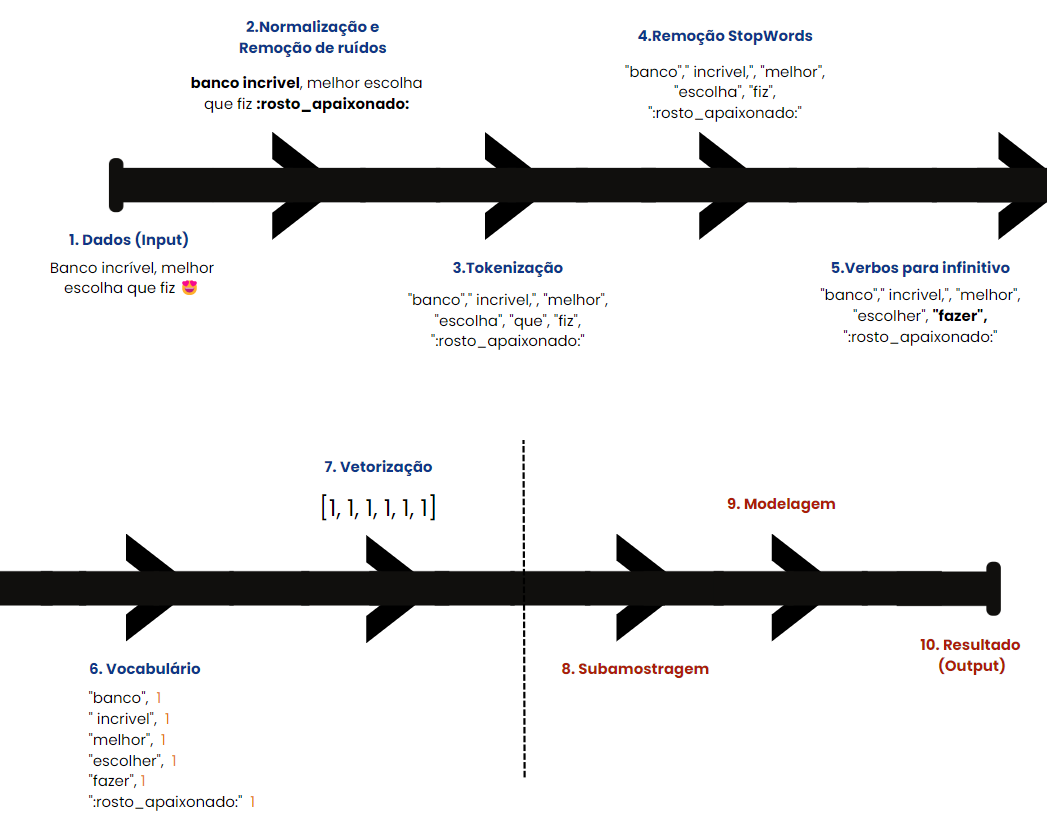

# Atividade 9 : Análise Descritiva

Apresenta-se a etapa inicial e fundamental na análise de dados, fornecendo códigos das características e padrões presentes nos dados coletados. Permitindo uma compreensão inicial dos dados e auxilio na tomada de decisões e na formulação de estratégias com base nas informações disponíveis. Por meio desta, apresenta-se as seguintes informações coletadas.

## 9.1 Quantidade de Linhas utilizadas da tabela

In [65]:
# Antes do tratamento 
quantidadeLinhas = base.shape[0]
print("A tabela possui", quantidadeLinhas, "linhas.")

A tabela possui 12355 linhas.


In [66]:
# Depois do tratamento
quantidadeLinhas = dados.shape[0]
print("A tabela possui", quantidadeLinhas, "linhas.")

A tabela possui 12355 linhas.


## 9.2 Quantidade de palavras na coluna texto

In [67]:
# Antes do tratamento 
totalPalavras = base['texto'].str.split().str.len().sum()

print("A coluna 'texto' possui", totalPalavras, "palavras no total.")

A coluna 'texto' possui 522820 palavras no total.


In [68]:
# Depois do tratamento
totalPalavras = dados['texto'].str.split().str.len().sum()

print("A coluna 'texto' possui", totalPalavras, "palavras no total.")

A coluna 'texto' possui 522820 palavras no total.


## 9.3 A distribuição de sentimentos positivos, negativos e neutros expressos pelos usuários;

In [69]:
# Antes do tratamento 
contagemSentimento = base['sentimento'].value_counts()

print("Contagem de sentimentos:")
print(contagemSentimento)

Contagem de sentimentos:
NEUTRAL     5344
POSITIVE    4487
NEGATIVE    2524
Name: sentimento, dtype: int64


In [70]:
# Depois do tratamento
contagemSentimento = dados['sentimento'].value_counts()

print("Contagem de sentimentos:")
print(contagemSentimento)

Contagem de sentimentos:
NEUTRAL     5344
POSITIVE    4487
NEGATIVE    2524
Name: sentimento, dtype: int64


### 9.3.1 gráfico - A distribuição de sentimentos positivos, negativos e neutros expressos pelos usuários;

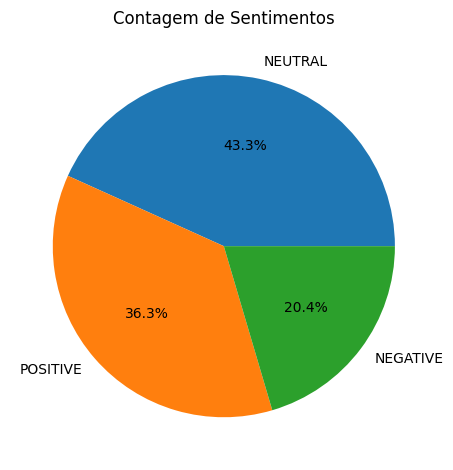

In [71]:
# Antes do tratamento 

contagemSentimento = base['sentimento'].value_counts()

plt.pie(contagemSentimento.values, labels=contagemSentimento.index, autopct='%1.1f%%')
plt.title('Contagem de Sentimentos')
plt.tight_layout()
plt.show()


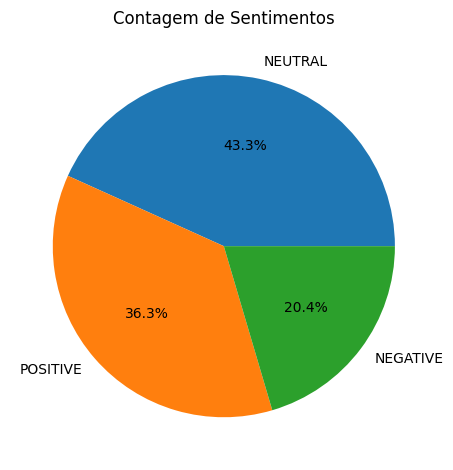

In [72]:
# depois do tratamento 

contagemSentimento = dados['sentimento'].value_counts()

plt.pie(contagemSentimento.values, labels=contagemSentimento.index, autopct='%1.1f%%')
plt.title('Contagem de Sentimentos')
plt.tight_layout()
plt.show()


## 9.4 Quantidade de autores na base de dados

In [73]:
# Antes do tratamento

quantidadeAutores = base['autor'].nunique()

print("A base de dados possui", quantidadeAutores, "autores únicos.")

A base de dados possui 5839 autores únicos.


In [74]:
# Depois do Tratamento

quantidadeAutores = dados['autor'].nunique()

print("A base de dados possui", quantidadeAutores, "autores únicos.")

A base de dados possui 5839 autores únicos.


## 9.5 Os usuários que mais realizaram comentários

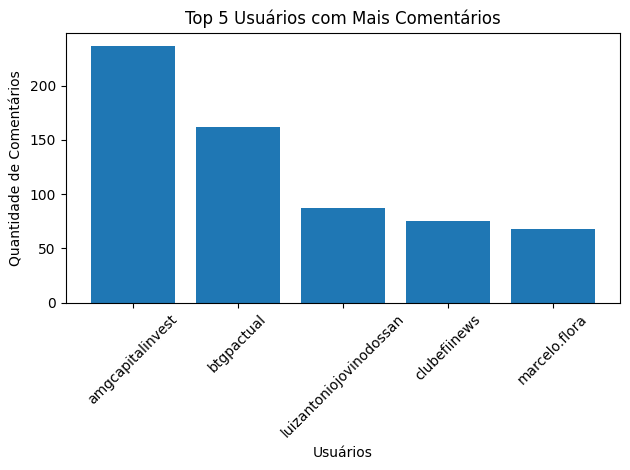

In [75]:
# Depois do tratamento

contagem_usuarios = dados['autor'].value_counts()
top_usuarios = contagem_usuarios.head(5)


plt.bar(top_usuarios.index, top_usuarios.values)
plt.xlabel('Usuários')
plt.ylabel('Quantidade de Comentários')
plt.title('Top 5 Usuários com Mais Comentários')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 9.6 Quantidade de comentários por Tipo de Interação;

In [76]:
# Antes do tratamento 

contagemSentimento = base['tipoInteracao'].value_counts()

print("A quantidade de comentários por Tipo de Interação: ")
print(contagemSentimento)

A quantidade de comentários por Tipo de Interação: 
marcação      5999
comentário    5389
resposta       967
Name: tipoInteracao, dtype: int64


In [77]:
# Depois do tratamento

contagemSentimento = dados['tipoInteracao'].value_counts()

print("A quantidade de comentários por Tipo de Interação: ")
print(contagemSentimento)

A quantidade de comentários por Tipo de Interação: 
marcação      5999
comentário    5389
resposta       967
Name: tipoInteracao, dtype: int64


### 9.6.1 Gráfico - Quantidade de comentários por Tipo de Interação;

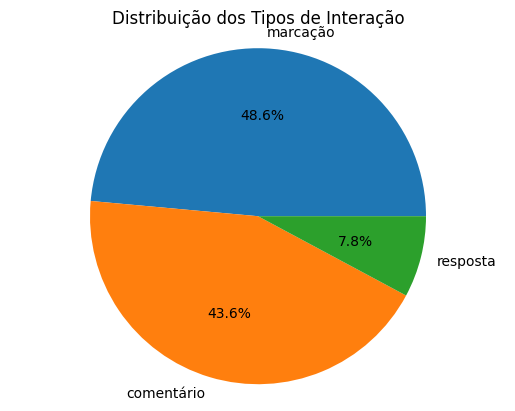

In [78]:
# Antes do tratamento 

contagem_interacao = base['tipoInteracao'].value_counts()

plt.pie(contagem_interacao.values, labels=contagem_interacao.index, autopct='%1.1f%%')
plt.title('Distribuição dos Tipos de Interação')
plt.axis('equal')
plt.show()

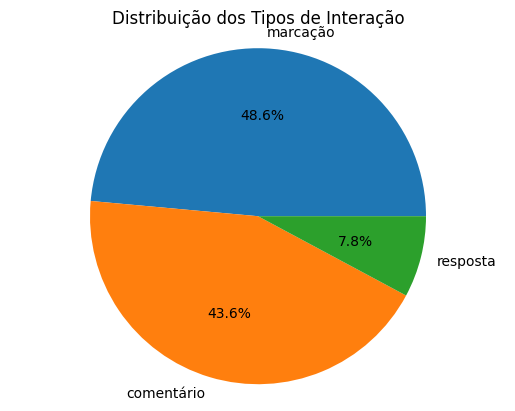

In [79]:
# Depois do tratamento 

contagem_interacao = dados['tipoInteracao'].value_counts()

plt.pie(contagem_interacao.values, labels=contagem_interacao.index, autopct='%1.1f%%')
plt.title('Distribuição dos Tipos de Interação')
plt.axis('equal')
plt.show()

Essas informações são cruciais para compreender melhor a percepção dos usuários em relação ao banco e para orientar futuras estratégias de comunicação e relacionamento com o público, garantindo uma maior assertividade em futuras publicações do banco BTG.

# Atividade 10: Análise de Dados

Apresentação dos dados combinatórios, ou seja, cruzamento de variáveis para obtenção de insights preliminares.

## 10.1 Gráfico Data X Sentimento

Esse gráfico auxilia a analisar a tendência temporal dos sentimentos nos comentários. O gráfico de linhas mostra como os sentimentos (positivo, negativo e neutro) variam ao longo do tempo. Essa análise permite identificar padrões e tendências nos sentimentos expressos nos comentários, fornecendo insights sobre a evolução das opiniões e emoções dos usuários ao longo do tempo.

In [80]:
# # Agrupar por data e sentimento e contar o número de ocorrências
# data_sentimento_counts = graf_dados.groupby(['dataPublicada', 'sentimento']).size().unstack()

# # Resample dos dados para uma frequência menor
# data_sentimento_resampled = data_sentimento_counts.resample('1D').sum()  # Resample por intervalos de 7 dias, ajuste conforme necessário

# # Criar uma figura com tamanho personalizado
# fig, ax = plt.subplots(figsize=(10, 6))

# # Plotar o gráfico de linhas na figura
# data_sentimento_resampled.plot(kind='line', marker='o', ax=ax)

# # Configurar os rótulos dos eixos
# ax.set_xlabel('Data de Publicação')
# ax.set_ylabel('Número de Comentários')
# ax.set_title('Tendência Temporal dos Sentimentos (Amostra Resample)')

# # Remover valores NaN e Inf
# data_sentimento_cleaned = data_sentimento_resampled.replace([np.inf, -np.inf], np.nan).dropna()
# y_max = data_sentimento_cleaned.values.max()

# # Traçar uma linha horizontal em cada marcação do eixo do número de comentários
# for tick in ax.get_yticks():
#     ax.axhline(tick, color='lightgray', linestyle='--')

# # Definir os limites do eixo y
# # ax.set_ylim(0, y_max + 2)

# # Exibir a legenda
# ax.legend()

# # Exibir o gráfico
# plt.show()


## 10.2 Gráfico Dispersão - Sentimento X Autor

Gráfico que visa mostrar o top 5 autores que tem mais comentários dentro da base de dados, correlacionado ao sentimento de seus comentários, em busca de insigths e padrões. 

In [81]:
# # Agrupar por autor e sentimento e contar o número de ocorrências
# autor_sentimento_counts = dados.groupby(['autor_anonimo', 'sentimento']).size().unstack()

# # Calcular o número total de ocorrências de sentimentos por autor
# autor_total_counts = autor_sentimento_counts.sum(axis=1)

# # Selecionar os top 5 autores mais relevantes
# top_autores = autor_total_counts.nlargest(5).index

# # Filtrar o DataFrame original apenas para os top 5 autores
# autor_sentimento_counts_top5 = autor_sentimento_counts.loc[top_autores]

# # Obter os valores dos sentimentos
# sentimentos = ['NEGATIVE', 'NEUTRAL', 'POSITIVE']

# # Definir as cores para cada sentimento
# cores = ['blue', 'orange', 'green']

# # Criar uma figura com tamanho personalizado
# fig, ax = plt.subplots(figsize=(10, 6))

# # Obter a quantidade de autores
# quantidade_autores = len(top_autores)

# # Definir a largura das barras
# largura_barra = 0.2

# # Definir a posição dos grupos de barras no eixo x
# posicao_barras = range(quantidade_autores)

# # Plotar as barras
# for i, sentimento in enumerate(sentimentos):
#     valores = autor_sentimento_counts_top5[sentimento]
#     ax.bar(posicao_barras, valores, width=largura_barra, label=sentimento, color=cores[i])

#     # Atualizar a posição das barras para o próximo grupo
#     posicao_barras = [pos + largura_barra for pos in posicao_barras]

# # Configurar os rótulos dos eixos
# ax.set_xlabel('Código do Autor')
# ax.set_ylabel('Número de Ocorrências')
# ax.set_title('Gráfico de Dispersão para Sentimento e Autor (Top 5)')

# # Definir os rótulos do eixo x
# ax.set_xticks(range(quantidade_autores))
# ax.set_xticklabels(top_autores)

# # Exibir a legenda
# ax.legend()

# # Exibir o gráfico de barras
# plt.show()

## 10.3 Gráfico Word Cloud geral sem seleção de data

O gráfico de Word Cloud serve para visualizar de forma intuitiva as palavras mais frequentes em um conjunto de dados textuais. Ele ajuda a identificar os termos que aparecem com maior frequência e fornece uma representação visual das palavras mais relevantes. Isso pode ser útil para compreensão geral dos principais temas ou tópicos abordados nos comentários. Neste caso, a nuvem foi baseada na base de dados completa.

In [82]:
# graf_dados

In [83]:
# # Mapear os sentimentos para as cores correspondentes
# sentimento_cores = {
#     'NEGATIVE': '#0000FF',  # Azul
#     'NEUTRAL': '#FFA500',   # Laranja
#     'POSITIVE': '#008000'   # Verde
# }

# # Definir cor padrão para palavras sem sentimento definido
# cor_padrao = 'black'

# # Definir cores personalizadas com base no sentimento
# def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
#     sentimento = graf_dados.loc[graf_dados['texto'].str.contains(word), 'sentimento'].values
#     if len(sentimento) > 0:
#         sentimento = sentimento[0]
#         return sentimento_cores.get(sentimento, cor_padrao)
#     else:
#         return cor_padrao

# # Concatenar todos os textos em uma única string
# textos_concatenados = ' '.join(graf_dados['texto'])

# # Processar o texto concatenado para gerar os tokens
# stop_words = set(stopwords.words('portuguese'))
# tokens_processados = [token for token in word_tokenize(textos_concatenados.lower()) if token not in stop_words]

# # Converter os tokens processados de volta para uma string
# textos_processados = ' '.join(tokens_processados)

# # Criar a Word Cloud com cores personalizadas
# wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=color_func).generate(textos_processados)

# # Plotar a Word Cloud
# plt.figure(figsize=(10, 6))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.title('Nuvem de Palavras (Geral)')
# plt.show()


## 10.4 Gráfico de Word Cloud: Análise de Palavras Mais Frequentes em Comentários durante Período de Picos

Gráfico de nuvem de palavras, visando mostrar as frequências das palavras utilizadas quanto aos picos encontrados no gráfico de Data X Sentimento.

In [84]:
# # Mapear os sentimentos para as cores correspondentes
# sentimento_cores = {
#     'NEGATIVE': '#0000FF',  # Azul
#     'NEUTRAL': '#FFA500',   # Laranja
#     'POSITIVE': '#008000'   # Verde
# }

# # Definir cor padrão para palavras sem sentimento definido
# cor_padrao = 'black'

# # Definir cores personalizadas com base no sentimento
# def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
#     sentimento = graf_dados.loc[graf_dados['texto'].str.contains(word), 'sentimento'].values
#     if len(sentimento) > 0:
#         sentimento = sentimento[0]
#         return sentimento_cores.get(sentimento, cor_padrao)
#     else:
#         return cor_padrao

# # Converter a coluna 'dataPublicada' para o tipo datetime
# graf_dados['dataPublicada'] = pd.to_datetime(graf_dados['dataPublicada'], format='%d-%m-%Y')

# # Filtrar o DataFrame com base nas datas
# data_inicio = pd.to_datetime('01-09-2022', format='%d-%m-%Y')
# data_fim = pd.to_datetime('01-12-2022', format='%d-%m-%Y')
# textos_filtrados = graf_dados[(graf_dados['dataPublicada'] >= data_inicio) & (graf_dados['dataPublicada'] <= data_fim)]['texto']

# # Concatenar os textos filtrados em uma única string
# textos_concatenados = ' '.join(textos_filtrados)

# # Processar o texto concatenado para gerar os tokens
# stop_words = set(stopwords.words('portuguese'))
# tokens_processados = [token for token in word_tokenize(textos_concatenados.lower()) if token not in stop_words]

# # Converter os tokens processados de volta para uma string
# textos_processados = ' '.join(tokens_processados)

# # Criar a Word Cloud com cores personalizadas
# wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=color_func).generate(textos_processados)

# # Plotar a Word Cloud
# plt.figure(figsize=(10, 6))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.title('Nuvem de Palavras (01-12-2022 a 15-12-2022)')
# plt.show()

# Atividade 11: Amostragem

## 11.1. Contabilizar os valores

Para contar o número de ocorrências de cada classificação, você pode usar o método value_counts() da coluna em questão. Isso retornará uma série com a contagem de cada valor único na coluna.

In [85]:
contagem = dados['sentimento'].value_counts()
print(contagem)

NEUTRAL     5344
POSITIVE    4487
NEGATIVE    2524
Name: sentimento, dtype: int64


## 11.2. Normalizar os valores

A normalização pode ser feita usando diferentes técnicas, dependendo do que você deseja alcançar com seus dados. Uma opção comum é usar a técnica de codificação one-hot (ou one-hot encoding) para transformar as classificações em variáveis binárias. O pandas fornece o método get_dummies() que pode ser usado para realizar a codificação one-hot.

### 11.2.1. Teste isolado da normalização

In [86]:
# Valores de teste
dadosNormalizacao = pd.DataFrame({'sentimento': ['positivo', 'negativo', 'neutro', 'positivo', 'neutro','positivo', 'negativo', 'neutro', 'positivo', 'negativo']})

# Definição da função
def codificar_coluna(coluna):
    coluna_codificada = pd.get_dummies(coluna)
    return coluna_codificada

# Aplica a função de teste
codificar_coluna(dadosNormalizacao['sentimento'])

,negativo,neutro,positivo
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


### 11.2.2. Definição da função de normalização

In [87]:
#Função de codificação one-hot da coluna
def codificar_coluna(coluna):
    coluna_codificada = pd.get_dummies(coluna)
    return coluna_codificada

### 11.2.3. Teste da função de normalização

In [88]:
# Aplica a função à coluna "sentimento" do DataFrame
codificar_coluna(dados['sentimento'])

,NEGATIVE,NEUTRAL,POSITIVE
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0
...,...,...,...
12350,0,1,0
12351,0,1,0
12352,0,0,1
12353,0,1,0


## 11.3. Amostragem ou Normalização

A normalização é um processo de transformação dos dados para que estejam em uma escala semelhante, enquanto a amostragem envolve a seleção de uma parte representativa dos dados.Para normalizar os dados, utilizamos o z-score e utilizamos o método sample() do DataFrame para obter uma amostra aleatória dos dados.


### 11.3.1. Teste isolado da amostragem

In [89]:
# Valores de teste
dadosAmostragem = pd.DataFrame({'sentimento': ['positivo', 'negativo', 'neutro', 'positivo', 'neutro','positivo', 'negativo', 'neutro', 'positivo', 'negativo']})

# Definição da função
def normalizar_coluna_teste(dados):
    coluna_codificada = codificar_coluna(dados)
    scaler = StandardScaler()
    coluna_normalizada = scaler.fit_transform(coluna_codificada)
    df_normalizado = pd.DataFrame(coluna_normalizada, columns=coluna_codificada.columns)
    return df_normalizado

# Aplica a função de teste
normalizar_coluna_teste(dados['sentimento'])

,NEGATIVE,NEUTRAL,POSITIVE
0,-0.506694,1.145399,-0.755172
1,-0.506694,1.145399,-0.755172
2,-0.506694,1.145399,-0.755172
3,-0.506694,-0.873058,1.324202
4,-0.506694,1.145399,-0.755172
...,...,...,...
12350,-0.506694,1.145399,-0.755172
12351,-0.506694,1.145399,-0.755172
12352,-0.506694,-0.873058,1.324202
12353,-0.506694,1.145399,-0.755172


### 11.3.2. Definição da função de amostragem

In [90]:
def normalizar_coluna(dados):
    # Criar codificação one-hot para a coluna
    coluna_codificada = codificar_coluna(dados)
    # Aplicar a normalização z-score na coluna codificada
    scaler = StandardScaler()
    coluna_normalizada = scaler.fit_transform(coluna_codificada)
    # Criar um novo DataFrame com as colunas normalizadas
    df_normalizado = pd.DataFrame(coluna_normalizada, columns=coluna_codificada.columns)
    return df_normalizado

### 11.2.3. Teste da função de normalização

In [91]:
# Aplica a função à coluna "sentimento" do DataFrame
df_normalizado = normalizar_coluna(dados['sentimento'])
df_normalizado

,NEGATIVE,NEUTRAL,POSITIVE
0,-0.506694,1.145399,-0.755172
1,-0.506694,1.145399,-0.755172
2,-0.506694,1.145399,-0.755172
3,-0.506694,-0.873058,1.324202
4,-0.506694,1.145399,-0.755172
...,...,...,...
12350,-0.506694,1.145399,-0.755172
12351,-0.506694,1.145399,-0.755172
12352,-0.506694,-0.873058,1.324202
12353,-0.506694,1.145399,-0.755172


In [92]:
# Obter uma amostra aleatória do DataFrame
amostra = df_normalizado.sample(n=100, random_state=42)  # Neste exemplo, estou selecionando 100 linhas aleatórias
amostra

,NEGATIVE,NEUTRAL,POSITIVE
7639,-0.506694,1.145399,-0.755172
4643,-0.506694,-0.873058,1.324202
7271,-0.506694,-0.873058,1.324202
10442,-0.506694,-0.873058,1.324202
8618,-0.506694,1.145399,-0.755172
...,...,...,...
5894,-0.506694,1.145399,-0.755172
10685,-0.506694,1.145399,-0.755172
3928,-0.506694,1.145399,-0.755172
5181,-0.506694,1.145399,-0.755172


In [93]:
# Calcular a frequência de valores
contagem1 = amostra.value_counts()
contagem1

NEGATIVE   NEUTRAL    POSITIVE 
-0.506694   1.145399  -0.755172    46
           -0.873058   1.324202    34
 1.973577  -0.873058  -0.755172    20
dtype: int64

# Atividade 12 - Criação do modelo Word2Vec

Word2Vec é um dos métodos estatísticos mais utilizados no pré-processamento de
dados de texto a fim de uso do PLN (processamento de linguagem natural), neste projeto sendo utilizado para análise de sentimento. Foi criado para facilitar o treinamento de embeddings baseados em redes neurais. O modelo pode ser comparado com a técnica de incorporação de palavras, que é uma técnica em que palavras individuais são transformadas em vetores. Cada vetor captura várias características das palavras como: relação semântica da palavra, definições, contexto, etc.

Neste caso o modelo é pré-treinado (construído em grandes conjuntos de dados de
texto, como a Wikipedia, usando algoritmos como Skip-gram ou Continuous Bag of
Words). O modelo pré-treinado captura informações linguísticas gerais e contextuais (com base no banco de texto que foi utilizado) sem a necessidade de treinamento adicional. Esses modelos pré-treinados são frequentemente disponibilizados publicamente e podem ser usados diretamente para tarefas de NLP, como classificação de texto ou análise de sentimentos.


Referências : "O que é Word2Vec?" - edrone. Disponível em: https://edrone.me/pt/blog/o-que-e-word2vec. Acesso em 22 maio 2023.

In [94]:
texto_normalizado__ = texto_normalizado__.str.lower()

## 12.1 - Implementação

In [95]:
def preprocess_sentence(sentence):
    # Tokenização da frase em palavras
    tokens = word_tokenize(sentence)

    # Remoção de stopwords
    stop_words = set(stopwords.words('portuguese'))  # Defina o idioma desejado
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

    return filtered_tokens

def process_objects(objects):
    result = []
    for obj in objects:
        tokens = preprocess_sentence(obj)
        result.append(tokens)
    return result

processed_objects = process_objects(texto_normalizado__)
array_of_arrays = processed_objects  # Engloba todas as frases em um array externo

print(array_of_arrays)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [96]:
# Treinamento do modelo Word2Vec
model = Word2Vec(array_of_arrays, min_count=1)

# Tabela de palavras e seus vetores correspondentes
word_table = []
for word, idx in model.wv.key_to_index.items():
    word_vector = model.wv.get_vector(word)
    word_table.append((word, word_vector))

# Criando o dataframe
dfW2V = pd.DataFrame(word_table, columns=['Palavra', 'Vetor'])

# Exibindo o dataframe
print(dfW2V)

             Palavra                                              Vetor
0         btgpactual  [-0.22650874, 1.3972241, -0.15151945, -0.55709...
1                nao  [0.19765267, 1.1266776, 0.65835875, 1.2706388,...
2                btg  [0.08451913, 1.7280401, -1.0234624, -0.5512388...
3               voce  [0.41568506, 1.676042, 0.48208427, 1.0271419, ...
4      investimentos  [-0.33887008, 0.8614268, 0.11220699, -1.198184...
...              ...                                                ...
33431       formatos  [0.011951338, 0.010977228, 0.012574807, 0.0120...
33432     abalizadas  [0.006272655, 0.022432957, 0.0030194954, -0.00...
33433       bartunrk  [-0.0062308987, 0.016374297, 0.0067783217, 0.0...
33434  constelattion  [0.0100431545, 0.011305719, 0.0103046615, -0.0...
33435       sebraems  [-0.0022725996, 0.020702006, -0.0048458586, 0....

[33436 rows x 2 columns]


In [97]:
# Treinamento do modelo Word2Vec
model = Word2Vec(array_of_arrays, min_count=1)

# Tabela de palavras e seus vetores correspondentes
word_table = []
for word, idx in model.wv.key_to_index.items():
    word_vector = model.wv.get_vector(word)
    word_table.append((word, word_vector))

# Imprimindo a tabela de palavras e vetores
for word, vector in word_table:
    print("Palavra:", word)
    print("Vetor:", vector)
    print("---")


A saída de streaming foi truncada nas últimas 5000 linhas.
Palavra: emitiu
Vetor: [-4.01078374e-04  1.10039879e-02  5.88815520e-03  1.17068775e-02
  3.16578802e-03  4.17758524e-03 -2.31331098e-03  2.75896825e-02
 -6.63236668e-03  4.33952111e-04  7.09628779e-03 -3.95733805e-04
  1.33020780e-03 -7.23556150e-03 -6.23840233e-03  4.80119558e-03
  1.27222324e-02 -1.49630615e-02 -1.07138064e-02 -1.87104661e-02
 -7.36127375e-03  5.81540982e-04  5.97302290e-03 -1.22451838e-02
  3.42503539e-03  2.41514063e-03 -1.67404115e-02 -9.49354097e-03
 -1.55220728e-03  8.36149137e-03  1.81063898e-02 -6.88629597e-03
  3.48866452e-05 -1.00368978e-02 -5.75685222e-03 -3.46518517e-03
  3.64672020e-03 -4.91223764e-03  1.15434257e-02 -5.50652249e-03
 -2.43308349e-03 -9.90457647e-03 -2.05540704e-03  1.85289010e-02
  4.89980588e-03 -1.97393242e-02 -3.13040311e-03  8.90642963e-03
  3.70797887e-03  2.84200311e-02  5.39942086e-03 -6.31041033e-03
 -4.18696413e-03  9.25986189e-03  4.77422349e-04  1.37926254e-03
  1.8026

In [98]:
dados["sentimento2"] = dados["sentimento"].replace({'NEGATIVE': 0, 'POSITIVE': 1, 'NEUTRAL': 2})
dados["sentimento2"]

0        2
1        2
2        2
3        1
4        2
        ..
12350    2
12351    2
12352    1
12353    2
12354    0
Name: sentimento2, Length: 12355, dtype: int64

In [99]:
#dados["sentimento"] = dados["sentimento"].replace({'NEGATIVE': 1, 'POSITIVE': 0, 'NEUTRAL': 0})
#dados["sentimento"]

### 12.1.1 - Definição da Função

In [100]:
"""
def vetorizar_word2vec(array_of_arrays, dados): 
  # Treinamento do modelo Word2Vec
  model = Word2Vec(array_of_arrays, min_count=1)

  # Tabela de frases e seus vetores correspondentes
  sentence_table = []
  for sentence in array_of_arrays:
      word_vectors = [model.wv[word] for word in sentence if word in model.wv]
      if len(word_vectors) > 0:
          sentence_vector = sum(word_vectors) / len(word_vectors)
      else:
          sentence_vector = [None] * 100  # Cria uma lista de 100 elementos None
      sentence_table.append((sentence, *sentence_vector[:50]))  # Adiciona apenas os primeiros 50 elementos do vetor

  # Obter os rótulos das colunas
  column_labels = ['Frase']
  for i in range(50):
      column_labels.append(f'Vetor{i+1}')

  # Criando o dataframe
  dfW2V = pd.DataFrame(sentence_table, columns=column_labels)

  dados["sentimentoNumerico"] = dados["sentimento"].replace({'NEGATIVE': 1, 'POSITIVE': 0, 'NEUTRAL': 0})

  # Definir o índice do DataFrame dfW2V como o mesmo índice de dados['sentimentoNumerico']
  dfW2V.set_index(dados['sentimentoNumerico'].index, inplace=True)

  dfW2V['sentimento'] = dados['sentimentoNumerico']

  # Remover linhas em que a coluna 'Frase' contém apenas []
  dfW2V = dfW2V[dfW2V['Frase'].apply(lambda x: len(x) > 0)]

  return dfW2V
"""

'\ndef vetorizar_word2vec(array_of_arrays, dados): \n  # Treinamento do modelo Word2Vec\n  model = Word2Vec(array_of_arrays, min_count=1)\n\n  # Tabela de frases e seus vetores correspondentes\n  sentence_table = []\n  for sentence in array_of_arrays:\n      word_vectors = [model.wv[word] for word in sentence if word in model.wv]\n      if len(word_vectors) > 0:\n          sentence_vector = sum(word_vectors) / len(word_vectors)\n      else:\n          sentence_vector = [None] * 100  # Cria uma lista de 100 elementos None\n      sentence_table.append((sentence, *sentence_vector[:50]))  # Adiciona apenas os primeiros 50 elementos do vetor\n\n  # Obter os rótulos das colunas\n  column_labels = [\'Frase\']\n  for i in range(50):\n      column_labels.append(f\'Vetor{i+1}\')\n\n  # Criando o dataframe\n  dfW2V = pd.DataFrame(sentence_table, columns=column_labels)\n\n  dados["sentimentoNumerico"] = dados["sentimento"].replace({\'NEGATIVE\': 1, \'POSITIVE\': 0, \'NEUTRAL\': 0})\n\n  # Definir 

In [101]:
def vetorizar_word2vec(array_of_arrays, dados): 
  # Treinamento do modelo Word2Vec
  model = Word2Vec(array_of_arrays, min_count=1)

  # Tabela de frases e seus vetores correspondentes
  sentence_table = []
  for sentence in array_of_arrays:
      word_vectors = [model.wv[word] for word in sentence if word in model.wv]
      if len(word_vectors) > 0:
          sentence_vector = sum(word_vectors) / len(word_vectors)
      else:
          sentence_vector = [None] * 100  # Cria uma lista de 100 elementos None
      sentence_table.append((sentence, *sentence_vector[:50]))  # Adiciona apenas os primeiros 50 elementos do vetor

  # Obter os rótulos das colunas
  column_labels = ['Frase']
  for i in range(50):
      column_labels.append(f'Vetor{i+1}')

  # Criando o dataframe
  dfW2V2 = pd.DataFrame(sentence_table, columns=column_labels)

  dados["sentimentoNumerico"] = dados["sentimento2"].replace({'NEGATIVE': 0, 'POSITIVE': 1, 'NEUTRAL': -1})

  # Definir o índice do DataFrame dfW2V2 como o mesmo índice de dados['sentimentoNumerico']
  dfW2V2.set_index(dados['sentimentoNumerico'].index, inplace=True)

  dfW2V2['sentimento2'] = dados['sentimentoNumerico']

  # Remover linhas em que a coluna 'Frase' contém apenas []
  dfW2V2 = dfW2V2[dfW2V2['Frase'].apply(lambda x: len(x) > 0)]

  return dfW2V2

### 12.1.2 - Teste da Função

In [102]:
"""
dfW2V = vetorizar_word2vec(array_of_arrays, dados)

# Especificando o diretório de destino para salvar o arquivo CSV
diretorio_destino = '/content/drive/MyDrive/PROJETO BTG/'

# Salvando o dataframe em um arquivo CSV no diretório especificado
caminho_arquivo_csv = diretorio_destino + 'sentence_vectors.csv'
dfW2V.to_csv(caminho_arquivo_csv, index=False)

print("Arquivo 'sentence_vectors.csv' salvo com sucesso em:", caminho_arquivo_csv)
"""

'\ndfW2V = vetorizar_word2vec(array_of_arrays, dados)\n\n# Especificando o diretório de destino para salvar o arquivo CSV\ndiretorio_destino = \'/content/drive/MyDrive/PROJETO BTG/\'\n\n# Salvando o dataframe em um arquivo CSV no diretório especificado\ncaminho_arquivo_csv = diretorio_destino + \'sentence_vectors.csv\'\ndfW2V.to_csv(caminho_arquivo_csv, index=False)\n\nprint("Arquivo \'sentence_vectors.csv\' salvo com sucesso em:", caminho_arquivo_csv)\n'

In [103]:
dfW2V2 = vetorizar_word2vec(array_of_arrays, dados)

# Especificando o diretório de destino para salvar o arquivo CSV
diretorio_destino = '/content/drive/MyDrive/PROJETO BTG/'

# Salvando o dataframe em um arquivo CSV no diretório especificado
caminho_arquivo_csv = diretorio_destino + 'sentence_vectors2.csv'
dfW2V2.to_csv(caminho_arquivo_csv, index=False)

print("Arquivo 'sentence_vectors.csv' salvo com sucesso em:", caminho_arquivo_csv)

Arquivo 'sentence_vectors.csv' salvo com sucesso em: /content/drive/MyDrive/PROJETO BTG/sentence_vectors2.csv


## 12.2 - Avaliação da vetorização Word2Vec

In [104]:
from gensim.models import KeyedVectors
import numpy as np

# Carregar os vetores do arquivo CSV
vetores = {}
with open('/content/drive/MyDrive/PROJETO BTG/sentence_vectors2.csv', 'r') as file:
    next(file)  # Ignorar a primeira linha (cabeçalho)
    for line in file:
        line = line.strip().split(',')
        palavra = line[0]
        try:
            vetor = np.array([float(value) for value in line[1:]])
            vetores[palavra] = vetor
        except ValueError:
            continue

# Escolher uma palavra do vocabulário
palavra_exemplo = "['btgpactual']"

# Criar um modelo KeyedVectors
modelo = KeyedVectors(vector_size=len(vetores[palavra_exemplo]))
modelo.add_vectors(keys=list(vetores.keys()), weights=list(vetores.values()))

# Verificar o vocabulário
vocabulario = modelo.index_to_key
print("Tamanho do vocabulário:", len(vocabulario))


Tamanho do vocabulário: 363


In [105]:
# Verificar o vetor de uma palavra específica
palavra = "['btgpactual']"
vetor = modelo.get_vector(palavra)
print("Vetor de '['btgpactual']':", vetor)

Vetor de '['btgpactual']': [-0.6119534   1.2341471  -0.2560401  -0.50503993  0.2071971  -0.34940264
  0.05467172  2.8987038  -0.5422462  -1.162648    0.84465307 -0.95818704
 -1.1624678   0.5405383  -0.16789222 -1.4483069   0.5931415  -1.4266428
 -1.7121994  -2.201548    0.8038583  -0.81410486  0.5889786  -0.13695934
  0.176302   -0.14627762  0.484778   -0.8223695  -1.8619193   1.1459049
  0.97611934 -0.49038196  0.3199918  -1.6502742  -0.23752183 -0.6944407
 -0.11086041 -1.0027475   1.3471806  -1.7170047  -0.31039482 -1.4701056
  0.48509032  0.9377155  -0.7911249  -1.2972009  -0.45589244  0.9777026
  0.55347     1.1518424   2.        ]


In [106]:
# Verificar palavras similares
palavras_similares = modelo.most_similar("['otimo']", topn=5)
print("Palavras similares a '['otimo']':")
for palavra, similaridade in palavras_similares:
    print(palavra, similaridade)

Palavras similares a '['otimo']':
['nunca'] 0.992400050163269
['queria'] 0.9863433837890625
['assim'] 0.982807993888855
['faco'] 0.9757023453712463
['realmente'] 0.9722517728805542


In [107]:
# Calcular similaridade entre duas palavras
similaridade = modelo.similarity("['btgpactual']", "['otimo']")
print("Similaridade entre '['btgpactual']' e '['otimo']':", similaridade)

Similaridade entre '['btgpactual']' e '['otimo']': 0.5684561


In [108]:
#dfW2Vmodelo = pd.read_csv('/content/drive/MyDrive/PROJETO BTG/sentence_vectors.csv')

In [109]:
dfW2Vmodelo2 = pd.read_csv('/content/drive/MyDrive/PROJETO BTG/sentence_vectors2.csv')

In [110]:
len(dfW2Vmodelo2)

12343

#Atividade 13 - Modelagem de Redes Neurais Recorrentes (RNN)

   O método de “rede neural” é um tipo de processamento, chamado aprendizado profundo, que a partir de nós (neurônios) interconectados em uma estrutura em camadas, como um cérebro humano, cria um sistema adaptativo que os computadores usam para aprender com os erros e se aprimorar.
   Uma rede neural recorrente (RNN) é uma classe de redes neurais que inclui conexões ponderadas dentro de uma camada. Como as RNNs incluem loops, elas podem armazenar informações ao processar novas entradas. Essa memória os torna ideais para tarefas de processamento onde as entradas anteriores devem ser consideradas 

##13.1 - Definição da Função

In [111]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

In [112]:
def classification_rnn(X_test, y_test):
  # Divisão em conjunto de treinamento e teste
  X_train, X_test, y_train, y_test = train_test_split(X_test, y_test, test_size=0.3, random_state=42)

  # Remodelar os dados de entrada
  X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

  # Definindo o modelo
  model = Sequential()
  model.add(LSTM(units=128, input_shape=(1, X_test.shape[2])))
  model.add(Dense(units=3, activation='softmax'))

  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  # Treinar o modelo
  model.fit(X_test, y_test, epochs=10, batch_size=32)

  # Avaliar a precisão do modelo
  _, accuracy = model.evaluate(X_test, y_test)
  print('Acurácia: %.2f%%' % (accuracy * 100))

  # Fazer previsões no conjunto de teste
  y_pred_prob = model.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)

  # Calcular o recall
  recall = recall_score(y_test, y_pred, average='macro')
  print('Recall: %.2f%%' % (recall* 100))

  return model, y_test, y_pred

## RNN - Duas categorias e com balanceamento

### 13.2 - Teste da Função

**USANDO DUAS CATEGORIAS E OS DADOS BALANCEADOS**

In [113]:
"""
# Balanceamento dos dados
df_positive = dfW2Vmodelo[dfW2Vmodelo['sentimento'] == 0]
df_negative = dfW2Vmodelo[dfW2Vmodelo['sentimento'] == 1]

df_positive_resampled = resample(df_positive, replace=True, n_samples=len(df_negative), random_state=42)

dfrnn_balanced = pd.concat([df_positive_resampled, df_negative])

# Inverter a codificação das classes
dfrnn_balanced['sentimento'] = dfrnn_balanced['sentimento'].map({1: 0, 0: 1})

# Separando os dados em X e y (balanceados)
X = np.array(dfrnn_balanced.drop(['Frase', 'sentimento'], axis=1))
Y = np.array(dfrnn_balanced['sentimento'])

# Chamada da função com os dados balanceados
model, X_test, y_test = classification_rnn(X, Y, num_epochs=20, batch_size=64, learning_rate=0.001, num_hidden_units=128)
"""

"\n# Balanceamento dos dados\ndf_positive = dfW2Vmodelo[dfW2Vmodelo['sentimento'] == 0]\ndf_negative = dfW2Vmodelo[dfW2Vmodelo['sentimento'] == 1]\n\ndf_positive_resampled = resample(df_positive, replace=True, n_samples=len(df_negative), random_state=42)\n\ndfrnn_balanced = pd.concat([df_positive_resampled, df_negative])\n\n# Inverter a codificação das classes\ndfrnn_balanced['sentimento'] = dfrnn_balanced['sentimento'].map({1: 0, 0: 1})\n\n# Separando os dados em X e y (balanceados)\nX = np.array(dfrnn_balanced.drop(['Frase', 'sentimento'], axis=1))\nY = np.array(dfrnn_balanced['sentimento'])\n\n# Chamada da função com os dados balanceados\nmodel, X_test, y_test = classification_rnn(X, Y, num_epochs=20, batch_size=64, learning_rate=0.001, num_hidden_units=128)\n"

### 13.3 - Visualização da Matriz de Confusão de Redes Neurais Recorrentes (RNN)

**MATRIZ DE CONFUSÃO - USANDO DUAS CATEGORIAS E OS DADOS BALANCEADOS**

In [114]:
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Previsões no conjunto de teste
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Definição dos rótulos das classes
class_labels = ['POSITIVO', 'NEGATIVO']

# Plot da matriz de confusão
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão da Modelagem de Redes Neurais Recorrentes (RNN)')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# Adição dos valores numéricos na matriz
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'), ha='center', va='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()
"""

"\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom sklearn.metrics import confusion_matrix\n\n# Previsões no conjunto de teste\ny_pred_probs = model.predict(X_test)\ny_pred = (y_pred_probs > 0.5).astype(int)\n\n# Cálculo da matriz de confusão\ncm = confusion_matrix(y_test, y_pred)\n\n# Definição dos rótulos das classes\nclass_labels = ['POSITIVO', 'NEGATIVO']\n\n# Plot da matriz de confusão\nplt.figure(figsize=(8, 6))\nplt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)\nplt.title('Matriz de Confusão da Modelagem de Redes Neurais Recorrentes (RNN)')\nplt.colorbar()\ntick_marks = np.arange(len(class_labels))\nplt.xticks(tick_marks, class_labels)\nplt.yticks(tick_marks, class_labels)\n\n# Adição dos valores numéricos na matriz\nthresh = cm.max() / 2.0\nfor i, j in np.ndindex(cm.shape):\n    plt.text(j, i, format(cm[i, j], 'd'), ha='center', va='center',\n             color='white' if cm[i, j] > thresh else 'black')\n\nplt.xlabel('Previsão')\nplt.ylabel('Valor Real')\nplt

### 13.4 - Salvando CSV do resultado da Modelagem de Redes Neurais Recorrentes (RNN)

**USANDO DUAS CATEGORIAS E OS DADOS BALANCEADOS - GERANDO CSV**

In [115]:
"""
# Gerar as previsões do modelo
y_pred = model.predict(X_test)

# Arredondar as previsões para obter classes binárias (0 ou 1)
y_pred = y_pred.round().astype(int)

# Crie um DataFrame com as previsões
df_resultRNN = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred.flatten()})

# Salve o DataFrame em um arquivo CSV
df_resultRNN.to_csv('/content/drive/MyDrive/PROJETO BTG/resultadoRNN.csv', index=False)
print("Salvo com sucesso")
"""

'\n# Gerar as previsões do modelo\ny_pred = model.predict(X_test)\n\n# Arredondar as previsões para obter classes binárias (0 ou 1)\ny_pred = y_pred.round().astype(int)\n\n# Crie um DataFrame com as previsões\ndf_resultRNN = pd.DataFrame({\'y_test\': y_test, \'y_pred\': y_pred.flatten()})\n\n# Salve o DataFrame em um arquivo CSV\ndf_resultRNN.to_csv(\'/content/drive/MyDrive/PROJETO BTG/resultadoRNN.csv\', index=False)\nprint("Salvo com sucesso")\n'

## RNN - Três categorias e sem balanceamento

### 13.2 - Teste da Função

**USANDO TRÊS CATEGORIAS SEM BALANCEAMENTO DE DADOS**

In [116]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from sklearn.metrics import recall_score

In [117]:
# Balanceamento dos dados
df_negative = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 0]
df_positive = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 1]
df_neutral = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 2]

dfrnn_balanced = pd.concat([df_positive, df_negative, df_neutral])

# Separando os dados de teste em X_test e y_test (balanceados)
X_test = np.array(dfrnn_balanced.drop(['Frase', 'sentimento2'], axis=1))
y_test = np.array(dfrnn_balanced['sentimento2'])

model, y_test, y_pred = classification_rnn(X_test, y_test)

Epoch 1/10
116/116 [==============================] - 3s 4ms/step - loss: 0.9680 - accuracy: 0.5784
Epoch 2/10
116/116 [==============================] - 1s 4ms/step - loss: 0.8735 - accuracy: 0.6298
Epoch 3/10
116/116 [==============================] - 0s 4ms/step - loss: 0.8326 - accuracy: 0.6435
Epoch 4/10
116/116 [==============================] - 1s 6ms/step - loss: 0.8096 - accuracy: 0.6484
Epoch 5/10
116/116 [==============================] - 1s 6ms/step - loss: 0.7931 - accuracy: 0.6462
Epoch 6/10
116/116 [==============================] - 1s 7ms/step - loss: 0.7792 - accuracy: 0.6581
Epoch 7/10
116/116 [==============================] - 1s 7ms/step - loss: 0.7751 - accuracy: 0.6562
Epoch 8/10
116/116 [==============================] - 1s 7ms/step - loss: 0.7695 - accuracy: 0.6619
Epoch 9/10
116/116 [==============================] - 1s 7ms/step - loss: 0.7654 - accuracy: 0.6641
Epoch 10/10
116/116 [==============================] - 1s 2ms/step - loss: 0.7530 - accuracy: 0.6673

### 13.3 - Visualização da Matriz de Confusão de Redes Neurais Recorrentes (RNN)

**USANDO TRÊS CATEGORIAS SEM BALANCEAMENTO DE DADOS - MATRIZ DE CONFUSÃO**

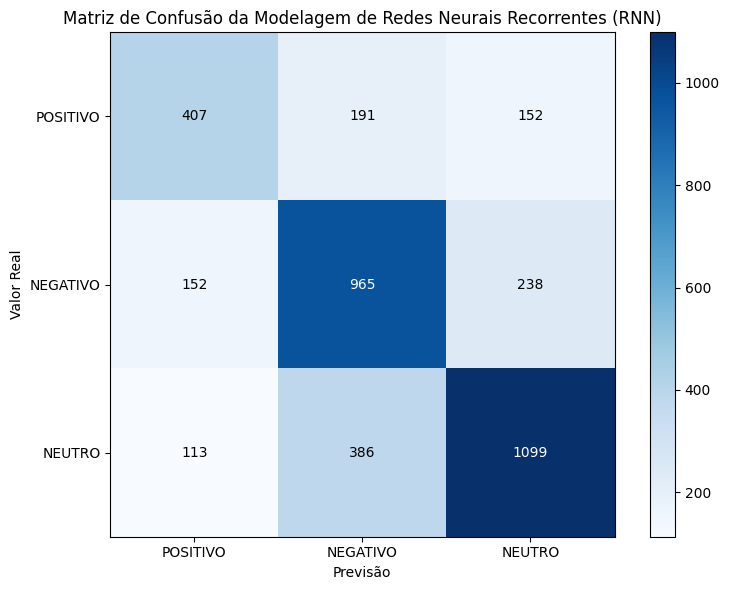

In [118]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Previsões no conjunto de teste
y_test = y_test.astype(int)
y_pred = y_pred.astype(int)

# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Definição dos rótulos das classes
class_labels = ['POSITIVO', 'NEGATIVO', 'NEUTRO']

# Plot da matriz de confusão
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão da Modelagem de Redes Neurais Recorrentes (RNN)')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# Adição dos valores numéricos na matriz
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'), ha='center', va='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()

### 13.4 - Hiperparâmetros com Random Search do RNN

In [119]:
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scipy.stats import randint as sp_randint
from sklearn.metrics import recall_score
import tensorflow as tf

# Dados de entrada e rótulos
X_data = np.array(dfrnn_balanced.drop(['Frase', 'sentimento2'], axis=1))
Y_labels = np.array(dfrnn_balanced['sentimento2'])

# Divisão em conjunto de treinamento e teste
X_train, X_val, y_train, y_val = train_test_split(X_data, Y_labels, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Normalização dos dados
X_train_mean = X_train.mean(axis=0)
X_train_std = X_train.std(axis=0)
X_train = (X_train - X_train_mean) / X_train_std
X_val = (X_val - X_train_mean) / X_train_std
X_data = (X_data - X_train_mean) / X_train_std

# Função para criar o modelo RNN
def create_model(num_epochs, batch_size, learning_rate, num_hidden_units):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(units=num_hidden_units, activation='relu'),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])

    model.compile(optimizer=tf.optimizers.Adam(learning_rate=learning_rate),
                  loss=tf.losses.BinaryCrossentropy(),
                  metrics=[tf.metrics.BinaryAccuracy()])

    model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size,
              validation_data=(X_val, y_val))

    y_pred = model.predict(X_data)
    y_pred = np.round(y_pred).flatten()

    recall = recall_score(Y_labels, y_pred, average='macro')
    print('Recall:', recall)

    return model

# Definir a distribuição de valores para cada hiperparâmetro
param_dist = {
    'num_epochs': sp_randint(10, 31),  # Intervalo entre 10 e 30
    'batch_size': sp_randint(32, 129),  # Intervalo entre 32 e 128
    'learning_rate': [0.001, 0.01, 0.1],  # Valores fixos
    'num_hidden_units': sp_randint(64, 257)  # Intervalo entre 64 e 256
}

# Criação do KerasClassifier com a função create_model
keras_classifier = KerasClassifier(build_fn=create_model)

# Realizar a busca aleatória
random_search = RandomizedSearchCV(estimator=keras_classifier, param_distributions=param_dist,
                                   n_iter=10, cv=3, scoring='recall_macro', refit=False, error_score='raise')

random_result = random_search.fit(X_data, Y_labels)

# Obter os resultados da busca aleatória
results = random_result.cv_results_
best_params_idx = results['rank_test_score'].argmin()
best_params = results['params'][best_params_idx]
best_recall = results['mean_test_score'][best_params_idx]

print('Melhores hiperparâmetros:', best_params)
print('Melhor Recall:', best_recall)


Epoch 1/27


<ipython-input-119-3a65faf2cc9d>:55: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_classifier = KerasClassifier(build_fn=create_model)


54/54 [==============================] - 1s 7ms/step - loss: -84.2260 - binary_accuracy: 0.3792 - val_loss: -276.4494 - val_binary_accuracy: 0.3762
Epoch 2/27
54/54 [==============================] - 0s 3ms/step - loss: -786.4551 - binary_accuracy: 0.3885 - val_loss: -1496.2064 - val_binary_accuracy: 0.3953
Epoch 3/27
54/54 [==============================] - 0s 3ms/step - loss: -2657.3433 - binary_accuracy: 0.3867 - val_loss: -3967.5391 - val_binary_accuracy: 0.3848
Epoch 4/27
54/54 [==============================] - 0s 3ms/step - loss: -5861.3154 - binary_accuracy: 0.3843 - val_loss: -7737.0381 - val_binary_accuracy: 0.3785
Epoch 5/27
54/54 [==============================] - 0s 3ms/step - loss: -10380.7178 - binary_accuracy: 0.3828 - val_loss: -12787.5381 - val_binary_accuracy: 0.3935
Epoch 6/27
54/54 [==============================] - 0s 3ms/step - loss: -16205.1885 - binary_accuracy: 0.3804 - val_loss: -19001.6055 - val_binary_accuracy: 0.3900
Epoch 7/27
54/54 [=====================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


54/54 [==============================] - 1s 9ms/step - loss: -87.7711 - binary_accuracy: 0.3795 - val_loss: -287.4435 - val_binary_accuracy: 0.3866
Epoch 2/27
54/54 [==============================] - 0s 5ms/step - loss: -801.7886 - binary_accuracy: 0.3841 - val_loss: -1517.0256 - val_binary_accuracy: 0.3860
Epoch 3/27
54/54 [==============================] - 0s 4ms/step - loss: -2706.4175 - binary_accuracy: 0.3848 - val_loss: -4023.6328 - val_binary_accuracy: 0.3802
Epoch 4/27
54/54 [==============================] - 0s 4ms/step - loss: -5977.9741 - binary_accuracy: 0.3802 - val_loss: -7908.2910 - val_binary_accuracy: 0.3935
Epoch 5/27
54/54 [==============================] - 0s 5ms/step - loss: -10716.2539 - binary_accuracy: 0.3763 - val_loss: -13205.8740 - val_binary_accuracy: 0.3773
Epoch 6/27
54/54 [==============================] - 0s 5ms/step - loss: -16839.1504 - binary_accuracy: 0.3756 - val_loss: -19861.4023 - val_binary_accuracy: 0.4010
Epoch 7/27
54/54 [=====================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


75/75 [==============================] - 1s 7ms/step - loss: -2.9319 - binary_accuracy: 0.3560 - val_loss: -7.9463 - val_binary_accuracy: 0.3866
Epoch 2/27
75/75 [==============================] - 0s 4ms/step - loss: -17.5732 - binary_accuracy: 0.3869 - val_loss: -31.3758 - val_binary_accuracy: 0.3981
Epoch 3/27
75/75 [==============================] - 0s 5ms/step - loss: -51.8531 - binary_accuracy: 0.3934 - val_loss: -76.4463 - val_binary_accuracy: 0.3981
Epoch 4/27
75/75 [==============================] - 0s 4ms/step - loss: -108.7121 - binary_accuracy: 0.3831 - val_loss: -144.4260 - val_binary_accuracy: 0.3837
Epoch 5/27
75/75 [==============================] - 0s 4ms/step - loss: -188.7090 - binary_accuracy: 0.3817 - val_loss: -234.3246 - val_binary_accuracy: 0.3958
Epoch 6/27
75/75 [==============================] - 0s 4ms/step - loss: -291.5772 - binary_accuracy: 0.3918 - val_loss: -346.8538 - val_binary_accuracy: 0.3958
Epoch 7/27
75/75 [==============================] - 0s 4ms/

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


75/75 [==============================] - 1s 5ms/step - loss: -3.1571 - binary_accuracy: 0.3788 - val_loss: -8.1194 - val_binary_accuracy: 0.3854
Epoch 2/27
75/75 [==============================] - 0s 2ms/step - loss: -18.1617 - binary_accuracy: 0.3860 - val_loss: -31.1911 - val_binary_accuracy: 0.3953
Epoch 3/27
75/75 [==============================] - 0s 3ms/step - loss: -51.7614 - binary_accuracy: 0.3934 - val_loss: -75.2970 - val_binary_accuracy: 0.4022
Epoch 4/27
75/75 [==============================] - 0s 3ms/step - loss: -107.9238 - binary_accuracy: 0.3938 - val_loss: -141.2291 - val_binary_accuracy: 0.3987
Epoch 5/27
75/75 [==============================] - 0s 3ms/step - loss: -186.5863 - binary_accuracy: 0.3903 - val_loss: -230.4808 - val_binary_accuracy: 0.3935
Epoch 6/27
75/75 [==============================] - 0s 3ms/step - loss: -289.0185 - binary_accuracy: 0.3918 - val_loss: -341.8674 - val_binary_accuracy: 0.3924
Epoch 7/27
75/75 [==============================] - 0s 2ms/

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


142/142 [==============================] - 1s 4ms/step - loss: -68776.2188 - binary_accuracy: 0.3743 - val_loss: -234327.7031 - val_binary_accuracy: 0.3848
Epoch 2/29
142/142 [==============================] - 0s 3ms/step - loss: -590356.2500 - binary_accuracy: 0.3730 - val_loss: -1061065.1250 - val_binary_accuracy: 0.3704
Epoch 3/29
142/142 [==============================] - 0s 2ms/step - loss: -1715117.6250 - binary_accuracy: 0.3753 - val_loss: -2480217.5000 - val_binary_accuracy: 0.3756
Epoch 4/29
142/142 [==============================] - 0s 2ms/step - loss: -3419063.5000 - binary_accuracy: 0.3775 - val_loss: -4464792.5000 - val_binary_accuracy: 0.3738
Epoch 5/29
142/142 [==============================] - 0s 2ms/step - loss: -5636040.5000 - binary_accuracy: 0.3764 - val_loss: -6927606.5000 - val_binary_accuracy: 0.3634
Epoch 6/29
142/142 [==============================] - 0s 2ms/step - loss: -8349983.0000 - binary_accuracy: 0.3766 - val_loss: -9851985.0000 - val_binary_accuracy: 0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


142/142 [==============================] - 2s 6ms/step - loss: -65641.9453 - binary_accuracy: 0.3724 - val_loss: -224006.7656 - val_binary_accuracy: 0.3669
Epoch 2/29
142/142 [==============================] - 1s 4ms/step - loss: -562953.6875 - binary_accuracy: 0.3731 - val_loss: -1009164.5000 - val_binary_accuracy: 0.3895
Epoch 3/29
142/142 [==============================] - 0s 3ms/step - loss: -1629815.1250 - binary_accuracy: 0.3760 - val_loss: -2350011.7500 - val_binary_accuracy: 0.3785
Epoch 4/29
142/142 [==============================] - 1s 4ms/step - loss: -3247195.2500 - binary_accuracy: 0.3773 - val_loss: -4194819.5000 - val_binary_accuracy: 0.3843
Epoch 5/29
142/142 [==============================] - 0s 3ms/step - loss: -5315954.0000 - binary_accuracy: 0.3747 - val_loss: -6509049.5000 - val_binary_accuracy: 0.3785
Epoch 6/29
142/142 [==============================] - 0s 3ms/step - loss: -7876908.5000 - binary_accuracy: 0.3766 - val_loss: -9292640.0000 - val_binary_accuracy: 0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


98/98 [==============================] - 1s 4ms/step - loss: -433.4155 - binary_accuracy: 0.3772 - val_loss: -1517.1283 - val_binary_accuracy: 0.3912
Epoch 2/22
98/98 [==============================] - 0s 3ms/step - loss: -4315.2603 - binary_accuracy: 0.3817 - val_loss: -8066.4180 - val_binary_accuracy: 0.3744
Epoch 3/22
98/98 [==============================] - 0s 3ms/step - loss: -13865.9648 - binary_accuracy: 0.3737 - val_loss: -20413.4609 - val_binary_accuracy: 0.3756
Epoch 4/22
98/98 [==============================] - 0s 3ms/step - loss: -29526.0254 - binary_accuracy: 0.3775 - val_loss: -38731.8711 - val_binary_accuracy: 0.3819
Epoch 5/22
98/98 [==============================] - 0s 3ms/step - loss: -50826.9766 - binary_accuracy: 0.3747 - val_loss: -62331.5312 - val_binary_accuracy: 0.3686
Epoch 6/22
98/98 [==============================] - 0s 3ms/step - loss: -77656.0391 - binary_accuracy: 0.3775 - val_loss: -91295.1484 - val_binary_accuracy: 0.3733
Epoch 7/22
98/98 [==============

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


98/98 [==============================] - 1s 4ms/step - loss: -407.9997 - binary_accuracy: 0.3780 - val_loss: -1440.6156 - val_binary_accuracy: 0.3987
Epoch 2/22
98/98 [==============================] - 0s 3ms/step - loss: -4175.4678 - binary_accuracy: 0.3814 - val_loss: -7752.1729 - val_binary_accuracy: 0.3733
Epoch 3/22
98/98 [==============================] - 0s 3ms/step - loss: -13482.2266 - binary_accuracy: 0.3764 - val_loss: -19527.5918 - val_binary_accuracy: 0.3762
Epoch 4/22
98/98 [==============================] - 0s 3ms/step - loss: -27987.1543 - binary_accuracy: 0.3701 - val_loss: -36206.1172 - val_binary_accuracy: 0.3837
Epoch 5/22
98/98 [==============================] - 0s 3ms/step - loss: -47518.3242 - binary_accuracy: 0.3763 - val_loss: -57457.4531 - val_binary_accuracy: 0.3640
Epoch 6/22
98/98 [==============================] - 0s 3ms/step - loss: -72290.1953 - binary_accuracy: 0.3727 - val_loss: -84482.0547 - val_binary_accuracy: 0.3727
Epoch 7/22
98/98 [==============

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


131/131 [==============================] - 2s 5ms/step - loss: -118996.7422 - binary_accuracy: 0.3727 - val_loss: -414580.4062 - val_binary_accuracy: 0.3628
Epoch 2/15
131/131 [==============================] - 0s 3ms/step - loss: -1087077.3750 - binary_accuracy: 0.3760 - val_loss: -1967829.5000 - val_binary_accuracy: 0.3756
Epoch 3/15
131/131 [==============================] - 0s 3ms/step - loss: -3213569.0000 - binary_accuracy: 0.3751 - val_loss: -4625562.0000 - val_binary_accuracy: 0.3646
Epoch 4/15
131/131 [==============================] - 1s 4ms/step - loss: -6418180.0000 - binary_accuracy: 0.3783 - val_loss: -8305103.5000 - val_binary_accuracy: 0.3681
Epoch 5/15
131/131 [==============================] - 0s 3ms/step - loss: -10613489.0000 - binary_accuracy: 0.3743 - val_loss: -12988721.0000 - val_binary_accuracy: 0.3895
Epoch 6/15
131/131 [==============================] - 1s 4ms/step - loss: -15742485.0000 - binary_accuracy: 0.3772 - val_loss: -18533838.0000 - val_binary_accura

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


131/131 [==============================] - 1s 4ms/step - loss: -120078.2656 - binary_accuracy: 0.3655 - val_loss: -412624.4688 - val_binary_accuracy: 0.3628
Epoch 2/15
131/131 [==============================] - 0s 3ms/step - loss: -1085754.7500 - binary_accuracy: 0.3623 - val_loss: -1954582.5000 - val_binary_accuracy: 0.3628
Epoch 3/15
131/131 [==============================] - 0s 3ms/step - loss: -3204238.7500 - binary_accuracy: 0.3623 - val_loss: -4604063.5000 - val_binary_accuracy: 0.3628
Epoch 4/15
131/131 [==============================] - 0s 3ms/step - loss: -6416978.0000 - binary_accuracy: 0.3623 - val_loss: -8301174.5000 - val_binary_accuracy: 0.3628
Epoch 5/15
131/131 [==============================] - 1s 4ms/step - loss: -10661269.0000 - binary_accuracy: 0.3623 - val_loss: -13017230.0000 - val_binary_accuracy: 0.3628
Epoch 6/15
131/131 [==============================] - 1s 4ms/step - loss: -15834247.0000 - binary_accuracy: 0.3623 - val_loss: -18625200.0000 - val_binary_accura

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


54/54 [==============================] - 1s 7ms/step - loss: -1.1445 - binary_accuracy: 0.3540 - val_loss: -2.9162 - val_binary_accuracy: 0.3704
Epoch 2/16
54/54 [==============================] - 0s 3ms/step - loss: -5.5871 - binary_accuracy: 0.3828 - val_loss: -8.9774 - val_binary_accuracy: 0.3889
Epoch 3/16
54/54 [==============================] - 0s 3ms/step - loss: -13.8257 - binary_accuracy: 0.3861 - val_loss: -19.5856 - val_binary_accuracy: 0.3906
Epoch 4/16
54/54 [==============================] - 0s 3ms/step - loss: -27.0010 - binary_accuracy: 0.3890 - val_loss: -35.0302 - val_binary_accuracy: 0.3941
Epoch 5/16
54/54 [==============================] - 0s 3ms/step - loss: -45.3977 - binary_accuracy: 0.3941 - val_loss: -55.9749 - val_binary_accuracy: 0.3981
Epoch 6/16
54/54 [==============================] - 0s 3ms/step - loss: -69.2153 - binary_accuracy: 0.3945 - val_loss: -81.9034 - val_binary_accuracy: 0.3976
Epoch 7/16
54/54 [==============================] - 0s 3ms/step - l

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


54/54 [==============================] - 1s 8ms/step - loss: -1.2707 - binary_accuracy: 0.3705 - val_loss: -3.1246 - val_binary_accuracy: 0.3715
Epoch 2/16
54/54 [==============================] - 0s 5ms/step - loss: -5.7043 - binary_accuracy: 0.3783 - val_loss: -9.0426 - val_binary_accuracy: 0.3883
Epoch 3/16
54/54 [==============================] - 0s 4ms/step - loss: -13.7874 - binary_accuracy: 0.3845 - val_loss: -19.3402 - val_binary_accuracy: 0.3929
Epoch 4/16
54/54 [==============================] - 0s 4ms/step - loss: -26.6295 - binary_accuracy: 0.3905 - val_loss: -34.6551 - val_binary_accuracy: 0.3900
Epoch 5/16
54/54 [==============================] - 0s 4ms/step - loss: -44.8514 - binary_accuracy: 0.3890 - val_loss: -55.3762 - val_binary_accuracy: 0.3958
Epoch 6/16
54/54 [==============================] - 0s 4ms/step - loss: -68.6348 - binary_accuracy: 0.3890 - val_loss: -81.8587 - val_binary_accuracy: 0.3935
Epoch 7/16
54/54 [==============================] - 0s 4ms/step - l

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


192/192 [==============================] - 1s 3ms/step - loss: -5.5271 - binary_accuracy: 0.3709 - val_loss: -15.7243 - val_binary_accuracy: 0.3895
Epoch 2/11
192/192 [==============================] - 0s 2ms/step - loss: -37.9796 - binary_accuracy: 0.3876 - val_loss: -65.6153 - val_binary_accuracy: 0.3779
Epoch 3/11
192/192 [==============================] - 0s 2ms/step - loss: -107.0084 - binary_accuracy: 0.3798 - val_loss: -152.6557 - val_binary_accuracy: 0.3889
Epoch 4/11
192/192 [==============================] - 0s 2ms/step - loss: -216.3186 - binary_accuracy: 0.3864 - val_loss: -281.1585 - val_binary_accuracy: 0.3796
Epoch 5/11
192/192 [==============================] - 0s 2ms/step - loss: -369.5718 - binary_accuracy: 0.3827 - val_loss: -452.8730 - val_binary_accuracy: 0.3675
Epoch 6/11
192/192 [==============================] - 0s 2ms/step - loss: -563.8870 - binary_accuracy: 0.3751 - val_loss: -663.8753 - val_binary_accuracy: 0.3744
Epoch 7/11
192/192 [========================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


192/192 [==============================] - 1s 3ms/step - loss: -5.9369 - binary_accuracy: 0.3696 - val_loss: -17.7303 - val_binary_accuracy: 0.3825
Epoch 2/11
192/192 [==============================] - 0s 2ms/step - loss: -43.4307 - binary_accuracy: 0.3887 - val_loss: -78.8409 - val_binary_accuracy: 0.3929
Epoch 3/11
192/192 [==============================] - 0s 2ms/step - loss: -129.7354 - binary_accuracy: 0.3905 - val_loss: -190.7044 - val_binary_accuracy: 0.3941
Epoch 4/11
192/192 [==============================] - 0s 2ms/step - loss: -264.5932 - binary_accuracy: 0.3873 - val_loss: -346.6899 - val_binary_accuracy: 0.3819
Epoch 5/11
192/192 [==============================] - 0s 2ms/step - loss: -441.4992 - binary_accuracy: 0.3817 - val_loss: -543.9395 - val_binary_accuracy: 0.3808
Epoch 6/11
192/192 [==============================] - 0s 2ms/step - loss: -659.3342 - binary_accuracy: 0.3811 - val_loss: -779.5329 - val_binary_accuracy: 0.3825
Epoch 7/11
192/192 [========================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


178/178 [==============================] - 1s 3ms/step - loss: -14.7026 - binary_accuracy: 0.3786 - val_loss: -43.2056 - val_binary_accuracy: 0.3947
Epoch 2/22
178/178 [==============================] - 0s 3ms/step - loss: -105.3535 - binary_accuracy: 0.3906 - val_loss: -186.2646 - val_binary_accuracy: 0.3900
Epoch 3/22
178/178 [==============================] - 0s 2ms/step - loss: -307.2268 - binary_accuracy: 0.3911 - val_loss: -448.3439 - val_binary_accuracy: 0.3912
Epoch 4/22
178/178 [==============================] - 0s 2ms/step - loss: -637.0202 - binary_accuracy: 0.3850 - val_loss: -837.1125 - val_binary_accuracy: 0.3866
Epoch 5/22
178/178 [==============================] - 0s 3ms/step - loss: -1090.7555 - binary_accuracy: 0.3808 - val_loss: -1347.4243 - val_binary_accuracy: 0.3663
Epoch 6/22
178/178 [==============================] - 1s 3ms/step - loss: -1660.7150 - binary_accuracy: 0.3759 - val_loss: -1966.6843 - val_binary_accuracy: 0.3733
Epoch 7/22
178/178 [=================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


178/178 [==============================] - 1s 3ms/step - loss: -13.5880 - binary_accuracy: 0.3809 - val_loss: -40.0066 - val_binary_accuracy: 0.3906
Epoch 2/22
178/178 [==============================] - 0s 2ms/step - loss: -101.9274 - binary_accuracy: 0.3883 - val_loss: -179.3112 - val_binary_accuracy: 0.3987
Epoch 3/22
178/178 [==============================] - 0s 2ms/step - loss: -298.0180 - binary_accuracy: 0.3912 - val_loss: -423.8629 - val_binary_accuracy: 0.3918
Epoch 4/22
178/178 [==============================] - 0s 2ms/step - loss: -601.4172 - binary_accuracy: 0.3892 - val_loss: -773.2948 - val_binary_accuracy: 0.3785
Epoch 5/22
178/178 [==============================] - 0s 2ms/step - loss: -1013.7831 - binary_accuracy: 0.3821 - val_loss: -1225.3585 - val_binary_accuracy: 0.3779
Epoch 6/22
178/178 [==============================] - 0s 2ms/step - loss: -1523.9451 - binary_accuracy: 0.3793 - val_loss: -1772.3378 - val_binary_accuracy: 0.3819
Epoch 7/22
178/178 [=================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


60/60 [==============================] - 2s 8ms/step - loss: -1.2372 - binary_accuracy: 0.3605 - val_loss: -3.0119 - val_binary_accuracy: 0.3727
Epoch 2/19
60/60 [==============================] - 0s 4ms/step - loss: -5.4306 - binary_accuracy: 0.3785 - val_loss: -8.5043 - val_binary_accuracy: 0.3814
Epoch 3/19
60/60 [==============================] - 0s 4ms/step - loss: -12.7690 - binary_accuracy: 0.3844 - val_loss: -17.7799 - val_binary_accuracy: 0.3889
Epoch 4/19
60/60 [==============================] - 0s 4ms/step - loss: -24.1929 - binary_accuracy: 0.3856 - val_loss: -31.7031 - val_binary_accuracy: 0.3900
Epoch 5/19
60/60 [==============================] - 0s 5ms/step - loss: -40.8789 - binary_accuracy: 0.3887 - val_loss: -51.1121 - val_binary_accuracy: 0.3924
Epoch 6/19
60/60 [==============================] - 0s 5ms/step - loss: -63.4504 - binary_accuracy: 0.3900 - val_loss: -76.0493 - val_binary_accuracy: 0.3953
Epoch 7/19
60/60 [==============================] - 0s 6ms/step - l

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


60/60 [==============================] - 2s 9ms/step - loss: -1.5690 - binary_accuracy: 0.3610 - val_loss: -3.8500 - val_binary_accuracy: 0.3854
Epoch 2/19
60/60 [==============================] - 0s 5ms/step - loss: -6.9823 - binary_accuracy: 0.3819 - val_loss: -11.4674 - val_binary_accuracy: 0.3866
Epoch 3/19
60/60 [==============================] - 0s 4ms/step - loss: -17.0643 - binary_accuracy: 0.3866 - val_loss: -24.5234 - val_binary_accuracy: 0.3918
Epoch 4/19
60/60 [==============================] - 0s 4ms/step - loss: -33.1891 - binary_accuracy: 0.3909 - val_loss: -43.9602 - val_binary_accuracy: 0.3958
Epoch 5/19
60/60 [==============================] - 0s 3ms/step - loss: -55.5644 - binary_accuracy: 0.3902 - val_loss: -69.5486 - val_binary_accuracy: 0.3970
Epoch 6/19
60/60 [==============================] - 0s 4ms/step - loss: -83.8319 - binary_accuracy: 0.3922 - val_loss: -101.0084 - val_binary_accuracy: 0.4005
Epoch 7/19
60/60 [==============================] - 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/16
110/110 [==============================] - 2s 5ms/step - loss: -199.3766 - binary_accuracy: 0.3831 - val_loss: -690.6512 - val_binary_accuracy: 0.3652
Epoch 2/16
110/110 [==============================] - 0s 3ms/step - loss: -1907.0981 - binary_accuracy: 0.3788 - val_loss: -3470.8264 - val_binary_accuracy: 0.3900
Epoch 3/16
110/110 [==============================] - 0s 3ms/step - loss: -5997.7383 - binary_accuracy: 0.3782 - val_loss: -8641.6572 - val_binary_accuracy: 0.3767
Epoch 4/16
110/110 [==============================] - 0s 3ms/step - loss: -12573.4824 - binary_accuracy: 0.3749 - val_loss: -16251.1768 - val_binary_accuracy: 0.3900
Epoch 5/16
110/110 [==============================] - 0s 3ms/step - loss: -21531.0234 - binary_accuracy: 0.3762 - val_loss: -26081.3301 - val_binary_accuracy: 0.3756
Epoch 6/16
110/110 [==============================] - 0s 3ms/step - loss: -32707.3926 - binary_accuracy: 0.3770 - val_loss: -38127.1328 - val_binary_accuracy: 0.3814
Epoch 7/16
1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


110/110 [==============================] - 1s 4ms/step - loss: -197.7954 - binary_accuracy: 0.3785 - val_loss: -689.2203 - val_binary_accuracy: 0.3848
Epoch 2/16
110/110 [==============================] - 0s 2ms/step - loss: -1904.6765 - binary_accuracy: 0.3845 - val_loss: -3551.4241 - val_binary_accuracy: 0.3877
Epoch 3/16
110/110 [==============================] - 0s 3ms/step - loss: -6116.4629 - binary_accuracy: 0.3764 - val_loss: -9000.3604 - val_binary_accuracy: 0.3779
Epoch 4/16
110/110 [==============================] - 0s 3ms/step - loss: -12993.9766 - binary_accuracy: 0.3763 - val_loss: -16965.3867 - val_binary_accuracy: 0.3941
Epoch 5/16
110/110 [==============================] - 0s 2ms/step - loss: -22267.6992 - binary_accuracy: 0.3769 - val_loss: -27127.6211 - val_binary_accuracy: 0.3843
Epoch 6/16
110/110 [==============================] - 0s 3ms/step - loss: -33808.1875 - binary_accuracy: 0.3762 - val_loss: -39479.0508 - val_binary_accuracy: 0.3848
Epoch 7/16
110/110 [===

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 13.4.1 - RNN com os Melhores Hiperparâmetros

In [120]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
import tensorflow as tf

# Dados de entrada e rótulos
X_test = np.array(dfrnn_balanced.drop(['Frase', 'sentimento2'], axis=1))
y_test = np.array(dfrnn_balanced['sentimento2'])

# Divisão em conjunto de treinamento e teste
X_train, X_val, y_train, y_val = train_test_split(X_test, y_test, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Normalização dos dados
X_train_mean = X_train.mean(axis=0)
X_train_std = X_train.std(axis=0)
X_train = (X_train - X_train_mean) / X_train_std
X_val = (X_val - X_train_mean) / X_train_std
X_test = (X_test - X_train_mean) / X_train_std

# Função para criar o modelo RNN com hiperparâmetros otimizados
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(units=125, activation='relu'),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])

    model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),
                  loss=tf.losses.BinaryCrossentropy(),
                  metrics=[tf.metrics.BinaryAccuracy()])

    model.fit(X_train, y_train, epochs=14, batch_size=47,
              validation_data=(X_val, y_val))

    return model

# Criação do modelo com hiperparâmetros otimizados
best_model = create_model()

# Previsões do modelo com hiperparâmetros otimizados
y_pred_best_model = best_model.predict(X_test)
y_pred_best_model = np.round(y_pred_best_model).flatten()

# Cálculo do recall geral
recall_best_model = recall_score(y_test, y_pred_best_model, average='weighted')

print('Recall do Melhor Modelo:', recall_best_model)


Epoch 1/14
148/148 [==============================] - 1s 3ms/step - loss: -5.2819 - binary_accuracy: 0.3756 - val_loss: -14.8061 - val_binary_accuracy: 0.3981
Epoch 2/14
148/148 [==============================] - 0s 2ms/step - loss: -35.3262 - binary_accuracy: 0.3860 - val_loss: -61.3473 - val_binary_accuracy: 0.3947
Epoch 3/14
148/148 [==============================] - 0s 3ms/step - loss: -102.1077 - binary_accuracy: 0.3932 - val_loss: -147.9852 - val_binary_accuracy: 0.3976
Epoch 4/14
148/148 [==============================] - 0s 3ms/step - loss: -211.7288 - binary_accuracy: 0.3889 - val_loss: -276.1646 - val_binary_accuracy: 0.3947
Epoch 5/14
148/148 [==============================] - 0s 3ms/step - loss: -362.6940 - binary_accuracy: 0.3870 - val_loss: -446.6063 - val_binary_accuracy: 0.3866
Epoch 6/14
148/148 [==============================] - 0s 2ms/step - loss: -558.9329 - binary_accuracy: 0.3851 - val_loss: -660.4409 - val_binary_accuracy: 0.3953
Epoch 7/14
148/148 [=============

### 13.5 - Salvando CSV do resultado da Modelagem de Redes Neurais Recorrentes (RNN)

In [121]:
"""
# Criar DataFrame com as previsões
df_predictions = pd.DataFrame({'Sentimento Real': y_test, 'Sentimento Previsto': y_pred})

# Salvar o DataFrame em um arquivo CSV
df_predictions.to_csv('predictionsRNN3SB.csv', index=False)
print("Salvo com sucesso")
"""

'\n# Criar DataFrame com as previsões\ndf_predictions = pd.DataFrame({\'Sentimento Real\': y_test, \'Sentimento Previsto\': y_pred})\n\n# Salvar o DataFrame em um arquivo CSV\ndf_predictions.to_csv(\'predictionsRNN3SB.csv\', index=False)\nprint("Salvo com sucesso")\n'

## RNN - Três categorias e com balanceamento

### 13.2 - Teste da Função

**USANDO TRÊS CATEGORIAS COM BALANCEAMENTO DE DADOS**

In [122]:
# Balanceamento dos dados
df_negative = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 0]
df_positive = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 1]
df_neutral = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 2]

df_positive_resampled = resample(df_positive, replace=True, n_samples=len(df_negative), random_state=42)
df_neutral_resampled = resample(df_neutral, replace=True, n_samples=len(df_negative), random_state=42)

dfrnn_balanced = pd.concat([df_positive_resampled, df_negative, df_neutral_resampled])

# Separando os dados de teste em X_test e y_test (balanceados)
X_test = np.array(dfrnn_balanced.drop(['Frase', 'sentimento2'], axis=1))
y_test = np.array(dfrnn_balanced['sentimento2'])

model, y_test, y_pred = classification_rnn(X_test, y_test)

Epoch 1/10
71/71 [==============================] - 2s 4ms/step - loss: 1.0182 - accuracy: 0.5379
Epoch 2/10
71/71 [==============================] - 0s 5ms/step - loss: 0.9421 - accuracy: 0.6342
Epoch 3/10
71/71 [==============================] - 1s 8ms/step - loss: 0.9137 - accuracy: 0.6426
Epoch 4/10
71/71 [==============================] - 1s 7ms/step - loss: 0.8853 - accuracy: 0.6474
Epoch 5/10
71/71 [==============================] - 0s 7ms/step - loss: 0.8698 - accuracy: 0.6527
Epoch 6/10
71/71 [==============================] - 0s 7ms/step - loss: 0.8500 - accuracy: 0.6536
Epoch 7/10
71/71 [==============================] - 0s 6ms/step - loss: 0.8336 - accuracy: 0.6611
Epoch 8/10
71/71 [==============================] - 0s 6ms/step - loss: 0.8247 - accuracy: 0.6651
Epoch 9/10
71/71 [==============================] - 0s 6ms/step - loss: 0.8153 - accuracy: 0.6585
Epoch 10/10
71/71 [==============================] - 1s 2ms/step - loss: 0.7978 - accuracy: 0.6681
Acurácia: 66.81%
71

### 13.3 - Visualização da Matriz de Confusão de Redes Neurais Recorrentes (RNN)

**USANDO TRÊS CATEGORIAS COM BALANCEAMENTO DE DADOS - MATRIZ DE CONFUSÃO**

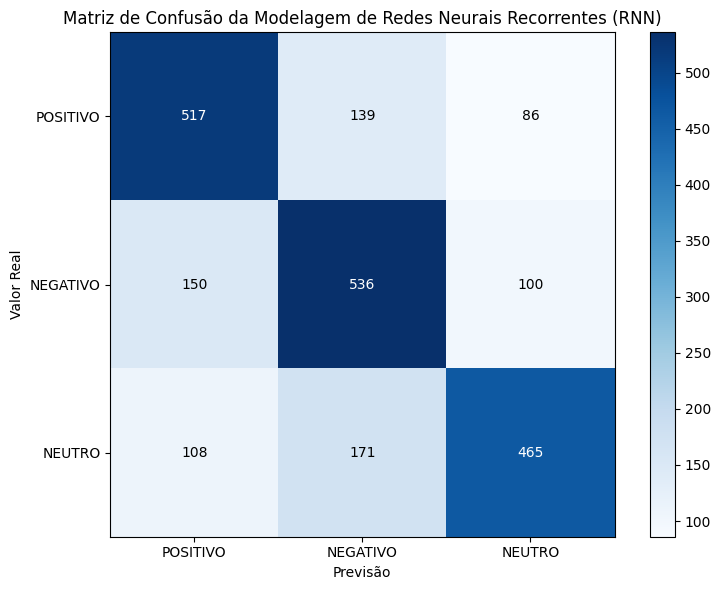

In [123]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Previsões no conjunto de teste
y_test = y_test.astype(int)
y_pred = y_pred.astype(int)

# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Definição dos rótulos das classes
class_labels = ['POSITIVO', 'NEGATIVO', 'NEUTRO']

# Plot da matriz de confusão
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão da Modelagem de Redes Neurais Recorrentes (RNN)')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# Adição dos valores numéricos na matriz
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'), ha='center', va='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()

### 13.4 - Salvando CSV do resultado da Modelagem de Redes Neurais Recorrentes (RNN)

In [124]:
"""
# Criar DataFrame com as previsões
df_predictions = pd.DataFrame({'Sentimento Real': y_test, 'Sentimento Previsto': y_pred})

# Salvar o DataFrame em um arquivo CSV
df_predictions.to_csv('predictionsRNN3CB.csv', index=False)
print("Salvo com sucesso")
"""

'\n# Criar DataFrame com as previsões\ndf_predictions = pd.DataFrame({\'Sentimento Real\': y_test, \'Sentimento Previsto\': y_pred})\n\n# Salvar o DataFrame em um arquivo CSV\ndf_predictions.to_csv(\'predictionsRNN3CB.csv\', index=False)\nprint("Salvo com sucesso")\n'

# Atividade 14 - Implementação do Embedding Layer com Word2Vec

O modelo de aprendizado profundo utilizado, que inclui as camadas de incorporação (Embedding), convolução unidimensional (Conv1D), pooling máximo global (GlobalMaxPooling1D) e camadas densas (Dense), traz benefícios significativos para o Processamento de Linguagem Natural (PLN).

Essas camadas são projetadas para lidar especificamente com dados textuais e têm vantagens específicas:

A camada de incorporação (Embedding) permite a representação eficiente de palavras em vetores densos de tamanho fixo, capturando relações semânticas e contextuais entre as palavras. Isso é fundamental para o PLN, pois possibilita que o modelo compreenda melhor as similaridades e diferenças entre as palavras em um texto, melhorando a capacidade de generalização e entendimento do contexto.

A camada convolucional unidimensional (Conv1D) é capaz de identificar padrões locais em sequências de palavras, como combinações específicas de palavras ou frases. Isso permite que o modelo extraia características relevantes dos dados textuais, capturando informações importantes em diferentes níveis de granularidade. A convolução unidimensional é especialmente útil para identificar características importantes em trechos curtos de texto.

A camada de pooling máximo global (GlobalMaxPooling1D) reduz a dimensionalidade dos recursos extraídos pela camada convolucional, mantendo as características mais importantes. Essa operação de pooling preserva as informações mais salientes, tornando o modelo mais robusto a variações na posição das características dentro das sequências. Além disso, o pooling máximo global permite que o modelo trabalhe com sequências de comprimentos variáveis, já que retorna um vetor de características fixo independentemente do tamanho da sequência original.

As camadas densas (Dense) são responsáveis por aprender padrões mais complexos nos recursos extraídos pelas camadas anteriores. Elas permitem que o modelo capture relações não lineares entre as características, aumentando a capacidade de representação e aprendizado. As camadas densas são cruciais para a tomada de decisões finais do modelo, mapeando os recursos em probabilidades de pertencer a cada classe e permitindo a classificação adequada dos dados textuais.

Portanto, o uso dessas camadas no modelo de aprendizado profundo para PLN traz ganhos significativos, permitindo que o modelo compreenda melhor o contexto, identifique padrões relevantes nas sequências de palavras e capture informações importantes para a classificação precisa dos dados textuais. Essa arquitetura é especialmente útil para tarefas como classificação de sentimentos, análise de sentimento, categorização de texto e muitas outras aplicações de PLN.

In [125]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer

## 14.1 - Definição da Função

In [126]:
def classification_embedding_layer(X, y):
  # Separar em conjuntos de treinamento e teste
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  # Tokenizar os dados
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(X_train)
  X_train = tokenizer.texts_to_sequences(X_train)
  X_test = tokenizer.texts_to_sequences(X_test)

  # Obter o tamanho do vocabulário
  vocab_size = len(tokenizer.word_index) + 1

  # Padding para ter sequências com o mesmo comprimento
  max_length = 50
  X_train = pad_sequences(X_train, maxlen=max_length)
  X_test = pad_sequences(X_test, maxlen=max_length)

  # Criar o modelo
  model = Sequential()
  model.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))
  model.add(LSTM(128))
  model.add(Dense(3, activation='softmax'))

  # Compilar o modelo
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  # Treinar o modelo
  model.fit(X_train, y_train, epochs=10, batch_size=32)

  # Fazer previsões no conjunto de teste
  y_pred = model.predict(X_test)
  y_pred = np.argmax(y_pred, axis=1)

  # Printar o relatório de classificação (incluindo recall)
  labels = ['Negative', 'Positive', 'Neutral']

  # Avaliar a precisão do modelo
  _, accuracy = model.evaluate(X_test, y_test)
  print('Acurácia: %.2f%%' % (accuracy * 100))

  report = classification_report(y_test, y_pred, target_names=labels)
  print(report)

  return model, y_test, y_pred

## Embedding Layer - Duas categorias e com balanceamento

### 14.2 - Teste de Função

In [127]:
"""
# Balanceamento dos dados
df_positive = dfW2Vmodelo[dfW2Vmodelo['sentimento'] == 0]
df_negative = dfW2Vmodelo[dfW2Vmodelo['sentimento'] == 1]

df_positive_resampled = resample(df_positive, replace=True, n_samples=len(df_negative), random_state=42)

dfrnn_balanced = pd.concat([df_positive_resampled, df_negative])

# Inverter a codificação das classes
dfrnn_balanced['sentimento'] = dfrnn_balanced['sentimento'].map({1: 0, 0: 1})

# Separando os dados em X e y (balanceados)
X = np.array(dfrnn_balanced['Frase'])
Y = np.array(dfrnn_balanced['sentimento'])

# Definição dos hiperparâmetros
num_epochs = 20
batch_size = 64
learning_rate = 0.001
num_hidden_units = 128
embedding_dim = 50

loss, accuracy, y_pred, y_test, X_test = classification_embedding_layer(X, Y, num_epochs, batch_size, learning_rate, num_hidden_units, embedding_dim)
"""

"\n# Balanceamento dos dados\ndf_positive = dfW2Vmodelo[dfW2Vmodelo['sentimento'] == 0]\ndf_negative = dfW2Vmodelo[dfW2Vmodelo['sentimento'] == 1]\n\ndf_positive_resampled = resample(df_positive, replace=True, n_samples=len(df_negative), random_state=42)\n\ndfrnn_balanced = pd.concat([df_positive_resampled, df_negative])\n\n# Inverter a codificação das classes\ndfrnn_balanced['sentimento'] = dfrnn_balanced['sentimento'].map({1: 0, 0: 1})\n\n# Separando os dados em X e y (balanceados)\nX = np.array(dfrnn_balanced['Frase'])\nY = np.array(dfrnn_balanced['sentimento'])\n\n# Definição dos hiperparâmetros\nnum_epochs = 20\nbatch_size = 64\nlearning_rate = 0.001\nnum_hidden_units = 128\nembedding_dim = 50\n\nloss, accuracy, y_pred, y_test, X_test = classification_embedding_layer(X, Y, num_epochs, batch_size, learning_rate, num_hidden_units, embedding_dim)\n"

### 14.3 - Visualização da Matriz de Confusão do Embedding Layer

In [128]:
"""
# Calcular a matriz de confusão
confusion = confusion_matrix(y_pred,y_test)

print("Matriz de Confusão:")
print(confusion)
"""

'\n# Calcular a matriz de confusão\nconfusion = confusion_matrix(y_pred,y_test)\n\nprint("Matriz de Confusão:")\nprint(confusion)\n'

A matriz de confusão que você obteve mostra os seguintes resultados:

- Verdadeiros Positivos (TP): 127
- Falsos Positivos (FP): 38
- Falsos Negativos (FN): 25
- Verdadeiros Negativos (TN): 141

In [129]:
"""
# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Definição dos rótulos das classes
class_labels = ['POSITIVO', 'NEGATIVO']

# Criação da matriz de confusão personalizada
cm_custom = np.array([[cm[1, 1], cm[1, 0]], [cm[0, 1], cm[0, 0]]])

# Plot da matriz de confusão
plt.figure(figsize=(8, 6))
plt.imshow(cm_custom, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão do Embedding Layer com Word2Vec')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# Adição dos valores numéricos na matriz
thresh = cm_custom.max() / 2.0
for i, j in np.ndindex(cm_custom.shape):
    plt.text(j, i, format(cm_custom[i, j], 'd'), ha='center', va='center',
             color='white' if cm_custom[i, j] > thresh else 'black')

plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()
"""

"\n# Cálculo da matriz de confusão\ncm = confusion_matrix(y_test, y_pred)\n\n# Definição dos rótulos das classes\nclass_labels = ['POSITIVO', 'NEGATIVO']\n\n# Criação da matriz de confusão personalizada\ncm_custom = np.array([[cm[1, 1], cm[1, 0]], [cm[0, 1], cm[0, 0]]])\n\n# Plot da matriz de confusão\nplt.figure(figsize=(8, 6))\nplt.imshow(cm_custom, interpolation='nearest', cmap=plt.cm.Blues)\nplt.title('Matriz de Confusão do Embedding Layer com Word2Vec')\nplt.colorbar()\ntick_marks = np.arange(len(class_labels))\nplt.xticks(tick_marks, class_labels)\nplt.yticks(tick_marks, class_labels)\n\n# Adição dos valores numéricos na matriz\nthresh = cm_custom.max() / 2.0\nfor i, j in np.ndindex(cm_custom.shape):\n    plt.text(j, i, format(cm_custom[i, j], 'd'), ha='center', va='center',\n             color='white' if cm_custom[i, j] > thresh else 'black')\n\nplt.xlabel('Previsão')\nplt.ylabel('Valor Real')\nplt.tight_layout()\nplt.show()\n"

### 14.4 - Salvando CSV do resultado Embedding Layer com Word2Vec

In [130]:
"""
import pandas as pd

# Converter X_test em lista e y_pred em array unidimensional
X_test_list = X_test.tolist()
y_pred_flat = y_pred.flatten()

# Criar um DataFrame com as previsões
df_resultEL = pd.DataFrame({'Texto': X_test_list, 'Sentimento_Predito': y_pred_flat})

# Salvar o DataFrame em um arquivo CSV
df_resultEL.to_csv('/content/drive/MyDrive/PROJETO BTG/resultados.csv', index=False)
print("Salvo com sucesso")
"""

'\nimport pandas as pd\n\n# Converter X_test em lista e y_pred em array unidimensional\nX_test_list = X_test.tolist()\ny_pred_flat = y_pred.flatten()\n\n# Criar um DataFrame com as previsões\ndf_resultEL = pd.DataFrame({\'Texto\': X_test_list, \'Sentimento_Predito\': y_pred_flat})\n\n# Salvar o DataFrame em um arquivo CSV\ndf_resultEL.to_csv(\'/content/drive/MyDrive/PROJETO BTG/resultados.csv\', index=False)\nprint("Salvo com sucesso")\n'

In [131]:
# df_resultEL

## Embedding Layer - Três categorias e sem balanceamento

### 14.2 - Teste de Função

In [132]:
# Carregar os dados
df_negative = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 0]
df_positive = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 1]
df_neutral = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 2]

dfrnn_balanced = pd.concat([df_positive, df_negative, df_neutral])

# Separar os dados em X e y (balanceados)
X = dfrnn_balanced['Frase'].values
y = dfrnn_balanced['sentimento2'].values

model, y_test, y_pred = classification_embedding_layer(X, y)

Epoch 1/10
270/270 [==============================] - 28s 97ms/step - loss: 0.8105 - accuracy: 0.6367
Epoch 2/10
270/270 [==============================] - 25s 91ms/step - loss: 0.4380 - accuracy: 0.8251
Epoch 3/10
270/270 [==============================] - 26s 96ms/step - loss: 0.2381 - accuracy: 0.9134
Epoch 4/10
270/270 [==============================] - 27s 98ms/step - loss: 0.1462 - accuracy: 0.9500
Epoch 5/10
270/270 [==============================] - 27s 101ms/step - loss: 0.1073 - accuracy: 0.9623
Epoch 6/10
270/270 [==============================] - 29s 108ms/step - loss: 0.0857 - accuracy: 0.9693
Epoch 7/10
270/270 [==============================] - 27s 101ms/step - loss: 0.0737 - accuracy: 0.9733
Epoch 8/10
270/270 [==============================] - 25s 94ms/step - loss: 0.0595 - accuracy: 0.9774
Epoch 9/10
270/270 [==============================] - 27s 101ms/step - loss: 0.0553 - accuracy: 0.9786
Epoch 10/10
116/116 [==============================] - 3s 25ms/step - loss: 1.

### 14.3 - Visualização da Matriz de Confusão do Embedding Layer

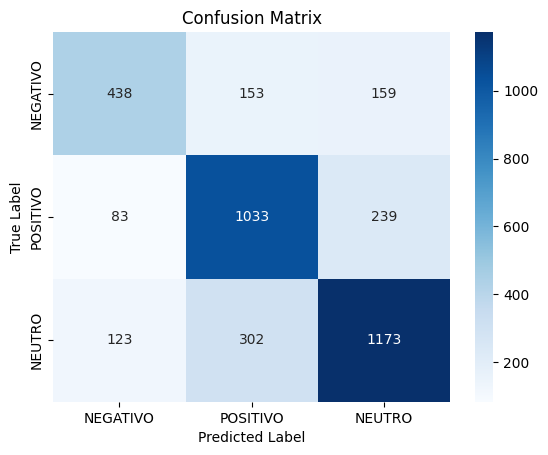

In [133]:
# Criar matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Printar a matriz de confusão
labels = ['NEGATIVO', 'POSITIVO', 'NEUTRO']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 14.4 - Salvando CSV do resultado Embedding Layer com Word2Vec

In [134]:
# df_resultEL

O algoritmo Naive Bayes é um método de machine learning classificador que se baseia na probabilidade de cada evento ocorrer, desconsiderando a correlação entre features de uma base de dados para prever uma variável de interesse.

### 14.5 - Hiperparâmetros com Random Search do Embedding Layer

In [135]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import recall_score

def create_model(embedding_dim, vocab_size, max_length):
    # Criação do modelo
    model = Sequential([
        Embedding(vocab_size, embedding_dim, input_length=max_length),
        Conv1D(32, 3, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(units=128, activation='relu'),
        Dense(units=3, activation='softmax')  # Altere o número de unidades para o número de classes
    ])

    # Compilação do modelo
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Dados de entrada
X = dfrnn_balanced['Frase'].values
Y = dfrnn_balanced['sentimento2'].values

# Tokenização
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
max_length = max(len(seq) for seq in X_seq)
X_padded = pad_sequences(X_seq, maxlen=max_length)
vocab_size = len(tokenizer.word_index) + 1

# Melhores hiperparâmetros encontrados
best_embedding_dim = 100
best_batch_size = 32

# Criação do modelo com os melhores hiperparâmetros
model = create_model(best_embedding_dim, vocab_size, max_length)

# Treinamento do modelo
model.fit(X_padded, Y, batch_size=best_batch_size, epochs=10, validation_split=0.2)

# Avaliação do modelo
y_pred = model.predict(X_padded)
y_pred = np.argmax(y_pred, axis=1)  # Converter as previsões para as classes numéricas
recall = recall_score(Y, y_pred, average='weighted')
print('Recall:', recall)


Epoch 1/10
309/309 [==============================] - 29s 89ms/step - loss: 0.7805 - accuracy: 0.6534 - val_loss: 1.0815 - val_accuracy: 0.4719
Epoch 2/10
309/309 [==============================] - 27s 88ms/step - loss: 0.3473 - accuracy: 0.8747 - val_loss: 1.3406 - val_accuracy: 0.5136
Epoch 3/10
309/309 [==============================] - 25s 82ms/step - loss: 0.1202 - accuracy: 0.9631 - val_loss: 1.2887 - val_accuracy: 0.5687
Epoch 4/10
309/309 [==============================] - 26s 85ms/step - loss: 0.0579 - accuracy: 0.9828 - val_loss: 1.8218 - val_accuracy: 0.4945
Epoch 5/10
309/309 [==============================] - 26s 83ms/step - loss: 0.0480 - accuracy: 0.9876 - val_loss: 2.1121 - val_accuracy: 0.4840
Epoch 6/10
309/309 [==============================] - 25s 80ms/step - loss: 0.0392 - accuracy: 0.9897 - val_loss: 1.5087 - val_accuracy: 0.5703
Epoch 7/10
309/309 [==============================] - 24s 79ms/step - loss: 0.0339 - accuracy: 0.9911 - val_loss: 2.1246 - val_accuracy:

### 14.5.1 - Embedding Layer com os Melhores Hiperparâmetros

In [136]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import recall_score

def create_model(vocab_size, max_length):
    # Criação do modelo
    model = Sequential([
        Embedding(vocab_size, 100, input_length=max_length),  # Aplicação do melhor hiperparâmetro
        Conv1D(32, 3, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(units=128, activation='relu'),
        Dense(units=1, activation='sigmoid')
    ])

    # Compilação do modelo
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.Recall()])

    return model

# Dados de entrada
X = dfrnn_balanced['Frase'].values
Y = dfrnn_balanced['sentimento2'].values

# Tokenização
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
max_length = max(len(seq) for seq in X_seq)
X_padded = pad_sequences(X_seq, maxlen=max_length)
vocab_size = len(tokenizer.word_index) + 1

# Criação do modelo com o melhor hiperparâmetro
model = create_model(vocab_size, max_length)

# Treinamento do modelo
model.fit(X_padded, Y, batch_size=32, epochs=10, validation_split=0.2)

# Avaliação do modelo
loss, accuracy, recall = model.evaluate(X_padded, Y)
print('Recall:', recall)


Epoch 1/10
309/309 [==============================] - 26s 78ms/step - loss: -51.9247 - accuracy: 0.4539 - recall: 0.9981 - val_loss: -2468.0112 - val_accuracy: 0.0000e+00 - val_recall: 1.0000
Epoch 2/10
309/309 [==============================] - 25s 81ms/step - loss: -3974.1143 - accuracy: 0.4549 - recall: 0.9997 - val_loss: -62066.6562 - val_accuracy: 0.0000e+00 - val_recall: 1.0000
Epoch 3/10
309/309 [==============================] - 26s 85ms/step - loss: -33692.6641 - accuracy: 0.4565 - recall: 0.9995 - val_loss: -336786.0938 - val_accuracy: 0.0000e+00 - val_recall: 1.0000
Epoch 4/10
309/309 [==============================] - 21s 69ms/step - loss: -133815.1094 - accuracy: 0.4572 - recall: 0.9993 - val_loss: -1090067.1250 - val_accuracy: 0.0000e+00 - val_recall: 1.0000
Epoch 5/10
309/309 [==============================] - 25s 82ms/step - loss: -363443.1562 - accuracy: 0.4582 - recall: 0.9990 - val_loss: -2681486.7500 - val_accuracy: 0.0000e+00 - val_recall: 1.0000
Epoch 6/10
309/309

## Embedding Layer - Três categorias e com balanceamento

### 14.2 - Teste de Função

In [137]:
# Balanceamento dos dados
df_negative = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 0]
df_positive = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 1]
df_neutral = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 2]

df_positive_resampled = resample(df_positive, replace=True, n_samples=len(df_negative), random_state=42)
df_neutral_resampled = resample(df_neutral, replace=True, n_samples=len(df_negative), random_state=42)

dfrnn_balanced = pd.concat([df_positive_resampled, df_negative, df_neutral_resampled])

# Separar os dados em X e y (balanceados)
X = dfrnn_balanced['Frase'].values
y = dfrnn_balanced['sentimento2'].values

model, y_test, y_pred = classification_embedding_layer(X, y)

Epoch 1/10
166/166 [==============================] - 23s 105ms/step - loss: 0.8722 - accuracy: 0.5968
Epoch 2/10
166/166 [==============================] - 19s 114ms/step - loss: 0.4648 - accuracy: 0.8215
Epoch 3/10
166/166 [==============================] - 17s 100ms/step - loss: 0.2210 - accuracy: 0.9232
Epoch 4/10
166/166 [==============================] - 19s 113ms/step - loss: 0.1179 - accuracy: 0.9602
Epoch 5/10
166/166 [==============================] - 18s 106ms/step - loss: 0.0849 - accuracy: 0.9736
Epoch 6/10
166/166 [==============================] - 18s 111ms/step - loss: 0.0648 - accuracy: 0.9792
Epoch 7/10
166/166 [==============================] - 18s 106ms/step - loss: 0.0528 - accuracy: 0.9802
Epoch 8/10
166/166 [==============================] - 17s 100ms/step - loss: 0.0497 - accuracy: 0.9813
Epoch 9/10
166/166 [==============================] - 17s 101ms/step - loss: 0.0431 - accuracy: 0.9825
Epoch 10/10
71/71 [==============================] - 4s 42ms/step - loss:

### 14.3 - Visualização da Matriz de Confusão do Embedding Layer

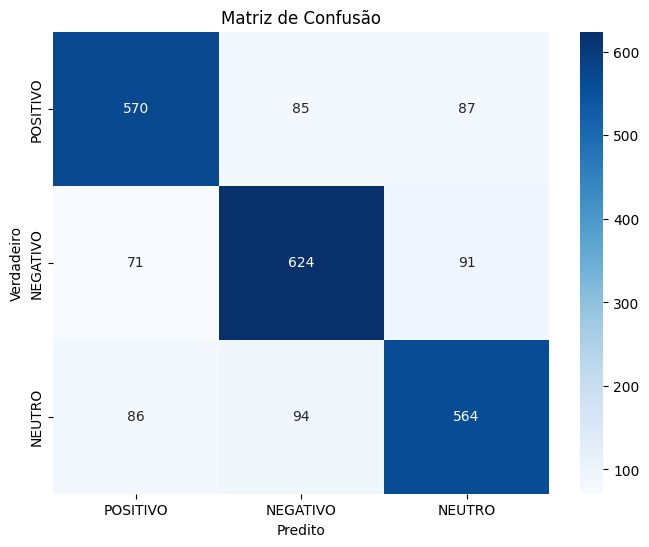

In [138]:
import seaborn as sns

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Definição dos rótulos das classes
class_labels = ['POSITIVO', 'NEGATIVO', 'NEUTRO']

# Plot da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

### 14.4 - Salvando CSV do resultado Embedding Layer com Word2Vec

In [139]:
# df_resultEL

#Atividade 15 - Modelagem de Naive Bayes

O algoritmo “Naive Bayes” foi baseado no “Teorema de Bayes”, modelo criado pelo matemático inglê Thomas Bayes (1701 – 1761). Tal modelo realiza uma classificação probabilística de observações, desconsiderando correlações entre features, caracterizando-as em classes pré-definidas. Dessa maneira, realiza a predição de um evento A acontecer dado a ocorrência que um evento B já aconteceu. Ao contrario dos outros modelos que consideram a proximidade grafica entre dois elementos para os atribuir uma classe, o Naive Bayes se baseia inteiramente na formula do "Teorema de Bayes" para fazer as contas que irão atribuir a classe do elemento.

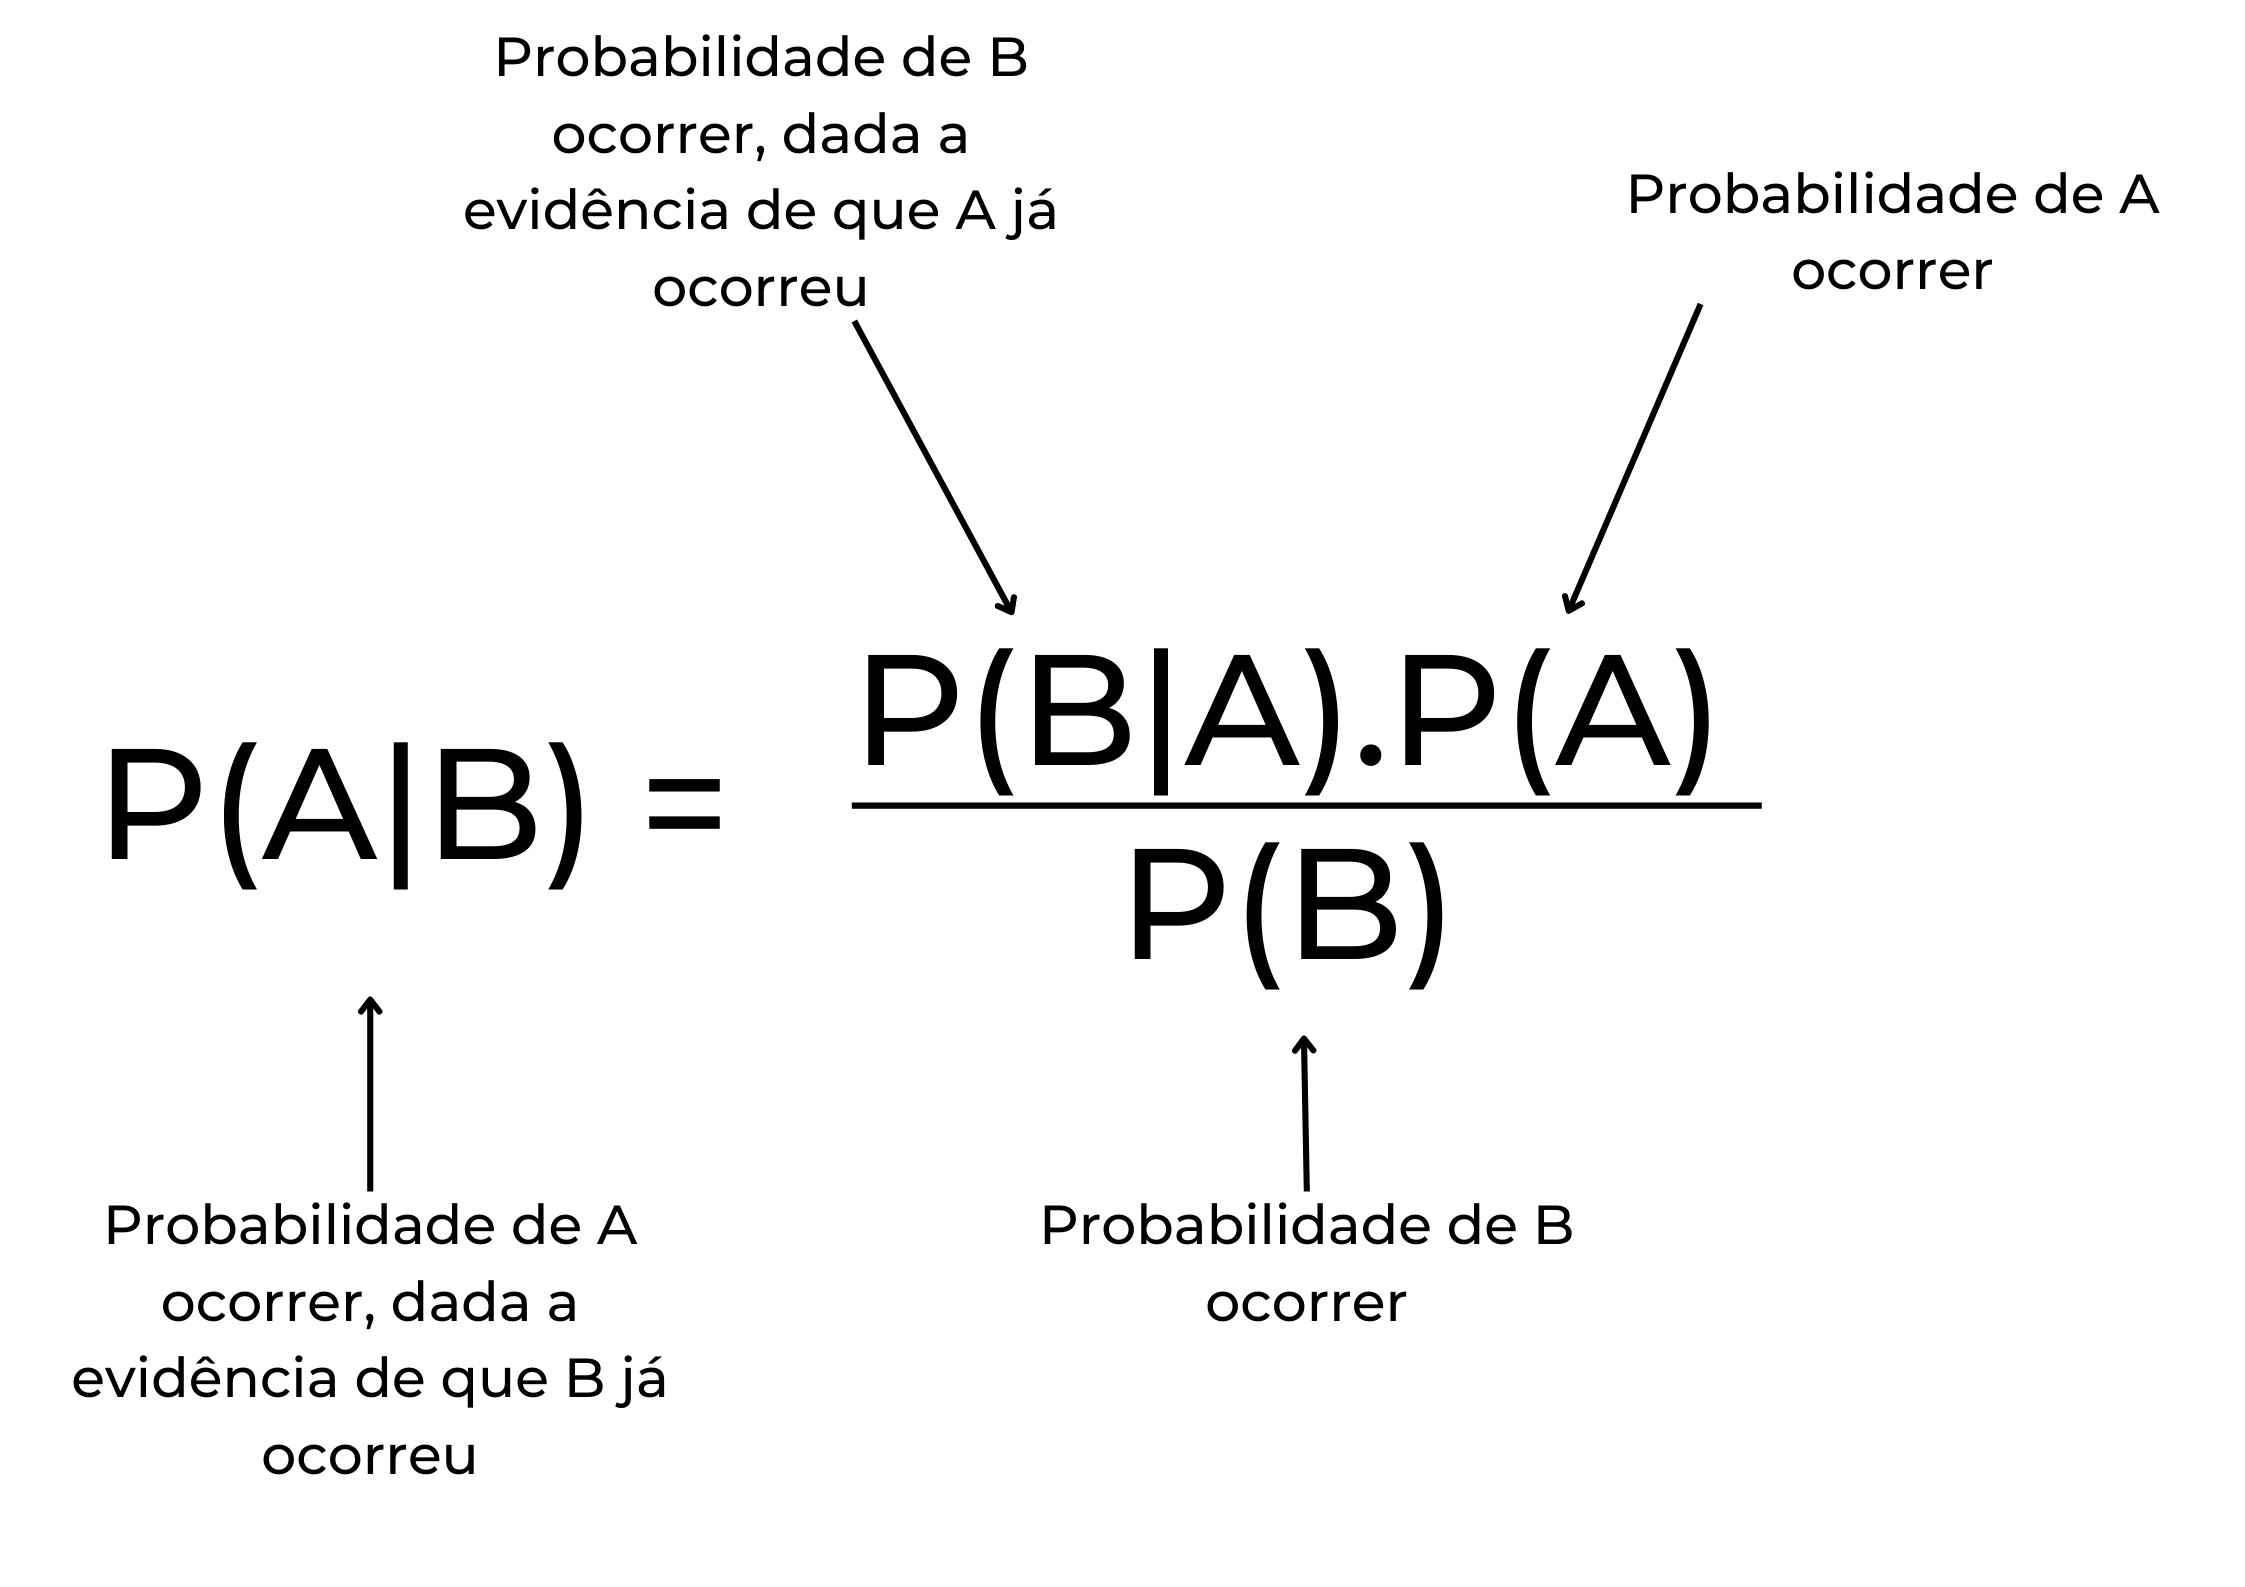

Fonte da imagem: Autoria Própria

## 15.1 - Definição da Função

In [140]:
# Função de treinamento Naive Bayes
def classification_naive_bayes(X,Y):
    # Divisão do DataFrame em conjuntos de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

    # Criação de uma instância do classificador Naive Bayes Gaussiano
    gnb = GaussianNB()

    # Treinamento do classificador utilizando os dados de treinamento
    gnb.fit(X_train, y_train)

    # Previsões nos dados de teste
    y_pred = gnb.predict(X_test)

    # Calculo da precisão do classificador
    accuracy = accuracy_score(y_test, y_pred)

    # Retorno da acurácia, y_test, y_pred
    return accuracy, y_test, y_pred

## Naive Bayes - Duas categorias com balanceamento

### 15.2 - Teste da Função

In [141]:
'''
# Balanceamento dos dados
df_positive = dfW2Vmodelo[dfW2Vmodelo['sentimento'] == 0]
df_negative = dfW2Vmodelo[dfW2Vmodelo['sentimento'] == 1]

df_positive_resampled = resample(df_positive, replace=True, n_samples=len(df_negative), random_state=42)

dfrnn_balanced = pd.concat([df_positive_resampled, df_negative])

# Inverter a codificação das classes
dfrnn_balanced['sentimento'] = dfrnn_balanced['sentimento'].map({1: 0, 0: 1})

# Separando os dados em X e y (balanceados)
X = np.array(dfrnn_balanced.drop(['Frase', 'sentimento'], axis=1))
Y = np.array(dfrnn_balanced['sentimento'])

# Chamada da função com os dados balanceados
accuracy, y_test, y_pred = classification_naive_bayes(X, Y)

# Imprime a acurácia
print(accuracy)
'''

"\n# Balanceamento dos dados\ndf_positive = dfW2Vmodelo[dfW2Vmodelo['sentimento'] == 0]\ndf_negative = dfW2Vmodelo[dfW2Vmodelo['sentimento'] == 1]\n\ndf_positive_resampled = resample(df_positive, replace=True, n_samples=len(df_negative), random_state=42)\n\ndfrnn_balanced = pd.concat([df_positive_resampled, df_negative])\n\n# Inverter a codificação das classes\ndfrnn_balanced['sentimento'] = dfrnn_balanced['sentimento'].map({1: 0, 0: 1})\n\n# Separando os dados em X e y (balanceados)\nX = np.array(dfrnn_balanced.drop(['Frase', 'sentimento'], axis=1))\nY = np.array(dfrnn_balanced['sentimento'])\n\n# Chamada da função com os dados balanceados\naccuracy, y_test, y_pred = classification_naive_bayes(X, Y)\n\n# Imprime a acurácia\nprint(accuracy)\n"

A acurácia foi utilizada para avaliar o desempenho do modelo Naive Bayes. O resultado representa a proporção de instâncias classificadas corretamente em relação ao total de instâncias.

### 15.3 - Visualização da Matriz de Confusão da Modelagem de Naive Bayes

In [142]:
'''
# Cálculo da matriz de confusão
VP = confusion_matrix(y_test, y_pred)[0, 0]
FN = confusion_matrix(y_test, y_pred)[0, 1]
FP = confusion_matrix(y_test, y_pred)[1, 0]
VN = confusion_matrix(y_test, y_pred)[1, 1]

# Criação da matriz de confusão personalizada
custom_cm = np.array([[VP, FN], [FP, VN]])

# Plot da matriz de confusão
plt.figure(figsize=(8, 6))
plt.imshow(custom_cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão da Modelagem de Naive Bayes')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['POSITIVO', 'NEGATIVO'])
plt.yticks(tick_marks, ['POSITIVO', 'NEGATIVO'])

# Adição dos valores numéricos na matriz
thresh = custom_cm.max() / 2.
for i, j in np.ndindex(custom_cm.shape):
    plt.text(j, i, format(custom_cm[i, j], 'd'), ha='center', va='center',
             color='white' if custom_cm[i, j] > thresh else 'black')

plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()
'''

"\n# Cálculo da matriz de confusão\nVP = confusion_matrix(y_test, y_pred)[0, 0]\nFN = confusion_matrix(y_test, y_pred)[0, 1]\nFP = confusion_matrix(y_test, y_pred)[1, 0]\nVN = confusion_matrix(y_test, y_pred)[1, 1]\n\n# Criação da matriz de confusão personalizada\ncustom_cm = np.array([[VP, FN], [FP, VN]])\n\n# Plot da matriz de confusão\nplt.figure(figsize=(8, 6))\nplt.imshow(custom_cm, interpolation='nearest', cmap=plt.cm.Blues)\nplt.title('Matriz de Confusão da Modelagem de Naive Bayes')\nplt.colorbar()\ntick_marks = np.arange(2)\nplt.xticks(tick_marks, ['POSITIVO', 'NEGATIVO'])\nplt.yticks(tick_marks, ['POSITIVO', 'NEGATIVO'])\n\n# Adição dos valores numéricos na matriz\nthresh = custom_cm.max() / 2.\nfor i, j in np.ndindex(custom_cm.shape):\n    plt.text(j, i, format(custom_cm[i, j], 'd'), ha='center', va='center',\n             color='white' if custom_cm[i, j] > thresh else 'black')\n\nplt.xlabel('Previsão')\nplt.ylabel('Valor Real')\nplt.tight_layout()\nplt.show()\n"

### 15.4 - Salvando CSV do resultado da Modelagem de Naive Bayes

In [143]:
'''
# Crie um DataFrame com as previsões
df_resultNB = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
# Salve o DataFrame em um arquivo CSV
df_resultNB.to_csv('/content/drive/MyDrive/PROJETO BTG/resultadoNaiveBayes.csv', index=False)
print('Salvo com sucesso')
'''

"\n# Crie um DataFrame com as previsões\ndf_resultNB = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})\n# Salve o DataFrame em um arquivo CSV\ndf_resultNB.to_csv('/content/drive/MyDrive/PROJETO BTG/resultadoNaiveBayes.csv', index=False)\nprint('Salvo com sucesso')\n"

O Naive Bayes é um algoritmo de aprendizado supervisionado que faz uso do Teorema de Bayes para estimar a probabilidade de um exemplo pertencer a cada uma das classes disponíveis. No caso binário, onde temos duas classes (0 e 1), o modelo calcula a probabilidade de um exemplo pertencer à classe 0 e à classe 1.

## Naive Bayes - Três categorias sem balanceamento

### 15.2 - Teste da Função

In [144]:
# Balanceamento dos dados
df_negativo = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 0]
df_positive = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 1]
df_neutral = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 2]

dfrnn_balanced = pd.concat([df_negative, df_positive, df_neutral])

# Separando os dados em X e y (balanceados)
X = np.array(dfrnn_balanced.drop(['Frase', 'sentimento2'], axis=1))
Y = np.array(dfrnn_balanced['sentimento2'])

# Chamada da função com os dados balanceados
accuracy, y_test, y_pred = classification_naive_bayes(X, Y)

# Imprime a acurácia
print(accuracy)

0.5684580070213341


A acurácia foi utilizada para avaliar o desempenho do modelo Naive Bayes. O resultado representa a proporção de instâncias classificadas corretamente em relação ao total de instâncias.

### 15.3 - Visualização da Matriz de Confusão da Modelagem de Naive Bayes

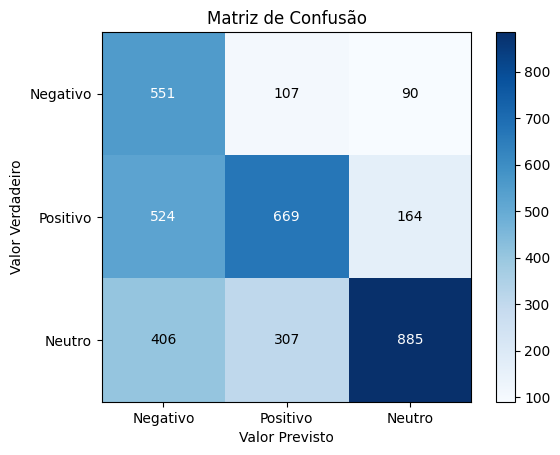

In [145]:
# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plot da matriz de confusão
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Configurações do gráfico
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=['Negativo', 'Positivo', 'Neutro'],
       yticklabels=['Negativo', 'Positivo', 'Neutro'],
       title='Matriz de Confusão',
       ylabel='Valor Verdadeiro',
       xlabel='Valor Previsto')

# Adiciona os valores nas células da matriz
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

# Mostra o gráfico
plt.show()

### 15.4 - Hiperparâmetros com Random Search do Naive Bayes

In [146]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from scipy.stats import uniform
from sklearn.metrics import recall_score

# Função de treinamento Naive Bayes
def classification_naive_bayes(X, Y):
    # Divisão do DataFrame em conjuntos de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

    # Definindo os hiperparâmetros a serem otimizados
    param_dist = {'var_smoothing': uniform(1e-20, 1e-2)}  # Intervalo para o hiperparâmetro var_smoothing

    # Criação do classificador Naive Bayes
    clf = GaussianNB()

    # Realização da busca aleatória com validação cruzada
    random_search = RandomizedSearchCV(clf, param_distributions=param_dist, cv=5, n_iter=10, random_state=42)
    random_search.fit(X_train, y_train)

    # Melhores hiperparâmetros encontrados
    best_params = random_search.best_params_
    print("Melhores hiperparâmetros:", best_params)

    # Treinamento do classificador utilizando os melhores hiperparâmetros
    clf = GaussianNB(**best_params)
    clf.fit(X_train, y_train)

    # Previsões nos dados de teste
    y_pred = clf.predict(X_test)

    # Cálculo do recall
    recall = recall_score(y_test, y_pred, average='weighted')

    # Retorno do recall, y_test, y_pred
    return recall, y_test, y_pred

# Balanceamento dos dados
df_negative = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 0]
df_positive = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 1]
df_neutral = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 2]

dfrnn_balanced = pd.concat([df_negative, df_positive, df_neutral])

# Separando os dados em X e y (balanceados)
X = np.array(dfrnn_balanced.drop(['Frase', 'sentimento2'], axis=1))
Y = np.array(dfrnn_balanced['sentimento2'])

# Chamada da função com os dados balanceados
recall, y_test, y_pred = classification_naive_bayes(X, Y)

# Imprime o recall
print("Recall:", recall)


Melhores hiperparâmetros: {'var_smoothing': 0.0005808361216819946}
Recall: 0.5673778017823387


###15.4.1 - Aplicando o hiperparâmetro

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score
from imblearn.over_sampling import RandomOverSampler

# Balanceamento dos dados
df_negative = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 0]
df_positive = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 1]
df_neutral = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 2]

# Realizar oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, Y_resampled = ros.fit_resample(X, Y)

# Divisão dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, Y_resampled, test_size=0.3, random_state=42)

# Criação do classificador Naive Bayes com o melhor hiperparâmetro
clf = GaussianNB(var_smoothing=0.0005808361216819946)

# Treinamento do classificador
clf.fit(X_train, y_train)

# Previsões nos dados de teste
y_pred = clf.predict(X_test)

# Cálculo do recall
recall = recall_score(y_test, y_pred, average='macro')

# Imprimir o resultado do recall
print("Recall:", recall)


Recall: 0.5898292123381317


## Naive Bayes - Três categorias com balanceamento

### 15.2 - Teste da Função

In [148]:
# Balanceamento dos dados
df_negativo = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 0]
df_positive = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 1]
df_neutral = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 2]

df_positive_resampled = resample(df_positive, replace=True, n_samples=len(df_negative), random_state=42)
df_neutral_resampled = resample(df_neutral, replace=True, n_samples=len(df_negative), random_state=42)

dfrnn_balanced = pd.concat([df_negative, df_positive_resampled, df_neutral_resampled])

# Separando os dados em X e y (balanceados)
X = np.array(dfrnn_balanced.drop(['Frase', 'sentimento2'], axis=1))
Y = np.array(dfrnn_balanced['sentimento2'])

# Chamada da função com os dados balanceados
accuracy, y_test, y_pred = classification_naive_bayes(X, Y)

# Imprime a acurácia
print(accuracy)

Melhores hiperparâmetros: {'var_smoothing': 0.0015601864044243652}
0.6034330985915493


A acurácia foi utilizada para avaliar o desempenho do modelo Naive Bayes. O resultado representa a proporção de instâncias classificadas corretamente em relação ao total de instâncias.

### 15.3 - Visualização da Matriz de Confusão da Modelagem de Naive Bayes

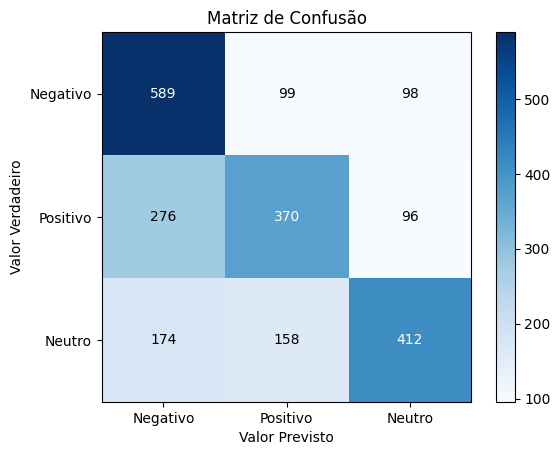

In [149]:
# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plot da matriz de confusão
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Configurações do gráfico
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=['Negativo', 'Positivo', 'Neutro'],
       yticklabels=['Negativo', 'Positivo', 'Neutro'],
       title='Matriz de Confusão',
       ylabel='Valor Verdadeiro',
       xlabel='Valor Previsto')

# Adiciona os valores nas células da matriz
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

# Mostra o gráfico
plt.show()

# Atividade 16 - Modelo SVM (Support Vector Machine)

A definição do Support Vector Machine(SVM), pode ser dada por, um modelo que visa encontrar o hiperplano de separação ideal para os dados propostos, sendo o seu maior objetivo a maximização das distâncias das variáveis deixando-as o mais definida possível. Este tende a ser mais complexo que o KNN e apresentar resultados mais estruturados. Nesse algorítmo, é escolhida a reta - denominada de "hiperplano" em maiores dimensões - que mais se distancia entre dois grupos de dados. Ao formular essa reta, o programa consegue predizer a qual classe pertence os dados depois de checar de qual lado da reta esse valor está.

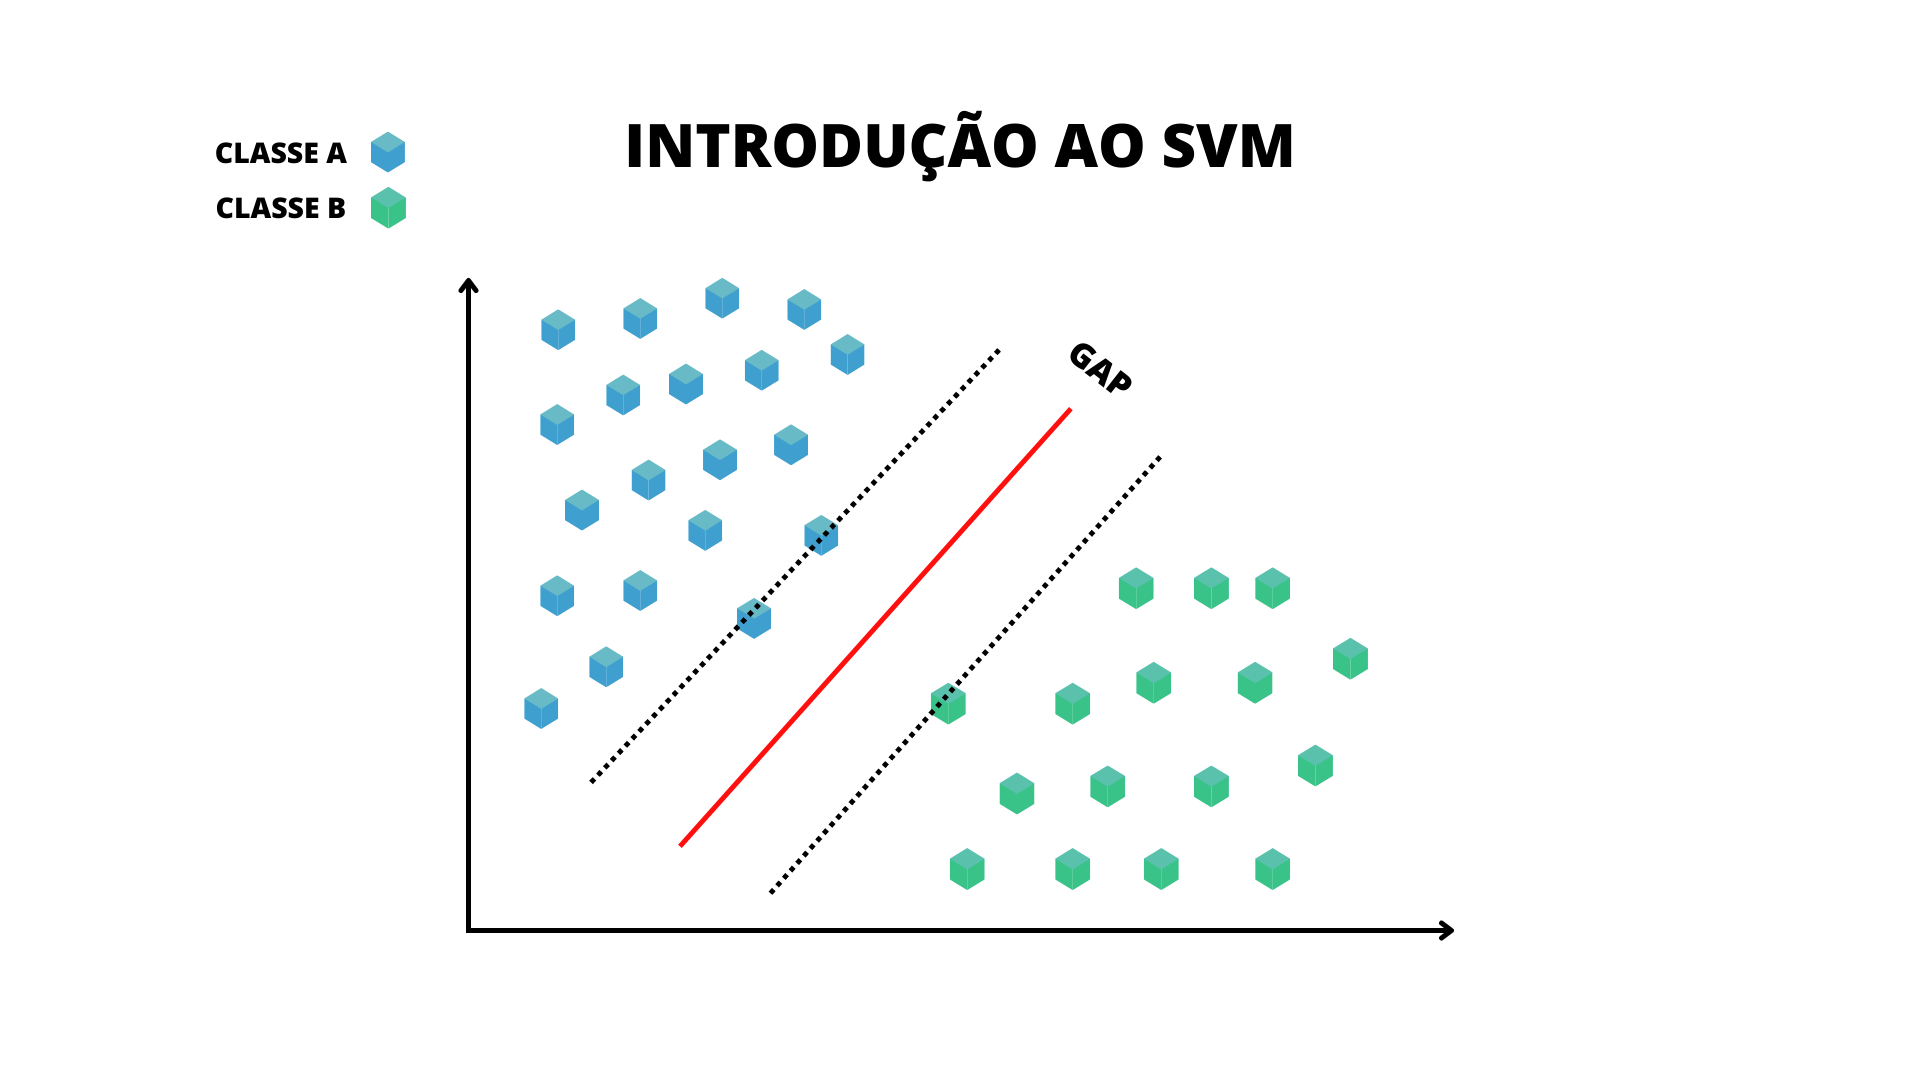

Fonte da imagem: Autoria Própria

In [150]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

## Definição da Função

In [151]:
def classification_svm(x, y):
  # Dividir o conjunto de dados em treinamento e teste
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

  # Criar e treinar o modelo SVM
  modelo_svm = SVC()
  modelo_svm.fit(x_train, y_train)

  # Fazer previsões no conjunto de teste
  y_pred = modelo_svm.predict(x_test)

  # Calcular a acurácia
  acuracia = accuracy_score(y_test, y_pred)
  print("Acurácia:", acuracia)

  # Calcular o F-score
  fscore = f1_score(y_test, y_pred, average='macro')
  print("F-score:", fscore)

  # Calcular o recall
  recall = recall_score(y_test, y_pred, average='macro')
  print("Recall:", recall)

  # Realizar validação cruzada
  scores = cross_val_score(modelo_svm, x, y, cv=5)  # cv define o número de dobras (folds)
  print("Acurácia da Validação Cruzada:", np.mean(scores))

  return modelo_svm, y_test, y_pred

## SVM - Duas categorias com balanceamento

### Definição da Função

In [152]:
'''
from sklearn.svm import SVC

# Definir os arrays x e y
x = np.array(dfrnn_balanced.drop(['Frase', 'sentimento'], axis=1))
y = np.array(dfrnn_balanced['sentimento'])

# Dividir o conjunto de dados em treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo SVM
modelo_svm = SVC()
modelo_svm.fit(x_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = modelo_svm.predict(x_test)
'''

"\nfrom sklearn.svm import SVC\n\n# Definir os arrays x e y\nx = np.array(dfrnn_balanced.drop(['Frase', 'sentimento'], axis=1))\ny = np.array(dfrnn_balanced['sentimento'])\n\n# Dividir o conjunto de dados em treinamento e teste\nx_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)\n\n# Criar e treinar o modelo SVM\nmodelo_svm = SVC()\nmodelo_svm.fit(x_train, y_train)\n\n# Fazer previsões no conjunto de teste\ny_pred = modelo_svm.predict(x_test)\n"

### Teste da Função

In [153]:
'''
# Calcular a acurácia
acuracia = accuracy_score(y_test, y_pred)
print("Acurácia:", acuracia)

# Calcular o F-score
fscore = f1_score(y_test, y_pred)
print("F-score:", fscore)

# Calcular o recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Realizar validação cruzada
scores = cross_val_score(modelo_svm, x, y, cv=5)  # cv define o número de dobras (folds)
print("Acurácia da Validação Cruzada:", np.mean(scores))
'''

'\n# Calcular a acurácia\nacuracia = accuracy_score(y_test, y_pred)\nprint("Acurácia:", acuracia)\n\n# Calcular o F-score\nfscore = f1_score(y_test, y_pred)\nprint("F-score:", fscore)\n\n# Calcular o recall\nrecall = recall_score(y_test, y_pred)\nprint("Recall:", recall)\n\n# Realizar validação cruzada\nscores = cross_val_score(modelo_svm, x, y, cv=5)  # cv define o número de dobras (folds)\nprint("Acurácia da Validação Cruzada:", np.mean(scores))\n'

### Matriz de confusão

In [154]:
'''
# Cálculo da matriz de confusão
VP = confusion_matrix(y_test, y_pred)[0, 0]
FN = confusion_matrix(y_test, y_pred)[0, 1]
FP = confusion_matrix(y_test, y_pred)[1, 0]
VN = confusion_matrix(y_test, y_pred)[1, 1]

# Criação da matriz de confusão personalizada
custom_cm = np.array([[VP, FN], [FP, VN]])

# Plot da matriz de confusão
plt.figure(figsize=(8, 6))
plt.imshow(custom_cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão da Modelagem de SVM')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['POSITIVO', 'NEGATIVO'])
plt.yticks(tick_marks, ['POSITIVO', 'NEGATIVO'])

# Adição dos valores numéricos na matriz
thresh = custom_cm.max() / 2.
for i, j in np.ndindex(custom_cm.shape):
    plt.text(j, i, format(custom_cm[i, j], 'd'), ha='center', va='center',
             color='white' if custom_cm[i, j] > thresh else 'black')

plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()

# Calcular a matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(matriz_confusao)
'''

'\n# Cálculo da matriz de confusão\nVP = confusion_matrix(y_test, y_pred)[0, 0]\nFN = confusion_matrix(y_test, y_pred)[0, 1]\nFP = confusion_matrix(y_test, y_pred)[1, 0]\nVN = confusion_matrix(y_test, y_pred)[1, 1]\n\n# Criação da matriz de confusão personalizada\ncustom_cm = np.array([[VP, FN], [FP, VN]])\n\n# Plot da matriz de confusão\nplt.figure(figsize=(8, 6))\nplt.imshow(custom_cm, interpolation=\'nearest\', cmap=plt.cm.Blues)\nplt.title(\'Matriz de Confusão da Modelagem de SVM\')\nplt.colorbar()\ntick_marks = np.arange(2)\nplt.xticks(tick_marks, [\'POSITIVO\', \'NEGATIVO\'])\nplt.yticks(tick_marks, [\'POSITIVO\', \'NEGATIVO\'])\n\n# Adição dos valores numéricos na matriz\nthresh = custom_cm.max() / 2.\nfor i, j in np.ndindex(custom_cm.shape):\n    plt.text(j, i, format(custom_cm[i, j], \'d\'), ha=\'center\', va=\'center\',\n             color=\'white\' if custom_cm[i, j] > thresh else \'black\')\n\nplt.xlabel(\'Previsão\')\nplt.ylabel(\'Valor Real\')\nplt.tight_layout()\nplt.sho

## SVM - Três categorias sem balanceamento

### Teste da Função

In [155]:
# Balanceamento dos dados
df_negativo = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 0]
df_positive = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 1]
df_neutral = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 2]

dfrnn_balanced = pd.concat([df_negative, df_positive, df_neutral])

# Definir os arrays x e y
x = np.array(dfrnn_balanced.drop(['Frase', 'sentimento2'], axis=1))
y = np.array(dfrnn_balanced['sentimento2'])

model, y_test, y_pred = classification_svm(x, y)

Acurácia: 0.6681069403186606
F-score: 0.6457091163398853
Recall: 0.6398264140105683
Acurácia da Validação Cruzada: 0.6649147319796268


### Matriz de confusão

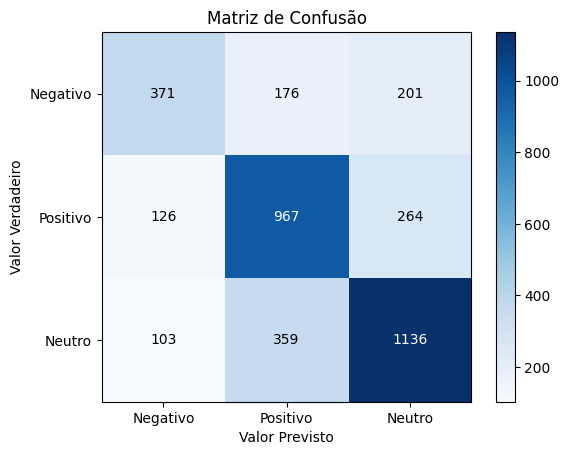

In [156]:
# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plot da matriz de confusão
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Configurações do gráfico
classes = ['Negativo', 'Positivo', 'Neutro']
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       title='Matriz de Confusão',
       ylabel='Valor Verdadeiro',
       xlabel='Valor Previsto')

# Adiciona os valores nas células da matriz
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

# Mostra o gráfico
plt.show()

In [231]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, recall_score, accuracy_score
from imblearn.over_sampling import RandomOverSampler

def classification_svm(x, y):
    # Balanceamento dos dados
    df_negative = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 0]
    df_positive = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 1]
    df_neutral = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 2]

    # Realizar oversampling
    ros = RandomOverSampler(random_state=42)
    x_resampled, y_resampled = ros.fit_resample(x, y)

    # Dividir o conjunto de dados em treinamento e teste
    x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)

    # Definir os hiperparâmetros a serem testados
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

    # Criar o modelo SVM
    svm = SVC()

    # Criar o scorer utilizando o recall como métrica
    scorer = make_scorer(recall_score, average='macro')

    # Realizar a busca de grade com validação cruzada
    grid_search = GridSearchCV(svm, param_grid=param_grid, scoring=scorer, cv=5)
    grid_search.fit(x_train, y_train)

    # Melhores hiperparâmetros encontrados
    best_params = grid_search.best_params_
    print("Melhores hiperparâmetros:", best_params)

    # Acessar o valor específico do melhor hiperparâmetro
    best_C = best_params['C']
    print("Melhor valor de C:", best_C)

    # Treinar o modelo SVM utilizando os melhores hiperparâmetros
    modelo_svm = SVC(**best_params)
    modelo_svm.fit(x_train, y_train)

    # Fazer previsões no conjunto de teste
    y_pred = modelo_svm.predict(x_test)

    # Calcular o recall
    recall = recall_score(y_test, y_pred, average='macro')

    # Calcular a acurácia
    accuracy = accuracy_score(y_test, y_pred)

    # Imprimir os resultados
    print("Recall:", recall)
    print("Acurácia:", accuracy)

    return modelo_svm, y_test, y_pred


In [232]:
print("Melhores hiperparâmetros:", best_params)


Melhores hiperparâmetros: {'batch_size': 98, 'learning_rate': 0.001, 'num_epochs': 18, 'num_hidden_units': 109}


### 16.3.1 - Aplicando os Melhores Hiperparâmetros

In [228]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, recall_score
from imblearn.over_sampling import RandomOverSampler

def classification_svm(x, y):
    # Balanceamento dos dados
    df_negative = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 0]
    df_positive = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 1]
    df_neutral = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 2]

    # Realizar oversampling
    ros = RandomOverSampler(random_state=42)
    x_resampled, y_resampled = ros.fit_resample(x, y)

    # Dividir o conjunto de dados em treinamento e teste
    x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)

    # Definir os hiperparâmetros a serem testados
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

    # Criar o modelo SVM
    svm = SVC()

    # Criar o scorer utilizando o recall como métrica
    scorer = make_scorer(recall_score, average='macro')

    # Realizar a busca de grade com validação cruzada
    grid_search = GridSearchCV(svm, param_grid=param_grid, scoring=scorer, cv=5)
    grid_search.fit(x_train, y_train)

    # Melhores hiperparâmetros encontrados
    best_params = grid_search.best_params_
    print("Melhores hiperparâmetros:", best_params)

    # Acessar o valor específico do melhor hiperparâmetro
    best_C = best_params['C']
    print("Melhor valor de C:", best_C)

    # Treinar o modelo SVM utilizando os melhores hiperparâmetros
    modelo_svm = SVC(**best_params)
    modelo_svm.fit(x_train, y_train)

    # Fazer previsões no conjunto de teste
    y_pred = modelo_svm.predict(x_test)

    # Calcular o recall
    recall = recall_score(y_test, y_pred, average='macro')

    # Calcular a porcentagem do recall
    recall_percent = recall * 100

    # Imprimir o resultado do recall em porcentagem
    print("Recall: {:.2f}%".format(recall_percent))

    return modelo_svm, y_test, y_pred

# Chamar a função com os dados balanceados
classification_svm(X, Y)


Melhores hiperparâmetros: {'C': 100}
Melhor valor de C: 100
Recall: 71.26%


(SVC(C=100), array([2, 1, 1, ..., 1, 0, 2]), array([2, 1, 1, ..., 1, 0, 1]))

## SVM - Três categorias com balanceamento

### Teste da Função

In [233]:
# Balanceamento dos dados
df_negativo = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 0]
df_positive = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 1]
df_neutral = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 2]

df_positive_resampled = resample(df_positive, replace=True, n_samples=len(df_negative), random_state=42)
df_neutral_resampled = resample(df_neutral, replace=True, n_samples=len(df_negative), random_state=42)

dfrnn_balanced = pd.concat([df_negative, df_positive_resampled, df_neutral_resampled])

# Definir os arrays x e y
x = np.array(dfrnn_balanced.drop(['Frase', 'sentimento2'], axis=1))
y = np.array(dfrnn_balanced['sentimento2'])

model, y_test, y_pred = classification_svm(x, y)

Melhores hiperparâmetros: {'C': 100}
Melhor valor de C: 100
Recall: 0.7033485637823728
Acurácia: 0.7037852112676056


### Matriz de confusão

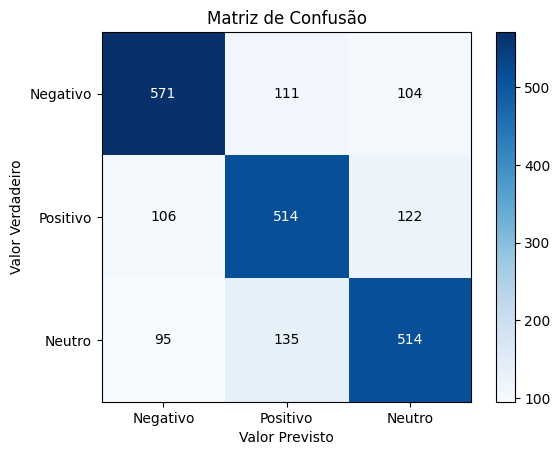

In [230]:
# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plot da matriz de confusão
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Configurações do gráfico
classes = ['Negativo', 'Positivo', 'Neutro']
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       title='Matriz de Confusão',
       ylabel='Valor Verdadeiro',
       xlabel='Valor Previsto')

# Adiciona os valores nas células da matriz
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

# Mostra o gráfico
plt.show()

# Atividade 17 - Modelo Random Florest

Random Forest é um algoritmo de aprendizado de máquina que combina várias árvores de decisão para realizar tarefas de classificação ou regressão. Ele usa aleatoriedade para criar árvores independentes e evitar overfitting, melhorando a precisão e a generalização do modelo. As previsões de cada árvore são combinadas por votação majoritária (classificação) ou média (regressão). O Random Forest é robusto, lida bem com conjuntos de dados grandes e complexos e fornece uma medida de importância das características. 

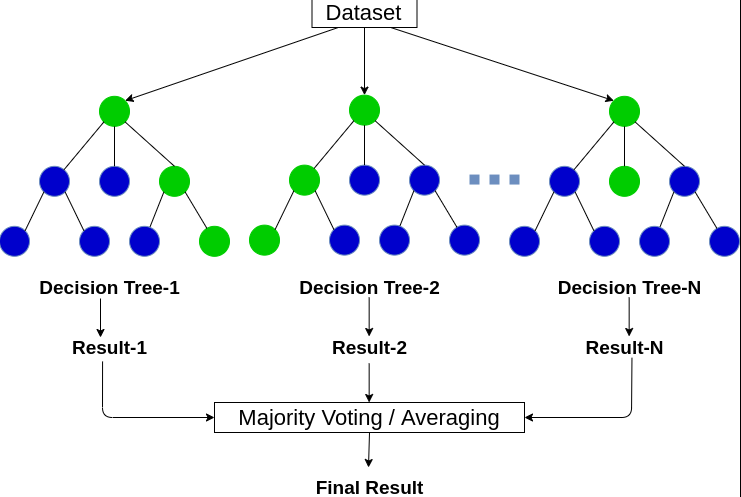

Fonte Imagem: Google Images - Analytics Vidhya

In [162]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
from sklearn.model_selection import cross_val_score, train_test_split
import pandas as pd
import numpy as np

## Definição da função

In [163]:
def classification_random_forest(x, y):
  # Dividir o conjunto de dados em treinamento e teste
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

  # Criar e treinar o modelo Random Forest
  modelo_rf = RandomForestClassifier()
  modelo_rf.fit(x_train, y_train)

  # Fazer previsões no conjunto de teste
  y_pred = modelo_rf.predict(x_test)

  # Calcular a acurácia
  acuracia = accuracy_score(y_test, y_pred)
  print("Acurácia:", acuracia)

  # Calcular o F-score
  fscore = f1_score(y_test, y_pred, average='macro')
  print("F-score:", fscore)

  # Calcular o recall
  recall = recall_score(y_test, y_pred, average='macro')
  print("Recall:", recall)

  # Realizar validação cruzada
  scores = cross_val_score(modelo_rf, x, y, cv=5)  # cv define o número de dobras (folds)
  print("Acurácia da Validação Cruzada:", np.mean(scores))

  return modelo_rf, y_test, y_pred

## Random Florest - Duas categorias com balanceamento

### Definição da função

In [164]:
'''
# Definir os arrays x e y
x = np.array(dfrnn_balanced.drop(['Frase', 'sentimento'], axis=1))
y = np.array(dfrnn_balanced['sentimento'])

# Dividir o conjunto de dados em treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo Random Forest
modelo_rf = RandomForestClassifier()
modelo_rf.fit(x_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = modelo_rf.predict(x_test)
'''

"\n# Definir os arrays x e y\nx = np.array(dfrnn_balanced.drop(['Frase', 'sentimento'], axis=1))\ny = np.array(dfrnn_balanced['sentimento'])\n\n# Dividir o conjunto de dados em treinamento e teste\nx_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)\n\n# Criar e treinar o modelo Random Forest\nmodelo_rf = RandomForestClassifier()\nmodelo_rf.fit(x_train, y_train)\n\n# Fazer previsões no conjunto de teste\ny_pred = modelo_rf.predict(x_test)\n"

### Teste da função

In [165]:
'''
# Calcular a acurácia
acuracia = accuracy_score(y_test, y_pred)
print("Acurácia:", acuracia)

# Calcular o F-score
fscore = f1_score(y_test, y_pred)
print("F-score:", fscore)

# Calcular o recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Realizar validação cruzada
scores = cross_val_score(modelo_rf, x, y, cv=5)  # cv define o número de dobras (folds)
print("Acurácia da Validação Cruzada:", np.mean(scores))
'''

'\n# Calcular a acurácia\nacuracia = accuracy_score(y_test, y_pred)\nprint("Acurácia:", acuracia)\n\n# Calcular o F-score\nfscore = f1_score(y_test, y_pred)\nprint("F-score:", fscore)\n\n# Calcular o recall\nrecall = recall_score(y_test, y_pred)\nprint("Recall:", recall)\n\n# Realizar validação cruzada\nscores = cross_val_score(modelo_rf, x, y, cv=5)  # cv define o número de dobras (folds)\nprint("Acurácia da Validação Cruzada:", np.mean(scores))\n'

### Matriz de confusão

In [166]:
'''
# Cálculo da matriz de confusão
VP = confusion_matrix(y_test, y_pred)[0, 0]
FN = confusion_matrix(y_test, y_pred)[0, 1]
FP = confusion_matrix(y_test, y_pred)[1, 0]
VN = confusion_matrix(y_test, y_pred)[1, 1]

# Criação da matriz de confusão personalizada
custom_cm = np.array([[VP, FN], [FP, VN]])

# Plot da matriz de confusão
plt.figure(figsize=(8, 6))
plt.imshow(custom_cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão da Modelagem de Random Florest')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['POSITIVO', 'NEGATIVO'])
plt.yticks(tick_marks, ['POSITIVO', 'NEGATIVO'])

# Adição dos valores numéricos na matriz
thresh = custom_cm.max() / 2.
for i, j in np.ndindex(custom_cm.shape):
    plt.text(j, i, format(custom_cm[i, j], 'd'), ha='center', va='center',
             color='white' if custom_cm[i, j] > thresh else 'black')

plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()

# Calcular a matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(matriz_confusao)
'''

'\n# Cálculo da matriz de confusão\nVP = confusion_matrix(y_test, y_pred)[0, 0]\nFN = confusion_matrix(y_test, y_pred)[0, 1]\nFP = confusion_matrix(y_test, y_pred)[1, 0]\nVN = confusion_matrix(y_test, y_pred)[1, 1]\n\n# Criação da matriz de confusão personalizada\ncustom_cm = np.array([[VP, FN], [FP, VN]])\n\n# Plot da matriz de confusão\nplt.figure(figsize=(8, 6))\nplt.imshow(custom_cm, interpolation=\'nearest\', cmap=plt.cm.Blues)\nplt.title(\'Matriz de Confusão da Modelagem de Random Florest\')\nplt.colorbar()\ntick_marks = np.arange(2)\nplt.xticks(tick_marks, [\'POSITIVO\', \'NEGATIVO\'])\nplt.yticks(tick_marks, [\'POSITIVO\', \'NEGATIVO\'])\n\n# Adição dos valores numéricos na matriz\nthresh = custom_cm.max() / 2.\nfor i, j in np.ndindex(custom_cm.shape):\n    plt.text(j, i, format(custom_cm[i, j], \'d\'), ha=\'center\', va=\'center\',\n             color=\'white\' if custom_cm[i, j] > thresh else \'black\')\n\nplt.xlabel(\'Previsão\')\nplt.ylabel(\'Valor Real\')\nplt.tight_layout

## Random Florest - Três categorias sem balanceamento

### Teste da função

In [167]:
# Balanceamento dos dados
df_negativo = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 0]
df_positive = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 1]
df_neutral = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 2]

dfrnn_balanced = pd.concat([df_negative, df_positive, df_neutral])

# Definir os arrays x e y
x = np.array(dfrnn_balanced.drop(['Frase', 'sentimento2'], axis=1))
y = np.array(dfrnn_balanced['sentimento2'])

model, y_test, y_pred = classification_random_forest(x, y)

Acurácia: 0.7015933027275182
F-score: 0.6799757973302066
Recall: 0.6764033859232997
Acurácia da Validação Cruzada: 0.6787676097712116


### Matriz de confusão

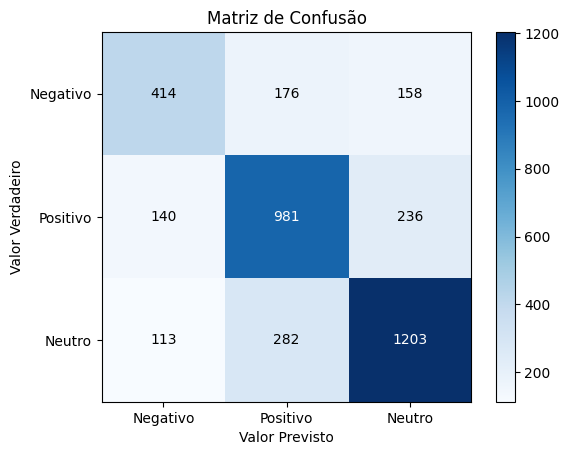

In [168]:
# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plot da matriz de confusão
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Configurações do gráfico
classes = ['Negativo', 'Positivo', 'Neutro']
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       title='Matriz de Confusão',
       ylabel='Valor Verdadeiro',
       xlabel='Valor Previsto')

# Adiciona os valores nas células da matriz
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

# Mostra o gráfico
plt.show()

## Random Florest - Três categorias com balanceamento

### Teste da função

In [169]:
# Balanceamento dos dados
df_negativo = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 0]
df_positive = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 1]
df_neutral = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 2]

df_positive_resampled = resample(df_positive, replace=True, n_samples=len(df_negative), random_state=42)
df_neutral_resampled = resample(df_neutral, replace=True, n_samples=len(df_negative), random_state=42)

dfrnn_balanced = pd.concat([df_negative, df_positive_resampled, df_neutral_resampled])

# Separando os dados em X e y (balanceados)
x = np.array(dfrnn_balanced.drop(['Frase', 'sentimento2'], axis=1))
y = np.array(dfrnn_balanced['sentimento2'])

model, y_test, y_pred = classification_random_forest(x, y)

Acurácia: 0.7693661971830986
F-score: 0.7692803661421541
Recall: 0.7690388079983309
Acurácia da Validação Cruzada: 0.7515850739631427


### Matriz de confusão

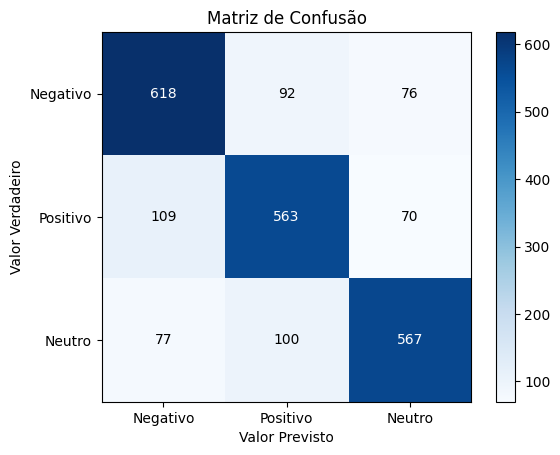

In [170]:
# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plot da matriz de confusão
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Configurações do gráfico
classes = ['Negativo', 'Positivo', 'Neutro']
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       title='Matriz de Confusão',
       ylabel='Valor Verdadeiro',
       xlabel='Valor Previsto')

# Adiciona os valores nas células da matriz
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

# Mostra o gráfico
plt.show()

# Atividade 18 - Vetorização TF-IDF (Regressão Logística) 

Um modelo NLP de Regressão Logística com vetorização TF-IDF é um algoritmo de aprendizado de máquina usado para classificar ou prever textos com base em suas características. A vetorização TF-IDF converte os textos em vetores numéricos, atribuindo valores que representam a importância dos termos em relação aos documentos. A Regressão Logística é aplicada a esses vetores para aprender a relação entre as características e a variável de destino. Essa abordagem é comumente usada em tarefas como análise de sentimentos e categorização de documentos.

logistic-regression-diagram.svg

## Regressão Logística - Três categorias sem balanceamento

In [171]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### Definição da função

In [172]:
df_negativo = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 0]
df_positive = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 1]
df_neutral = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 2]

dfrnn_balanced = pd.concat([df_negativo, df_positive, df_neutral])

textFinal = base_tratada['texto_processado'].iloc[:12343]
textFinal2 = textFinal.astype(str).values

tipoInteracaoFinal = base_tratada['tipoInteracao'].iloc[:12343]
tipoInteracaoFinal2 = tipoInteracaoFinal.astype(str).values

# Dividir os dados em conjunto de treinamento e teste
X_text = textFinal2
X_type = tipoInteracaoFinal2
X_combined = [text + ' ' + type for text, type in zip(X_text, X_type)]

selected_data = dfrnn_balanced['sentimento2'].iloc[:12343]
# y = base_tratada['sentimento2'].astype(str).values
y = np.array(selected_data)

X_combined_train, X_combined_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=42)

# Criar o vetor TF-IDF
vectorizer = TfidfVectorizer()
X_combined_train_tfidf = vectorizer.fit_transform(X_combined_train)
X_combined_test_tfidf = vectorizer.transform(X_combined_test)

# Treinar um modelo (Regressão Logística com os hiperparâmetros definidos)
model = LogisticRegression(solver='liblinear', penalty='l2', C=10)
model.fit(X_combined_train_tfidf, y_train)

LogisticRegression(C=10, solver='liblinear')

### Teste da Função

In [173]:
# Fazer previsões e avaliar o modelo
y_pred = model.predict(X_combined_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)
recall = recall_score(y_test, y_pred, average='weighted')
print("Revocação do modelo:", recall)
# Calcular o F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score do modelo:", f1)

Acurácia do modelo: 0.5916824196597353
Revocação do modelo: 0.5916824196597353
F1-score do modelo: 0.5863436091168602


### Matriz de Confusão

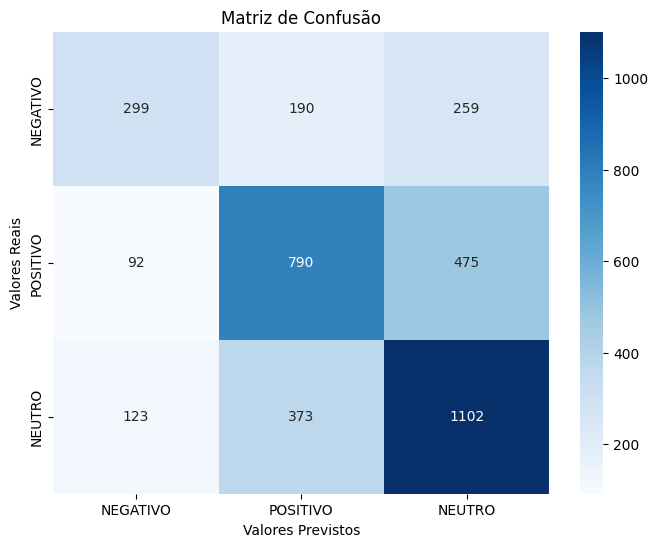

In [174]:
# Calcular a matriz de confusão
confusion = confusion_matrix(y_test, y_pred)

# Criar um DataFrame para exibir a matriz de confusão
confusion_df = pd.DataFrame(confusion, index=['NEGATIVO', 'POSITIVO', 'NEUTRO'], columns=['NEGATIVO', 'POSITIVO', 'NEUTRO'])

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão")
plt.xlabel("Valores Previstos")
plt.ylabel("Valores Reais")
plt.show()

# Atividade 19: Comparação Bow e Word2Vec - Memória

O modelo BOW tende a ocupar mais memória em comparação ao Word2Vec, 542.02MB e 1.59MB, respectivamente. Isso ocorre porque o BOW cria um vetor numérico para cada palavra única presente no texto, resultando em uma alta dimensionalidade dos dados. Cada palavra é representada por uma coluna separada no arquivo.csv gerado, o que resulta em um consumo maior de recursos computacionais. 

In [175]:

# import pandas as pd

# resultados_bow = pd.read_csv('/content/drive/MyDrive/PROJETO BTG/resultados_bow.csv')
# resultados_Word2Vec = pd.read_csv('/content/drive/MyDrive/PROJETO BTG/sentence_vectors.csv')

# consumo_memoria_bow = resultados_bow.memory_usage().sum() / (1024 ** 2)  # Consumo de memória em megabytes
# consumo_memoria_Word2Vec = resultados_Word2Vec.memory_usage().sum() / (1024 ** 2)  # Consumo de memória em megabytes

# print("Consumo de memória do BoW:", consumo_memoria_bow, "MB")
# print("Consumo de memória do Word2Vec:", consumo_memoria_Word2Vec, "MB")


# Atividade 20: Comparação BoW e Word2Vec - Tamanho matrizes

o Word2Vec mantém uma dimensão consistente para todas as frases (52 colunas, já com acréscimo da variável-alvo e das frases utilizadas),
independentemente do tamanho delas. Isso significa que o arquivo.csv gerado pelo
Word2Vec terá uma estrutura mais padronizada, facilitando o processamento e a análise
dos dados. Em contraste, o BOW pode resultar uma quantidade variável de colunas
(Atualmente conta com 18582, já com acréscimo da variável-alvo e das frases utilizadas),
tornando o processamento mais complexo e exigindo etapas adicionais de pré-processamento dos dados

In [176]:
# import csv

# dfBowmodelo = '/content/drive/MyDrive/PROJETO BTG/resultados_bow.csv'

# with open(dfBowmodelo, mode='r') as file:
#     reader = csv.reader(file)
#     primeira_linha = next(reader)
#     num_colunas = len(primeira_linha)

# print(f"Número de colunas: {num_colunas}")

In [177]:
# dfW2Vmodelo = pd.read_csv('/content/drive/MyDrive/PROJETO BTG/sentence_vectors.csv')

# num_colunas = dfW2Vmodelo.shape[1]

# print(f"Número de colunas: {num_colunas}")

# Atividade 21 - Explicação das métricas e justificativa do modelo

## **18.1 Bag Of Words Ou Word2Vec**



Considerando os fatores de consumo de memória e estrutura do arquivo.csv gerado, o modelo Word2Vec mostra-se mais vantajoso em relação ao BOW. Ele consome menos memória e mantém uma dimensão consistente, facilitando o
processamento e a análise dos dados, até então.

## **18.2 Métricas** 

Apresenta-se as métricas utilizadas para comparação dos modelos

### **18.2.1 Matriz de Confusão**

Pode-se definir matriz de confusão como, uma tabela que representa a frequência
de classificação para as variáveis declaradas no modelo. O uso dessa ferramenta de
avaliação é de grande importância pois é possível realizar a análise de como o modelo se
saiu nas previsões, verificando erros e acertos do modelo preditivo. 

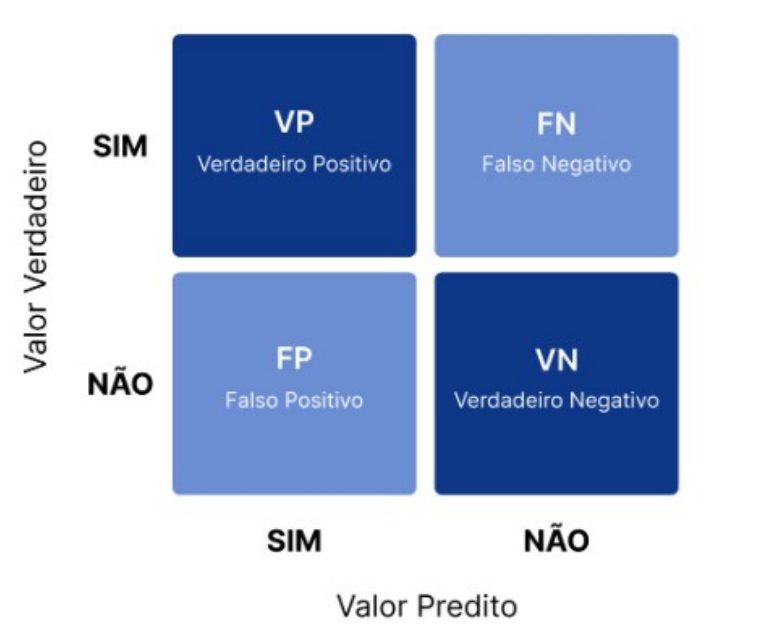

Pode-se considerar para a construção do modelo, baseando-se na variável alvo, a
possibilidade de um comentário ser negativo ou positivo, os quadrantes apresentados
acima possuem tais significados: 
1. Verdadeiro Positivo: Comentários negativos que são classificados como negativos;
2. Falso Positivo: Comentários positivos que são classificados como negativos;
3. Falso Negativo: Comentários negativos que são classificados como positivos;
4. Verdadeiro Negativo: Comentários positivos que são classificados como positivos;


Para o modelo criado, o quadrante mais importante de obter um alto índice de
acerto, é o falso negativo. Ao focar no quadrante do falso negativo e buscar minimizá-lo, o
objetivo é garantir que o modelo seja capaz de identificar corretamente todos os
comentários negativos. Isso permite que a empresa esteja ciente dos problemas e
insatisfações dos clientes.

Referências : "Entendendo o que é matriz de confusão com Python" - Data Hackers. Disponível em: https://medium.com/data-hackers/entendendo-o-que-%C3%A9-matriz-de-confus%C3%A3o-com-python-114e683ec509. Acesso em 22 maio 2023.

### **18.2.2 Acurácia**

A acurácia diz respeito à proximidade entre o valor obtido experimentalmente e o
valor verdadeiro. A importância dessa estratégia de avaliação se dá pelo fato de
determinar a confiabilidade e grau de exatidão do modelo. É calculado como:
TP+TN/(TP+TN+FP+FN).


Se a acurácia for alta: Isso indica que o modelo está classificando a maioria dos
exemplos corretamente, o que é um bom sinal. Uma alta acurácia pode sugerir que o
modelo é capaz de fazer previsões precisas e confiáveis.


Se a acurácia for baixa: Isso pode indicar que o modelo está tendo dificuldades em
classificar corretamente os exemplos. Nesse caso, é necessário investigar e analisar
outras métricas, como o recall e a precisão, para entender melhor o desempenho do
modelo e identificar possíveis áreas de melhoria.


Se a acurácia estiver em um meio termo: Nesse caso, é importante considerar o
contexto do problema e o equilíbrio entre as classes de sentimentos. Se houver um
desequilíbrio significativo nas classes, a acurácia pode ser enganosa. Portanto, é
recomendado avaliar outras métricas, como o recall e a precisão, para obter uma visão
mais abrangente do desempenho do modelo.

Referências : "Conheça e saiba como aplicar a acurácia" - ClearSale. Disponível em: https://blogbr.clear.sale/conheca-e-saiba-como-aplicar-a-acuracia. Acesso em 22 maio 2023.

# Atividade 22 - Arquitetura Macro

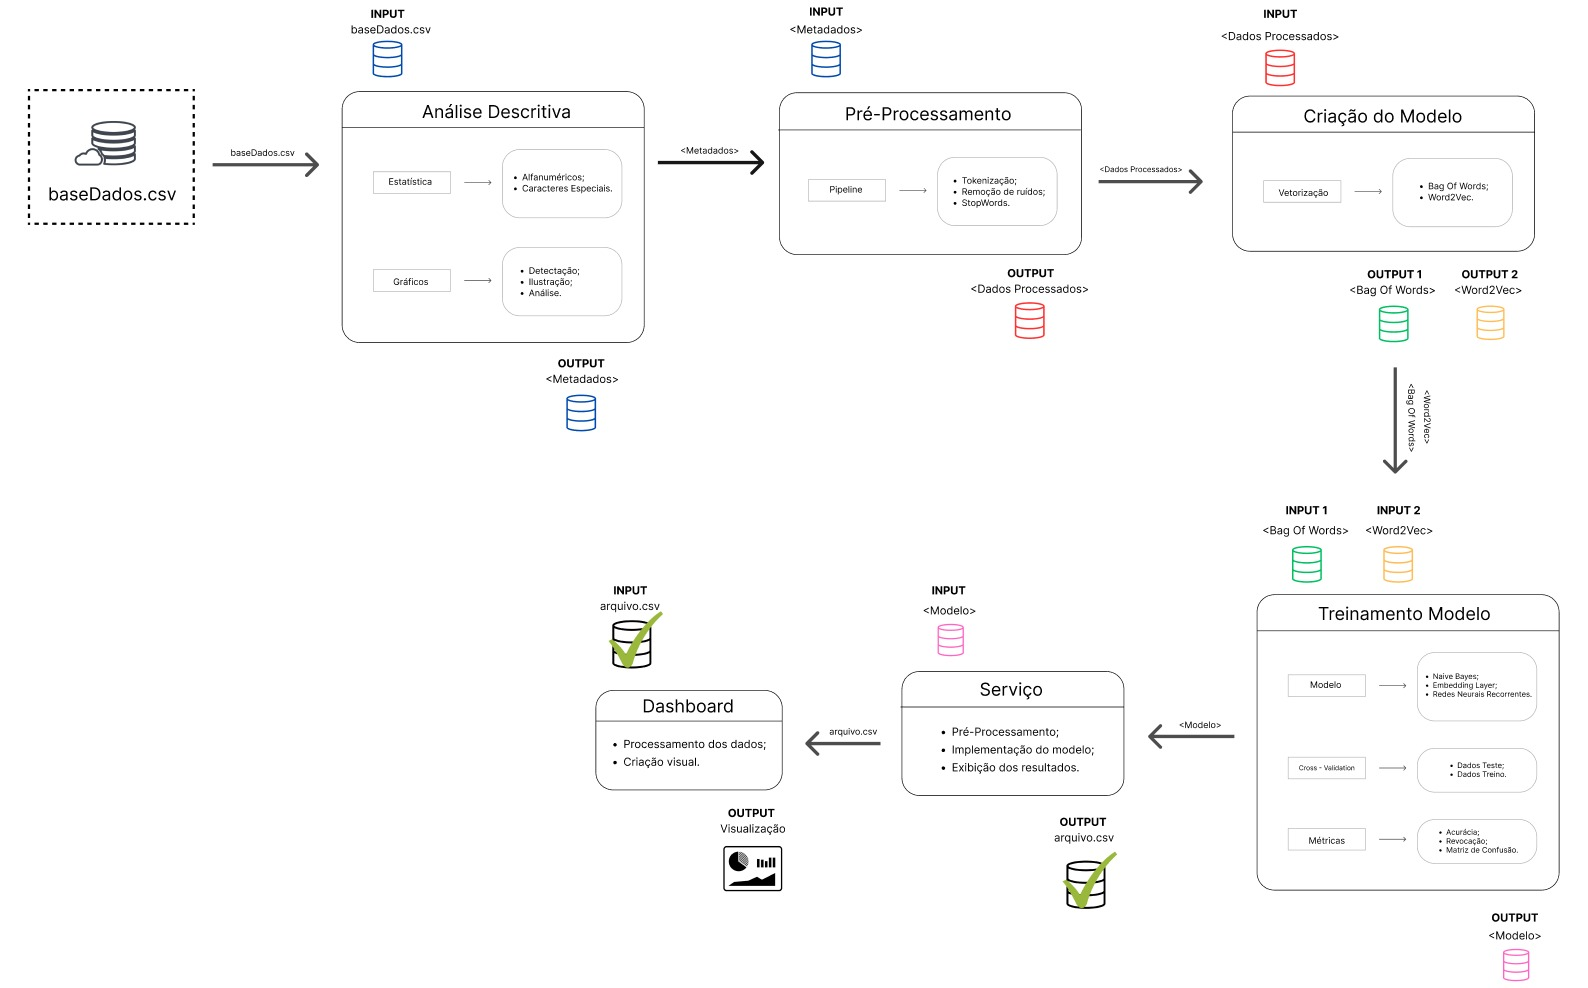

# Atividade 23 - Aplicação de novas features.

No projeto foram utilizadas as seguintes features: "sentimento" e "frase". Porém neste momento são aplicados novas features ao projeto para testa-lás, sendo elas as colunas "comentário", "marcação" e "resposta", todas elas são provenientes da coluna "tipoInteração" que após a aplicação do método one hot encoding formou as 3 novas features.


## 23.1.Base tratada + one hot encodign na coluna tipoInteração
Abaixo será feito o One hot encoding da coluna "tipoInteração". Nela existem as seguintes classes: comentário, marcação e resposta, após o uso do one hot encoding cada classe será transformada em uma nova coluna.
O método one-hot é uma técnica para representar variáveis categóricas como vetores binários, onde 1 representa a presença da categoria e 0 representa a ausência. A biblioteca pandas em Python oferece a função get_dummies() para realizar essa codificação.


### 23.1.1.Teste isolado 

In [178]:
# Criando um dataframe para o teste
teste_onehot = pd.DataFrame({'tipoInteracao': ['comentário', 'marcação', 'resposta', 'marcação', 'comentário']})
#definindo a função
def teste_one_hot_encoding(df, column):
    one_hot = pd.get_dummies(df[column])
    df = df.drop(column, axis=1)
    df = pd.concat([df, one_hot], axis=1)
    return df
# Aplicação da função
novas_colunas = teste_one_hot_encoding(teste_onehot, 'tipoInteracao')

# Imprimir o dataframe original
print("Dataframe Original:")
print(teste_onehot)

# Imprimir o dataframe codificado com one-hot encoding
print("one hot encoding:")
print(novas_colunas)

Dataframe Original:
  tipoInteracao
0    comentário
1      marcação
2      resposta
3      marcação
4    comentário
one hot encoding:
   comentário  marcação  resposta
0           1         0         0
1           0         1         0
2           0         0         1
3           0         1         0
4           1         0         0


### 23.1.2.Teste da função

In [179]:
def one_hot_encoding(df, column):
    one_hot = pd.get_dummies(df[column])
    df = df.drop(column, axis=1)
    df = pd.concat([df, one_hot], axis=1)
    return df


### 23.1.3.Aplicação da função

In [180]:
one_hot_dados = one_hot_encoding(dados, 'tipoInteracao')
print(one_hot_dados)

                  autor                                              texto  \
0            v8_capital  Confira os resultados dos nossos fundos no mês...   
1         winthegame_of  A Alvarez & Marsal estará conosco no Sportainm...   
2            marta_bego  #Repost btgpactual with make_repost ・・・ Entend...   
3            lmviapiana                               Minuto touro de ouro   
4          vanilson_dos                                   @ricktolledo Sim   
...                 ...                                                ...   
12350       onixcapital  Uma noite de encontros e muito conhecimento on...   
12351  amgcapitalinvest  Erros financeiros para eliminar antes dos 30 a...   
12352     jayipacderota  Estou muito grato por todo o esforço que você ...   
12353   moinho_cultural  "👉GUADAKAN está chegando!!!!  A aula pública e...   
12354         bfmarilia  @btgpactual pq o morning call não está mais ap...   

      sentimento  sentimento2  sentimentoNumerico  comentário  

### 23.1.4.Criando dataframe com one hot encoding + Word2Vec

In [181]:
# Criando o novo dataframe com as mesmas colunas do dfW2V
dfoneHot = pd.DataFrame(dfW2Vmodelo2)

dfoneHot['resposta'] = one_hot_dados['resposta']
dfoneHot['comentário'] = one_hot_dados['comentário']
dfoneHot['marcação'] = one_hot_dados['marcação']

# Especificando o diretório de destino para salvar o arquivo CSV
diretorio_destino = '/content/drive/MyDrive/PROJETO BTG/'

# Salvando o novo dataframe em um arquivo CSV no diretório especificado
caminho_arquivo_csv = diretorio_destino + 'oneHot.csv'
dfoneHot.to_csv(caminho_arquivo_csv, index=False)

print("Arquivo 'oneHot.csv' salvo com sucesso em:", caminho_arquivo_csv)

Arquivo 'oneHot.csv' salvo com sucesso em: /content/drive/MyDrive/PROJETO BTG/oneHot.csv


In [182]:
dfoneHot

,Frase,Vetor1,Vetor2,Vetor3,Vetor4,Vetor5,Vetor6,Vetor7,Vetor8,Vetor9,...,Vetor45,Vetor46,Vetor47,Vetor48,Vetor49,Vetor50,sentimento2,resposta,comentário,marcação
0,"['confira', 'resultados', 'fundos', 'mes', 'fe...",0.047561,0.461095,-0.029338,0.010966,0.185443,-0.393010,0.417207,0.890800,-0.384188,...,0.066039,-0.230054,-0.016055,-0.190021,0.111957,0.477451,2,0,0,1
1,"['alvarez', 'marsal', 'estara', 'conosco', 'sp...",-0.046540,0.865099,-0.009963,-0.039450,0.047521,-0.257913,0.031408,1.638585,-0.451548,...,-0.274552,-0.982768,-0.327764,0.055479,0.128113,0.841586,2,0,0,1
2,"['repost', 'btgpactual', 'with', 'make_repost'...",-0.037251,0.524934,-0.016734,0.128232,0.223776,-0.192939,0.241767,1.060557,-0.372145,...,-0.065465,-0.415724,-0.329036,-0.006099,0.118843,0.627968,2,0,0,1
3,"['minuto', 'touro', 'ouro']",0.012351,0.196380,0.028059,0.085660,0.085542,-0.212654,0.043820,0.447959,-0.127633,...,-0.069223,-0.172031,-0.056093,-0.144076,0.087783,0.267417,1,0,1,0
4,"['ricktolledo', 'sim']",0.061391,0.430412,0.134085,0.091213,0.404610,-0.233568,0.271374,0.502941,-0.148360,...,0.142355,-0.209132,-0.312073,-0.148774,-0.059577,0.353995,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12338,"['noite', 'encontros', 'conhecimento', 'onde',...",0.055420,0.826695,0.209593,0.001005,0.306056,-0.150690,0.290345,1.032618,-0.260759,...,-0.087490,-0.603674,-0.447010,-0.001385,0.026597,0.552893,2,1,0,0
12339,"['erros', 'financeiros', 'eliminar', 'antes', ...",0.063224,0.861106,0.227799,0.225054,0.773948,-1.053440,0.463498,1.711031,-0.541080,...,-0.033491,-0.549110,-0.325423,-0.701217,0.206417,1.070475,2,0,1,0
12340,"['grato', 'todo', 'esforco', 'voce', 'rendeu',...",0.203192,0.685742,0.297974,0.342341,0.396451,-0.148272,0.475679,0.845039,-0.344753,...,0.293998,-0.438161,-0.488934,-0.429989,-0.128067,0.740762,1,0,1,0
12341,"['guadakan', 'chegando', 'aula', 'publica', 'f...",0.048688,0.465281,0.140938,0.114753,0.180102,-0.231896,0.168440,0.696658,-0.153203,...,-0.046567,-0.346192,-0.237245,-0.153042,0.048980,0.395580,2,0,1,0


## 23.2.Aplicação das novas features nos modelos 

### 23.2.1 RNN - Três categorias e sem balanceamento

#### 23.2.2 - Teste da Função

In [183]:
def classification_rnn(X_test, y_test):
  # Divisão em conjunto de treinamento e teste
  X_train, X_test, y_train, y_test = train_test_split(X_test, y_test, test_size=0.3, random_state=42)

  # Remodelar os dados de entrada
  X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

  # Definindo o modelo
  model = Sequential()
  model.add(LSTM(units=128, input_shape=(1, X_test.shape[2])))
  model.add(Dense(units=3, activation='softmax'))

  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  # Treinar o modelo
  model.fit(X_test, y_test, epochs=10, batch_size=32)

  # Avaliar a precisão do modelo
  _, accuracy = model.evaluate(X_test, y_test)
  print('Acurácia: %.2f%%' % (accuracy * 100))

  # Fazer previsões no conjunto de teste
  y_pred_prob = model.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)

  # Calcular o recall
  recall = recall_score(y_test, y_pred, average='macro')
  print('Recall: %.2f%%' % (recall* 100))

  return model, y_test, y_pred

**USANDO TRÊS CATEGORIAS SEM BALANCEAMENTO DE DADOS**

In [184]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from sklearn.metrics import recall_score

In [185]:
# Balanceamento dos dados
df_negative = dfoneHot[dfoneHot['sentimento2'] == 0]
df_positive = dfoneHot[dfoneHot['sentimento2'] == 1]
df_neutral = dfoneHot[dfoneHot['sentimento2'] == 2]

dfrnn_balanced = pd.concat([df_positive, df_negative, df_neutral])

# Separando os dados de teste em X_test e y_test (balanceados)
X_test = np.array(dfrnn_balanced.drop(['Frase', 'sentimento2', 'comentário', 'resposta', 'marcação'], axis=1))
y_test = np.array(dfrnn_balanced['sentimento2'])

model, y_test, y_pred = classification_rnn(X_test, y_test)

Epoch 1/10
116/116 [==============================] - 3s 5ms/step - loss: 0.9677 - accuracy: 0.5725
Epoch 2/10
116/116 [==============================] - 1s 5ms/step - loss: 0.8677 - accuracy: 0.6287
Epoch 3/10
116/116 [==============================] - 1s 6ms/step - loss: 0.8292 - accuracy: 0.6352
Epoch 4/10
116/116 [==============================] - 1s 5ms/step - loss: 0.8046 - accuracy: 0.6460
Epoch 5/10
116/116 [==============================] - 1s 5ms/step - loss: 0.7915 - accuracy: 0.6497
Epoch 6/10
116/116 [==============================] - 1s 4ms/step - loss: 0.7816 - accuracy: 0.6565
Epoch 7/10
116/116 [==============================] - 1s 5ms/step - loss: 0.7746 - accuracy: 0.6605
Epoch 8/10
116/116 [==============================] - 1s 5ms/step - loss: 0.7697 - accuracy: 0.6614
Epoch 9/10
116/116 [==============================] - 1s 5ms/step - loss: 0.7668 - accuracy: 0.6608
Epoch 10/10
116/116 [==============================] - 1s 4ms/step - loss: 0.7589 - accuracy: 0.6616

#### 23.2.3 - Visualização da Matriz de Confusão de Redes Neurais Recorrentes (RNN)

**USANDO TRÊS CATEGORIAS SEM BALANCEAMENTO DE DADOS - MATRIZ DE CONFUSÃO**

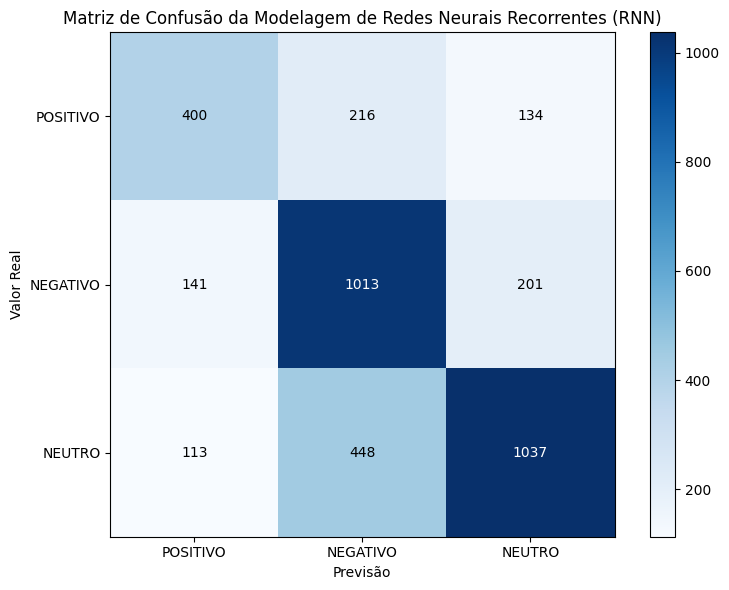

In [186]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Previsões no conjunto de teste
y_test = y_test.astype(int)
y_pred = y_pred.astype(int)

# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Definição dos rótulos das classes
class_labels = ['POSITIVO', 'NEGATIVO', 'NEUTRO']

# Plot da matriz de confusão
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão da Modelagem de Redes Neurais Recorrentes (RNN)')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# Adição dos valores numéricos na matriz
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'), ha='center', va='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()

#### 23.2.4 - Hiperparâmetros com Random Search do RNN

In [187]:
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scipy.stats import randint as sp_randint
from sklearn.metrics import recall_score
import tensorflow as tf

# Dados de entrada e rótulos
X_data = np.array(dfrnn_balanced.drop(['Frase', 'sentimento2', 'comentário', 'resposta', 'marcação'], axis=1))
Y_labels = np.array(dfrnn_balanced['sentimento2'])

# Divisão em conjunto de treinamento e teste
X_train, X_val, y_train, y_val = train_test_split(X_data, Y_labels, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Normalização dos dados
X_train_mean = X_train.mean(axis=0)
X_train_std = X_train.std(axis=0)
X_train = (X_train - X_train_mean) / X_train_std
X_val = (X_val - X_train_mean) / X_train_std
X_data = (X_data - X_train_mean) / X_train_std

# Função para criar o modelo RNN
def create_model(num_epochs, batch_size, learning_rate, num_hidden_units):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(units=num_hidden_units, activation='relu'),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])

    model.compile(optimizer=tf.optimizers.Adam(learning_rate=learning_rate),
                  loss=tf.losses.BinaryCrossentropy(),
                  metrics=[tf.metrics.BinaryAccuracy()])

    model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size,
              validation_data=(X_val, y_val))

    y_pred = model.predict(X_data)
    y_pred = np.round(y_pred).flatten()

    recall = recall_score(Y_labels, y_pred, average='macro')
    print('Recall:', recall)

    return model

# Definir a distribuição de valores para cada hiperparâmetro
param_dist = {
    'num_epochs': sp_randint(10, 31),  # Intervalo entre 10 e 30
    'batch_size': sp_randint(32, 129),  # Intervalo entre 32 e 128
    'learning_rate': [0.001, 0.01, 0.1],  # Valores fixos
    'num_hidden_units': sp_randint(64, 257)  # Intervalo entre 64 e 256
}

# Criação do KerasClassifier com a função create_model
keras_classifier = KerasClassifier(build_fn=create_model)

# Realizar a busca aleatória
random_search = RandomizedSearchCV(estimator=keras_classifier, param_distributions=param_dist,
                                   n_iter=10, cv=3, scoring='recall_macro', refit=False, error_score='raise')

random_result = random_search.fit(X_data, Y_labels)

# Obter os resultados da busca aleatória
results = random_result.cv_results_
best_params_idx = results['rank_test_score'].argmin()
best_params = results['params'][best_params_idx]
best_recall = results['mean_test_score'][best_params_idx]

print('Melhores hiperparâmetros:', best_params)
print('Melhor Recall:', best_recall)


Epoch 1/15


<ipython-input-187-0d6bff0f50cd>:55: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_classifier = KerasClassifier(build_fn=create_model)


61/61 [==============================] - 1s 6ms/step - loss: -0.8081 - binary_accuracy: 0.3367 - val_loss: -2.7174 - val_binary_accuracy: 0.3785
Epoch 2/15
61/61 [==============================] - 0s 3ms/step - loss: -5.5183 - binary_accuracy: 0.3845 - val_loss: -9.4687 - val_binary_accuracy: 0.3889
Epoch 3/15
61/61 [==============================] - 0s 4ms/step - loss: -15.0098 - binary_accuracy: 0.3838 - val_loss: -22.4499 - val_binary_accuracy: 0.3970
Epoch 4/15
61/61 [==============================] - 0s 3ms/step - loss: -31.3561 - binary_accuracy: 0.3900 - val_loss: -42.5941 - val_binary_accuracy: 0.3958
Epoch 5/15
61/61 [==============================] - 0s 3ms/step - loss: -55.0001 - binary_accuracy: 0.3924 - val_loss: -69.6283 - val_binary_accuracy: 0.3981
Epoch 6/15
61/61 [==============================] - 0s 3ms/step - loss: -85.2011 - binary_accuracy: 0.3947 - val_loss: -103.2471 - val_binary_accuracy: 0.3958
Epoch 7/15
61/61 [==============================] - 0s 3ms/step - 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


61/61 [==============================] - 1s 6ms/step - loss: -1.5243 - binary_accuracy: 0.3743 - val_loss: -3.7184 - val_binary_accuracy: 0.3831
Epoch 2/15
61/61 [==============================] - 0s 3ms/step - loss: -6.9041 - binary_accuracy: 0.3809 - val_loss: -11.1296 - val_binary_accuracy: 0.3918
Epoch 3/15
61/61 [==============================] - 0s 3ms/step - loss: -17.0869 - binary_accuracy: 0.3883 - val_loss: -24.3568 - val_binary_accuracy: 0.3958
Epoch 4/15
61/61 [==============================] - 0s 3ms/step - loss: -33.5067 - binary_accuracy: 0.3924 - val_loss: -44.0517 - val_binary_accuracy: 0.3970
Epoch 5/15
61/61 [==============================] - 0s 3ms/step - loss: -56.5921 - binary_accuracy: 0.3934 - val_loss: -70.4141 - val_binary_accuracy: 0.3924
Epoch 6/15
61/61 [==============================] - 0s 3ms/step - loss: -86.6814 - binary_accuracy: 0.3832 - val_loss: -103.9324 - val_binary_accuracy: 0.3831
Epoch 7/15
61/61 [==============================] - 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


216/216 [==============================] - 1s 3ms/step - loss: -92350.8516 - binary_accuracy: 0.3757 - val_loss: -313534.7812 - val_binary_accuracy: 0.3843
Epoch 2/15
216/216 [==============================] - 0s 2ms/step - loss: -795138.1250 - binary_accuracy: 0.3740 - val_loss: -1422802.2500 - val_binary_accuracy: 0.3791
Epoch 3/15
216/216 [==============================] - 1s 2ms/step - loss: -2266286.5000 - binary_accuracy: 0.3749 - val_loss: -3246319.5000 - val_binary_accuracy: 0.3669
Epoch 4/15
216/216 [==============================] - 0s 2ms/step - loss: -4408029.5000 - binary_accuracy: 0.3760 - val_loss: -5726924.0000 - val_binary_accuracy: 0.3877
Epoch 5/15
216/216 [==============================] - 0s 2ms/step - loss: -7181593.0000 - binary_accuracy: 0.3779 - val_loss: -8803554.0000 - val_binary_accuracy: 0.3744
Epoch 6/15
216/216 [==============================] - 0s 2ms/step - loss: -10544396.0000 - binary_accuracy: 0.3788 - val_loss: -12490441.0000 - val_binary_accuracy: 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


216/216 [==============================] - 1s 3ms/step - loss: -89042.6641 - binary_accuracy: 0.3623 - val_loss: -288509.5938 - val_binary_accuracy: 0.3628
Epoch 2/15
216/216 [==============================] - 0s 2ms/step - loss: -733257.6250 - binary_accuracy: 0.3623 - val_loss: -1276004.6250 - val_binary_accuracy: 0.3628
Epoch 3/15
216/216 [==============================] - 0s 2ms/step - loss: -2082817.5000 - binary_accuracy: 0.3623 - val_loss: -2941792.2500 - val_binary_accuracy: 0.3628
Epoch 4/15
216/216 [==============================] - 1s 2ms/step - loss: -4068766.2500 - binary_accuracy: 0.3623 - val_loss: -5176749.5000 - val_binary_accuracy: 0.3628
Epoch 5/15
216/216 [==============================] - 0s 2ms/step - loss: -6621667.0000 - binary_accuracy: 0.3623 - val_loss: -7984198.0000 - val_binary_accuracy: 0.3628
Epoch 6/15
216/216 [==============================] - 0s 2ms/step - loss: -9707992.0000 - binary_accuracy: 0.3623 - val_loss: -11263474.0000 - val_binary_accuracy: 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


136/136 [==============================] - 2s 6ms/step - loss: -8.2312 - binary_accuracy: 0.3766 - val_loss: -24.0275 - val_binary_accuracy: 0.3924
Epoch 2/16
136/136 [==============================] - 1s 4ms/step - loss: -59.4472 - binary_accuracy: 0.3892 - val_loss: -106.2796 - val_binary_accuracy: 0.4028
Epoch 3/16
136/136 [==============================] - 0s 3ms/step - loss: -173.3907 - binary_accuracy: 0.3925 - val_loss: -253.4523 - val_binary_accuracy: 0.3895
Epoch 4/16
136/136 [==============================] - 0s 4ms/step - loss: -354.5527 - binary_accuracy: 0.3882 - val_loss: -466.8501 - val_binary_accuracy: 0.3906
Epoch 5/16
136/136 [==============================] - 0s 3ms/step - loss: -604.7014 - binary_accuracy: 0.3832 - val_loss: -745.3931 - val_binary_accuracy: 0.3929
Epoch 6/16
136/136 [==============================] - 0s 3ms/step - loss: -915.5933 - binary_accuracy: 0.3845 - val_loss: -1085.8015 - val_binary_accuracy: 0.3906
Epoch 7/16
136/136 [======================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


136/136 [==============================] - 1s 4ms/step - loss: -10.4760 - binary_accuracy: 0.3792 - val_loss: -29.3950 - val_binary_accuracy: 0.4010
Epoch 2/16
136/136 [==============================] - 0s 2ms/step - loss: -70.5422 - binary_accuracy: 0.3902 - val_loss: -125.0503 - val_binary_accuracy: 0.3924
Epoch 3/16
136/136 [==============================] - 0s 2ms/step - loss: -203.9525 - binary_accuracy: 0.3922 - val_loss: -296.9520 - val_binary_accuracy: 0.3987
Epoch 4/16
136/136 [==============================] - 0s 2ms/step - loss: -413.3789 - binary_accuracy: 0.3903 - val_loss: -541.9891 - val_binary_accuracy: 0.3895
Epoch 5/16
136/136 [==============================] - 0s 2ms/step - loss: -694.2827 - binary_accuracy: 0.3835 - val_loss: -858.6517 - val_binary_accuracy: 0.3872
Epoch 6/16
136/136 [==============================] - 0s 2ms/step - loss: -1047.3893 - binary_accuracy: 0.3827 - val_loss: -1244.1014 - val_binary_accuracy: 0.3843
Epoch 7/16
136/136 [====================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


118/118 [==============================] - 1s 4ms/step - loss: -6.8686 - binary_accuracy: 0.3751 - val_loss: -19.9097 - val_binary_accuracy: 0.3900
Epoch 2/13
118/118 [==============================] - 0s 3ms/step - loss: -48.5155 - binary_accuracy: 0.3893 - val_loss: -87.0228 - val_binary_accuracy: 0.3941
Epoch 3/13
118/118 [==============================] - 0s 2ms/step - loss: -144.5668 - binary_accuracy: 0.3887 - val_loss: -212.1064 - val_binary_accuracy: 0.3900
Epoch 4/13
118/118 [==============================] - 0s 3ms/step - loss: -302.8675 - binary_accuracy: 0.3900 - val_loss: -399.0078 - val_binary_accuracy: 0.3906
Epoch 5/13
118/118 [==============================] - 0s 3ms/step - loss: -523.8121 - binary_accuracy: 0.3934 - val_loss: -647.4078 - val_binary_accuracy: 0.3924
Epoch 6/13
118/118 [==============================] - 0s 3ms/step - loss: -802.0026 - binary_accuracy: 0.3902 - val_loss: -950.5501 - val_binary_accuracy: 0.3900
Epoch 7/13
118/118 [========================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


118/118 [==============================] - 1s 4ms/step - loss: -6.5512 - binary_accuracy: 0.3670 - val_loss: -19.4214 - val_binary_accuracy: 0.3837
Epoch 2/13
118/118 [==============================] - 0s 3ms/step - loss: -47.0612 - binary_accuracy: 0.3915 - val_loss: -86.3008 - val_binary_accuracy: 0.4022
Epoch 3/13
118/118 [==============================] - 0s 3ms/step - loss: -140.7101 - binary_accuracy: 0.3950 - val_loss: -209.7925 - val_binary_accuracy: 0.3935
Epoch 4/13
118/118 [==============================] - 0s 3ms/step - loss: -293.0847 - binary_accuracy: 0.3879 - val_loss: -392.0851 - val_binary_accuracy: 0.3900
Epoch 5/13
118/118 [==============================] - 0s 3ms/step - loss: -506.7399 - binary_accuracy: 0.3860 - val_loss: -636.7575 - val_binary_accuracy: 0.3947
Epoch 6/13
118/118 [==============================] - 0s 3ms/step - loss: -780.4294 - binary_accuracy: 0.3848 - val_loss: -935.9692 - val_binary_accuracy: 0.3854
Epoch 7/13
118/118 [========================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


71/71 [==============================] - 1s 6ms/step - loss: -2.2149 - binary_accuracy: 0.3766 - val_loss: -5.2053 - val_binary_accuracy: 0.3889
Epoch 2/18
71/71 [==============================] - 0s 3ms/step - loss: -10.4010 - binary_accuracy: 0.3819 - val_loss: -17.3326 - val_binary_accuracy: 0.3941
Epoch 3/18
71/71 [==============================] - 0s 3ms/step - loss: -27.7861 - binary_accuracy: 0.3900 - val_loss: -39.9434 - val_binary_accuracy: 0.3993
Epoch 4/18
71/71 [==============================] - 0s 2ms/step - loss: -55.7590 - binary_accuracy: 0.3927 - val_loss: -73.0026 - val_binary_accuracy: 0.3941
Epoch 5/18
71/71 [==============================] - 0s 3ms/step - loss: -94.3103 - binary_accuracy: 0.3872 - val_loss: -116.4868 - val_binary_accuracy: 0.3918
Epoch 6/18
71/71 [==============================] - 0s 3ms/step - loss: -143.8291 - binary_accuracy: 0.3851 - val_loss: -170.9621 - val_binary_accuracy: 0.3837
Epoch 7/18
71/71 [==============================] - 0s 4ms/ste

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


71/71 [==============================] - 1s 6ms/step - loss: -1.5908 - binary_accuracy: 0.3673 - val_loss: -4.1965 - val_binary_accuracy: 0.3773
Epoch 2/18
71/71 [==============================] - 0s 3ms/step - loss: -8.6116 - binary_accuracy: 0.3814 - val_loss: -14.4212 - val_binary_accuracy: 0.3953
Epoch 3/18
71/71 [==============================] - 0s 3ms/step - loss: -22.7362 - binary_accuracy: 0.3905 - val_loss: -32.5923 - val_binary_accuracy: 0.3970
Epoch 4/18
71/71 [==============================] - 0s 3ms/step - loss: -45.4157 - binary_accuracy: 0.3924 - val_loss: -59.7219 - val_binary_accuracy: 0.3987
Epoch 5/18
71/71 [==============================] - 0s 4ms/step - loss: -76.8050 - binary_accuracy: 0.3919 - val_loss: -95.3006 - val_binary_accuracy: 0.3958
Epoch 6/18
71/71 [==============================] - 0s 3ms/step - loss: -116.4308 - binary_accuracy: 0.3837 - val_loss: -139.2471 - val_binary_accuracy: 0.3773
Epoch 7/18
71/71 [==============================] - 0s 3ms/step 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


55/55 [==============================] - 1s 6ms/step - loss: -75.0017 - binary_accuracy: 0.3805 - val_loss: -243.6634 - val_binary_accuracy: 0.3773
Epoch 2/28
55/55 [==============================] - 0s 3ms/step - loss: -668.2384 - binary_accuracy: 0.3838 - val_loss: -1270.8575 - val_binary_accuracy: 0.3900
Epoch 3/28
55/55 [==============================] - 0s 4ms/step - loss: -2245.0005 - binary_accuracy: 0.3840 - val_loss: -3374.5933 - val_binary_accuracy: 0.4039
Epoch 4/28
55/55 [==============================] - 0s 3ms/step - loss: -5003.1519 - binary_accuracy: 0.3775 - val_loss: -6639.6440 - val_binary_accuracy: 0.3889
Epoch 5/28
55/55 [==============================] - 0s 3ms/step - loss: -9004.5615 - binary_accuracy: 0.3766 - val_loss: -11120.6436 - val_binary_accuracy: 0.3872
Epoch 6/28
55/55 [==============================] - 0s 3ms/step - loss: -14161.4170 - binary_accuracy: 0.3764 - val_loss: -16819.1152 - val_binary_accuracy: 0.3866
Epoch 7/28
55/55 [======================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


55/55 [==============================] - 1s 6ms/step - loss: -67.5187 - binary_accuracy: 0.3723 - val_loss: -229.7731 - val_binary_accuracy: 0.3935
Epoch 2/28
55/55 [==============================] - 0s 4ms/step - loss: -650.7164 - binary_accuracy: 0.3815 - val_loss: -1230.0885 - val_binary_accuracy: 0.3906
Epoch 3/28
55/55 [==============================] - 0s 3ms/step - loss: -2186.5896 - binary_accuracy: 0.3905 - val_loss: -3276.4788 - val_binary_accuracy: 0.3675
Epoch 4/28
55/55 [==============================] - 0s 3ms/step - loss: -4839.0264 - binary_accuracy: 0.3805 - val_loss: -6454.3022 - val_binary_accuracy: 0.3866
Epoch 5/28
55/55 [==============================] - 0s 3ms/step - loss: -8713.4658 - binary_accuracy: 0.3772 - val_loss: -10908.6943 - val_binary_accuracy: 0.3779
Epoch 6/28
55/55 [==============================] - 0s 3ms/step - loss: -13836.9365 - binary_accuracy: 0.3779 - val_loss: -16379.9805 - val_binary_accuracy: 0.3779
Epoch 7/28
55/55 [======================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


71/71 [==============================] - 1s 6ms/step - loss: -87.1793 - binary_accuracy: 0.3791 - val_loss: -294.1907 - val_binary_accuracy: 0.3762
Epoch 2/16
71/71 [==============================] - 0s 3ms/step - loss: -841.5563 - binary_accuracy: 0.3812 - val_loss: -1569.7169 - val_binary_accuracy: 0.3964
Epoch 3/16
71/71 [==============================] - 0s 3ms/step - loss: -2725.2104 - binary_accuracy: 0.3767 - val_loss: -4023.9495 - val_binary_accuracy: 0.3883
Epoch 4/16
71/71 [==============================] - 0s 3ms/step - loss: -5869.0698 - binary_accuracy: 0.3750 - val_loss: -7716.7881 - val_binary_accuracy: 0.3889
Epoch 5/16
71/71 [==============================] - 0s 3ms/step - loss: -10247.8291 - binary_accuracy: 0.3760 - val_loss: -12596.1729 - val_binary_accuracy: 0.3854
Epoch 6/16
71/71 [==============================] - 0s 3ms/step - loss: -15946.1475 - binary_accuracy: 0.3741 - val_loss: -18814.8242 - val_binary_accuracy: 0.3883
Epoch 7/16
71/71 [=====================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


71/71 [==============================] - 1s 5ms/step - loss: -101.1554 - binary_accuracy: 0.3756 - val_loss: -340.6193 - val_binary_accuracy: 0.3681
Epoch 2/16
71/71 [==============================] - 0s 3ms/step - loss: -912.2148 - binary_accuracy: 0.3827 - val_loss: -1703.7980 - val_binary_accuracy: 0.3750
Epoch 3/16
71/71 [==============================] - 0s 3ms/step - loss: -2921.5203 - binary_accuracy: 0.3789 - val_loss: -4330.3472 - val_binary_accuracy: 0.3906
Epoch 4/16
71/71 [==============================] - 0s 3ms/step - loss: -6234.0342 - binary_accuracy: 0.3744 - val_loss: -8267.9893 - val_binary_accuracy: 0.3906
Epoch 5/16
71/71 [==============================] - 0s 3ms/step - loss: -10828.9424 - binary_accuracy: 0.3756 - val_loss: -13453.0918 - val_binary_accuracy: 0.3883
Epoch 6/16
71/71 [==============================] - 0s 3ms/step - loss: -16598.2383 - binary_accuracy: 0.3775 - val_loss: -19731.3457 - val_binary_accuracy: 0.3762
Epoch 7/16
71/71 [====================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


80/80 [==============================] - 1s 5ms/step - loss: -285.4964 - binary_accuracy: 0.3782 - val_loss: -1011.5162 - val_binary_accuracy: 0.3872
Epoch 2/20
80/80 [==============================] - 0s 3ms/step - loss: -2899.1194 - binary_accuracy: 0.3818 - val_loss: -5518.3872 - val_binary_accuracy: 0.3900
Epoch 3/20
80/80 [==============================] - 0s 3ms/step - loss: -9556.8701 - binary_accuracy: 0.3814 - val_loss: -14173.4121 - val_binary_accuracy: 0.3698
Epoch 4/20
80/80 [==============================] - 0s 3ms/step - loss: -20526.8535 - binary_accuracy: 0.3737 - val_loss: -27070.4863 - val_binary_accuracy: 0.3750
Epoch 5/20
80/80 [==============================] - 0s 2ms/step - loss: -35701.9141 - binary_accuracy: 0.3773 - val_loss: -43795.0469 - val_binary_accuracy: 0.3721
Epoch 6/20
80/80 [==============================] - 0s 3ms/step - loss: -54869.1445 - binary_accuracy: 0.3751 - val_loss: -64493.7227 - val_binary_accuracy: 0.3791
Epoch 7/20
80/80 [===============

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


80/80 [==============================] - 1s 5ms/step - loss: -271.6092 - binary_accuracy: 0.3832 - val_loss: -957.0938 - val_binary_accuracy: 0.3929
Epoch 2/20
80/80 [==============================] - 0s 3ms/step - loss: -2792.3386 - binary_accuracy: 0.3835 - val_loss: -5233.1841 - val_binary_accuracy: 0.3912
Epoch 3/20
80/80 [==============================] - 0s 3ms/step - loss: -9133.0898 - binary_accuracy: 0.3847 - val_loss: -13349.2891 - val_binary_accuracy: 0.3698
Epoch 4/20
80/80 [==============================] - 0s 3ms/step - loss: -19644.8750 - binary_accuracy: 0.3775 - val_loss: -25653.5273 - val_binary_accuracy: 0.3675
Epoch 5/20
80/80 [==============================] - 0s 3ms/step - loss: -34176.6953 - binary_accuracy: 0.3757 - val_loss: -41612.6094 - val_binary_accuracy: 0.3953
Epoch 6/20
80/80 [==============================] - 0s 3ms/step - loss: -52619.9062 - binary_accuracy: 0.3808 - val_loss: -61411.1406 - val_binary_accuracy: 0.3727
Epoch 7/20
80/80 [================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


67/67 [==============================] - 1s 6ms/step - loss: -3.3583 - binary_accuracy: 0.3777 - val_loss: -8.2130 - val_binary_accuracy: 0.3912
Epoch 2/12
67/67 [==============================] - 0s 3ms/step - loss: -17.4607 - binary_accuracy: 0.3873 - val_loss: -29.6829 - val_binary_accuracy: 0.3912
Epoch 3/12
67/67 [==============================] - 0s 3ms/step - loss: -47.7920 - binary_accuracy: 0.3853 - val_loss: -69.0493 - val_binary_accuracy: 0.3958
Epoch 4/12
67/67 [==============================] - 0s 3ms/step - loss: -97.6079 - binary_accuracy: 0.3848 - val_loss: -128.6425 - val_binary_accuracy: 0.3866
Epoch 5/12
67/67 [==============================] - 0s 3ms/step - loss: -167.8706 - binary_accuracy: 0.3893 - val_loss: -207.6480 - val_binary_accuracy: 0.3941
Epoch 6/12
67/67 [==============================] - 0s 3ms/step - loss: -259.5132 - binary_accuracy: 0.3925 - val_loss: -309.5602 - val_binary_accuracy: 0.3958
Epoch 7/12
67/67 [==============================] - 0s 3ms/s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


67/67 [==============================] - 1s 5ms/step - loss: -2.7429 - binary_accuracy: 0.3617 - val_loss: -7.3641 - val_binary_accuracy: 0.3895
Epoch 2/12
67/67 [==============================] - 0s 4ms/step - loss: -16.0686 - binary_accuracy: 0.3886 - val_loss: -28.1562 - val_binary_accuracy: 0.3953
Epoch 3/12
67/67 [==============================] - 0s 4ms/step - loss: -45.9433 - binary_accuracy: 0.3905 - val_loss: -67.6669 - val_binary_accuracy: 0.3976
Epoch 4/12
67/67 [==============================] - 0s 4ms/step - loss: -94.6843 - binary_accuracy: 0.3931 - val_loss: -125.2274 - val_binary_accuracy: 0.3953
Epoch 5/12
67/67 [==============================] - 0s 4ms/step - loss: -162.4326 - binary_accuracy: 0.3874 - val_loss: -202.0778 - val_binary_accuracy: 0.3900
Epoch 6/12
67/67 [==============================] - 0s 4ms/step - loss: -250.0495 - binary_accuracy: 0.3895 - val_loss: -297.3417 - val_binary_accuracy: 0.3935
Epoch 7/12
67/67 [==============================] - 0s 4ms/s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


101/101 [==============================] - 1s 4ms/step - loss: -22176.9727 - binary_accuracy: 0.3757 - val_loss: -78386.4844 - val_binary_accuracy: 0.3837
Epoch 2/12
101/101 [==============================] - 0s 2ms/step - loss: -209440.8906 - binary_accuracy: 0.3786 - val_loss: -383141.1562 - val_binary_accuracy: 0.3640
Epoch 3/12
101/101 [==============================] - 0s 3ms/step - loss: -637985.8750 - binary_accuracy: 0.3734 - val_loss: -932401.8750 - val_binary_accuracy: 0.3791
Epoch 4/12
101/101 [==============================] - 0s 4ms/step - loss: -1298076.2500 - binary_accuracy: 0.3736 - val_loss: -1693573.7500 - val_binary_accuracy: 0.3843
Epoch 5/12
101/101 [==============================] - 0s 3ms/step - loss: -2173683.0000 - binary_accuracy: 0.3760 - val_loss: -2676340.2500 - val_binary_accuracy: 0.3721
Epoch 6/12
101/101 [==============================] - 0s 4ms/step - loss: -3261210.2500 - binary_accuracy: 0.3775 - val_loss: -3847166.7500 - val_binary_accuracy: 0.3779

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


101/101 [==============================] - 1s 5ms/step - loss: -21869.5488 - binary_accuracy: 0.3789 - val_loss: -78991.4297 - val_binary_accuracy: 0.3634
Epoch 2/12
101/101 [==============================] - 0s 3ms/step - loss: -210643.1094 - binary_accuracy: 0.3763 - val_loss: -384622.2500 - val_binary_accuracy: 0.3733
Epoch 3/12
101/101 [==============================] - 0s 3ms/step - loss: -633625.1250 - binary_accuracy: 0.3747 - val_loss: -923617.4375 - val_binary_accuracy: 0.3721
Epoch 4/12
101/101 [==============================] - 0s 3ms/step - loss: -1279573.0000 - binary_accuracy: 0.3728 - val_loss: -1672743.1250 - val_binary_accuracy: 0.3854
Epoch 5/12
101/101 [==============================] - 0s 3ms/step - loss: -2148143.5000 - binary_accuracy: 0.3777 - val_loss: -2645600.2500 - val_binary_accuracy: 0.3652
Epoch 6/12
101/101 [==============================] - 0s 3ms/step - loss: -3234488.2500 - binary_accuracy: 0.3763 - val_loss: -3829023.7500 - val_binary_accuracy: 0.3854

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 23.2.5 - RNN com os Melhores Hiperparâmetros

In [188]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
import tensorflow as tf

# Dados de entrada e rótulos
X_test = np.array(dfrnn_balanced.drop(['Frase', 'sentimento2', 'comentário', 'resposta', 'marcação'], axis=1))
y_test = np.array(dfrnn_balanced['sentimento2'])

# Divisão em conjunto de treinamento e teste
X_train, X_val, y_train, y_val = train_test_split(X_test, y_test, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Normalização dos dados
X_train_mean = X_train.mean(axis=0)
X_train_std = X_train.std(axis=0)
X_train = (X_train - X_train_mean) / X_train_std
X_val = (X_val - X_train_mean) / X_train_std
X_test = (X_test - X_train_mean) / X_train_std

# Função para criar o modelo RNN com hiperparâmetros otimizados
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(units=125, activation='relu'),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])

    model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),
                  loss=tf.losses.BinaryCrossentropy(),
                  metrics=[tf.metrics.BinaryAccuracy()])

    model.fit(X_train, y_train, epochs=14, batch_size=47,
              validation_data=(X_val, y_val))

    return model

# Criação do modelo com hiperparâmetros otimizados
best_model = create_model()

# Previsões do modelo com hiperparâmetros otimizados
y_pred_best_model = best_model.predict(X_test)
y_pred_best_model = np.round(y_pred_best_model).flatten()

# Cálculo do recall geral
recall_best_model = recall_score(y_test, y_pred_best_model, average='weighted')

print('Recall do Melhor Modelo:', recall_best_model)


Epoch 1/14
148/148 [==============================] - 1s 4ms/step - loss: -5.3575 - binary_accuracy: 0.3740 - val_loss: -15.5447 - val_binary_accuracy: 0.3819
Epoch 2/14
148/148 [==============================] - 0s 2ms/step - loss: -36.8656 - binary_accuracy: 0.3898 - val_loss: -66.0389 - val_binary_accuracy: 0.4016
Epoch 3/14
148/148 [==============================] - 0s 2ms/step - loss: -109.6837 - binary_accuracy: 0.3880 - val_loss: -160.2466 - val_binary_accuracy: 0.3819
Epoch 4/14
148/148 [==============================] - 0s 2ms/step - loss: -225.3531 - binary_accuracy: 0.3812 - val_loss: -294.9529 - val_binary_accuracy: 0.3889
Epoch 5/14
148/148 [==============================] - 0s 2ms/step - loss: -385.2059 - binary_accuracy: 0.3913 - val_loss: -476.9018 - val_binary_accuracy: 0.3889
Epoch 6/14
148/148 [==============================] - 0s 2ms/step - loss: -586.2436 - binary_accuracy: 0.3892 - val_loss: -695.0712 - val_binary_accuracy: 0.3860
Epoch 7/14
148/148 [=============

### 23.3.Naive Bayes - Três categorias e sem balanceamento

#### 23.3.1 - Definição da Função

In [189]:
# Função de treinamento Naive Bayes
def classification_naive_bayes(X,Y):
    # Divisão do DataFrame em conjuntos de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

    # Criação de uma instância do classificador Naive Bayes Gaussiano
    gnb = GaussianNB()

    # Treinamento do classificador utilizando os dados de treinamento
    gnb.fit(X_train, y_train)

    # Previsões nos dados de teste
    y_pred = gnb.predict(X_test)

    # Calculo da precisão do classificador
    accuracy = accuracy_score(y_test, y_pred)

    # Retorno da acurácia, y_test, y_pred
    return accuracy, y_test, y_pred

#### 23.3.2 - Teste da Função

In [190]:
# Balanceamento dos dados
df_negativo = dfoneHot[dfoneHot['sentimento2'] == 0]
df_positive = dfoneHot[dfoneHot['sentimento2'] == 1]
df_neutral = dfoneHot[dfoneHot['sentimento2'] == 2]

dfrnn_balanced = pd.concat([df_negative, df_positive, df_neutral])

# Separando os dados em X e y (balanceados)
X = np.array(dfrnn_balanced.drop(['Frase', 'sentimento2', 'comentário', 'resposta', 'marcação'], axis=1))
Y = np.array(dfrnn_balanced['sentimento2'])

# Chamada da função com os dados balanceados
accuracy, y_test, y_pred = classification_naive_bayes(X, Y)

# Imprime a acurácia
print(accuracy)

0.5684580070213341


A acurácia foi utilizada para avaliar o desempenho do modelo Naive Bayes. O resultado representa a proporção de instâncias classificadas corretamente em relação ao total de instâncias.

#### 23.3.3 - Visualização da Matriz de Confusão da Modelagem de Naive Bayes

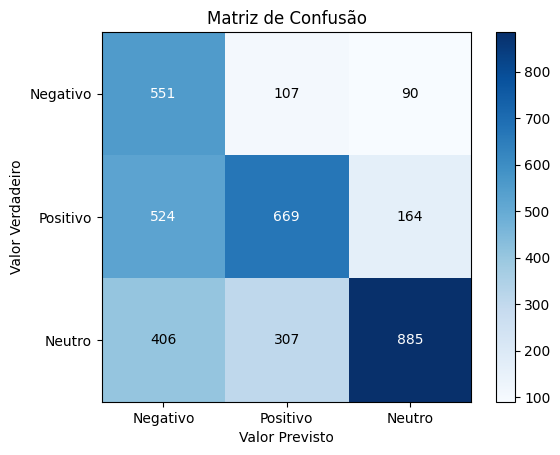

In [191]:
# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plot da matriz de confusão
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Configurações do gráfico
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=['Negativo', 'Positivo', 'Neutro'],
       yticklabels=['Negativo', 'Positivo', 'Neutro'],
       title='Matriz de Confusão',
       ylabel='Valor Verdadeiro',
       xlabel='Valor Previsto')

# Adiciona os valores nas células da matriz
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

# Mostra o gráfico
plt.show()

#### 23.3.4 - Hiperparâmetros com Random Search do Naive Bayes

In [192]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from scipy.stats import uniform
from sklearn.metrics import recall_score

# Função de treinamento Naive Bayes
def classification_naive_bayes(X, Y):
    # Divisão do DataFrame em conjuntos de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

    # Definindo os hiperparâmetros a serem otimizados
    param_dist = {'var_smoothing': uniform(1e-20, 1e-2)}  # Intervalo para o hiperparâmetro var_smoothing

    # Criação do classificador Naive Bayes
    clf = GaussianNB()

    # Realização da busca aleatória com validação cruzada
    random_search = RandomizedSearchCV(clf, param_distributions=param_dist, cv=5, n_iter=10, random_state=42)
    random_search.fit(X_train, y_train)

    # Melhores hiperparâmetros encontrados
    best_params = random_search.best_params_
    print("Melhores hiperparâmetros:", best_params)

    # Treinamento do classificador utilizando os melhores hiperparâmetros
    clf = GaussianNB(**best_params)
    clf.fit(X_train, y_train)

    # Previsões nos dados de teste
    y_pred = clf.predict(X_test)

    # Cálculo do recall
    recall = recall_score(y_test, y_pred, average='weighted')

    # Retorno do recall, y_test, y_pred
    return recall, y_test, y_pred

# Balanceamento dos dados
df_negative = dfoneHot[dfoneHot['sentimento2'] == 0]
df_positive = dfoneHot[dfoneHot['sentimento2'] == 1]
df_neutral = dfoneHot[dfoneHot['sentimento2'] == 2]

dfrnn_balanced = pd.concat([df_negative, df_positive, df_neutral])

# Separando os dados em X e y (balanceados)
X = np.array(dfrnn_balanced.drop(['Frase', 'sentimento2', 'comentário', 'resposta', 'marcação'], axis=1))
Y = np.array(dfrnn_balanced['sentimento2'])

# Chamada da função com os dados balanceados
recall, y_test, y_pred = classification_naive_bayes(X, Y)

# Imprime o recall
print("Recall:", recall)


Melhores hiperparâmetros: {'var_smoothing': 0.0005808361216819946}
Recall: 0.5673778017823387


#### 23.3.5 - Aplicando o hiperparâmetro

In [193]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score
from imblearn.over_sampling import RandomOverSampler

# Balanceamento dos dados
df_negative = dfoneHot[dfoneHot['sentimento2'] == 0]
df_positive = dfoneHot[dfoneHot['sentimento2'] == 1]
df_neutral = dfoneHot[dfoneHot['sentimento2'] == 2]

# Realizar oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, Y_resampled = ros.fit_resample(X, Y)

# Divisão dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, Y_resampled, test_size=0.3, random_state=42)

# Criação do classificador Naive Bayes com o melhor hiperparâmetro
clf = GaussianNB(var_smoothing=0.0005808361216819946)

# Treinamento do classificador
clf.fit(X_train, y_train)

# Previsões nos dados de teste
y_pred = clf.predict(X_test)

# Cálculo do recall
recall = recall_score(y_test, y_pred, average='macro')

# Imprimir o resultado do recall
print("Recall:", recall)


Recall: 0.5898292123381317


### 23.4 - SVM - Três categorias e sem balanceamento

#### 23.4.1 - Definição da Função

In [194]:
def classification_svm(x, y):
  # Dividir o conjunto de dados em treinamento e teste
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

  # Criar e treinar o modelo SVM
  modelo_svm = SVC()
  modelo_svm.fit(x_train, y_train)

  # Fazer previsões no conjunto de teste
  y_pred = modelo_svm.predict(x_test)

  # Calcular a acurácia
  acuracia = accuracy_score(y_test, y_pred)
  print("Acurácia:", acuracia)

  # Calcular o F-score
  fscore = f1_score(y_test, y_pred, average='macro')
  print("F-score:", fscore)

  # Calcular o recall
  recall = recall_score(y_test, y_pred, average='macro')
  print("Recall:", recall)

  # Realizar validação cruzada
  scores = cross_val_score(modelo_svm, x, y, cv=5)  # cv define o número de dobras (folds)
  print("Acurácia da Validação Cruzada:", np.mean(scores))

  return modelo_svm, y_test, y_pred

#### 23.4.2 - Teste da Função

In [195]:
# Balanceamento dos dados
df_negativo = dfoneHot[dfoneHot['sentimento2'] == 0]
df_positive = dfoneHot[dfoneHot['sentimento2'] == 1]
df_neutral = dfoneHot[dfoneHot['sentimento2'] == 2]

dfrnn_balanced = pd.concat([df_negative, df_positive, df_neutral])

# Definir os arrays x e y
x = np.array(dfrnn_balanced.drop(['Frase', 'sentimento2', 'comentário', 'resposta', 'marcação'], axis=1))
y = np.array(dfrnn_balanced['sentimento2'])

model, y_test, y_pred = classification_svm(x, y)

Acurácia: 0.6681069403186606
F-score: 0.6457091163398853
Recall: 0.6398264140105683
Acurácia da Validação Cruzada: 0.6649147319796268


#### 23.4.3 - Matriz de confusão

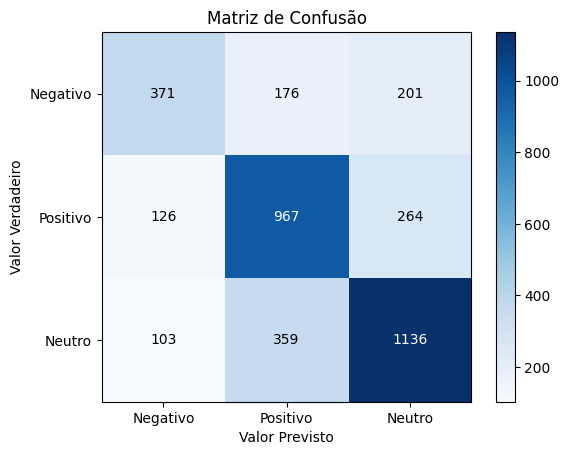

In [196]:
# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plot da matriz de confusão
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Configurações do gráfico
classes = ['Negativo', 'Positivo', 'Neutro']
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       title='Matriz de Confusão',
       ylabel='Valor Verdadeiro',
       xlabel='Valor Previsto')

# Adiciona os valores nas células da matriz
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

# Mostra o gráfico
plt.show()

In [197]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, recall_score
from imblearn.over_sampling import RandomOverSampler

def classification_svm(x, y):
    # Balanceamento dos dados
    df_negative = dfoneHot[dfoneHot['sentimento2'] == 0]
    df_positive = dfoneHot[dfoneHot['sentimento2'] == 1]
    df_neutral = dfoneHot[dfoneHot['sentimento2'] == 2]

    # Realizar oversampling
    ros = RandomOverSampler(random_state=42)
    x_resampled, y_resampled = ros.fit_resample(x, y)

    # Dividir o conjunto de dados em treinamento e teste
    x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)

    # Definir os hiperparâmetros a serem testados
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

    # Criar o modelo SVM
    svm = SVC()

    # Criar o scorer utilizando o recall como métrica
    scorer = make_scorer(recall_score, average='macro')

    # Realizar a busca de grade com validação cruzada
    grid_search = GridSearchCV(svm, param_grid=param_grid, scoring=scorer, cv=5)
    grid_search.fit(x_train, y_train)

    # Melhores hiperparâmetros encontrados
    best_params = grid_search.best_params_
    print("Melhores hiperparâmetros:", best_params)

    # Acessar o valor específico do melhor hiperparâmetro
    best_C = best_params['C']
    print("Melhor valor de C:", best_C)

    # Treinar o modelo SVM utilizando os melhores hiperparâmetros
    modelo_svm = SVC(**best_params)
    modelo_svm.fit(x_train, y_train)

    # Fazer previsões no conjunto de teste
    y_pred = modelo_svm.predict(x_test)

    # Calcular o recall
    recall = recall_score(y_test, y_pred, average='macro')

    # Imprimir o resultado do recall
    print("Recall:", recall)

    return modelo_svm, y_test, y_pred


In [198]:
print("Melhores hiperparâmetros:", best_params)


Melhores hiperparâmetros: {'batch_size': 98, 'learning_rate': 0.001, 'num_epochs': 18, 'num_hidden_units': 109}


#### 23.4.4 - Aplicando os Melhores Hiperparâmetros

In [199]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, recall_score
from imblearn.over_sampling import RandomOverSampler

def classification_svm(x, y):
    # Balanceamento dos dados
    df_negative = dfoneHot[dfoneHot['sentimento2'] == 0]
    df_positive = dfoneHot[dfoneHot['sentimento2'] == 1]
    df_neutral = dfoneHot[dfoneHot['sentimento2'] == 2]

    # Realizar oversampling
    ros = RandomOverSampler(random_state=42)
    x_resampled, y_resampled = ros.fit_resample(x, y)

    # Dividir o conjunto de dados em treinamento e teste
    x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)

    # Definir os hiperparâmetros a serem testados
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

    # Criar o modelo SVM
    svm = SVC()

    # Criar o scorer utilizando o recall como métrica
    scorer = make_scorer(recall_score, average='macro')

    # Realizar a busca de grade com validação cruzada
    grid_search = GridSearchCV(svm, param_grid=param_grid, scoring=scorer, cv=5)
    grid_search.fit(x_train, y_train)

    # Melhores hiperparâmetros encontrados
    best_params = grid_search.best_params_
    print("Melhores hiperparâmetros:", best_params)

    # Acessar o valor específico do melhor hiperparâmetro
    best_C = best_params['C']
    print("Melhor valor de C:", best_C)

    # Treinar o modelo SVM utilizando os melhores hiperparâmetros
    modelo_svm = SVC(**best_params)
    modelo_svm.fit(x_train, y_train)

    # Fazer previsões no conjunto de teste
    y_pred = modelo_svm.predict(x_test)

    # Calcular o recall
    recall = recall_score(y_test, y_pred, average='macro')

    # Calcular a porcentagem do recall
    recall_percent = recall * 100

    # Imprimir o resultado do recall em porcentagem
    print("Recall: {:.2f}%".format(recall_percent))

    return modelo_svm, y_test, y_pred

# Chamar a função com os dados balanceados
classification_svm(X, Y)


Melhores hiperparâmetros: {'C': 100}
Melhor valor de C: 100
Recall: 71.26%


(SVC(C=100), array([2, 1, 1, ..., 1, 0, 2]), array([2, 1, 1, ..., 1, 0, 1]))

### 23.5 - Random forest - Três categorias e sem balanceamento

#### 23.5.1 - Definição da função

In [200]:
def classification_random_forest(x, y):
  # Dividir o conjunto de dados em treinamento e teste
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

  # Criar e treinar o modelo Random Forest
  modelo_rf = RandomForestClassifier()
  modelo_rf.fit(x_train, y_train)

  # Fazer previsões no conjunto de teste
  y_pred = modelo_rf.predict(x_test)

  # Calcular a acurácia
  acuracia = accuracy_score(y_test, y_pred)
  print("Acurácia:", acuracia)

  # Calcular o F-score
  fscore = f1_score(y_test, y_pred, average='macro')
  print("F-score:", fscore)

  # Calcular o recall
  recall = recall_score(y_test, y_pred, average='macro')
  print("Recall:", recall)

  # Realizar validação cruzada
  scores = cross_val_score(modelo_rf, x, y, cv=5)  # cv define o número de dobras (folds)
  print("Acurácia da Validação Cruzada:", np.mean(scores))

  return modelo_rf, y_test, y_pred

#### 23.5.2 - Teste da função

In [201]:
# Balanceamento dos dados
df_negativo = dfoneHot[dfoneHot['sentimento2'] == 0]
df_positive = dfoneHot[dfoneHot['sentimento2'] == 1]
df_neutral = dfoneHot[dfoneHot['sentimento2'] == 2]

dfrnn_balanced = pd.concat([df_negative, df_positive, df_neutral])

# Definir os arrays x e y
x = np.array(dfrnn_balanced.drop(['Frase', 'sentimento2', 'comentário', 'resposta', 'marcação'], axis=1))
y = np.array(dfrnn_balanced['sentimento2'])

model, y_test, y_pred = classification_random_forest(x, y)

Acurácia: 0.694571968674048
F-score: 0.673482765199871
Recall: 0.6698836017946217
Acurácia da Validação Cruzada: 0.6784438545254512


#### 23.5.3 - Matriz de confusão

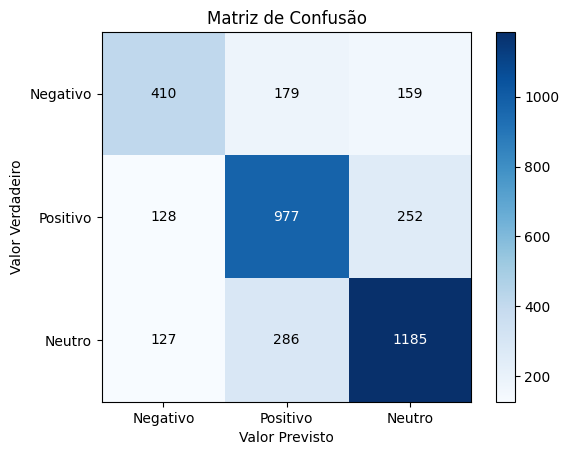

In [202]:
# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plot da matriz de confusão
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Configurações do gráfico
classes = ['Negativo', 'Positivo', 'Neutro']
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       title='Matriz de Confusão',
       ylabel='Valor Verdadeiro',
       xlabel='Valor Previsto')

# Adiciona os valores nas células da matriz
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

# Mostra o gráfico
plt.show()

### 23.6 - Conclusão
Por fim, foi possível concluir que após a aplicação das novas features não houve melhora dos modelos, mas sim a piora das métricas. Por isso concluímos que vamos manter utilizando as features principais, sendo elas "frase" e "sentimento2".

# Gráficos de verificação de resultados, comparação e análise de features

###**Grafico de comparação de resultados utilizando os modelos com três categorias e com balanceamento**

**Comparação de Acurácia**

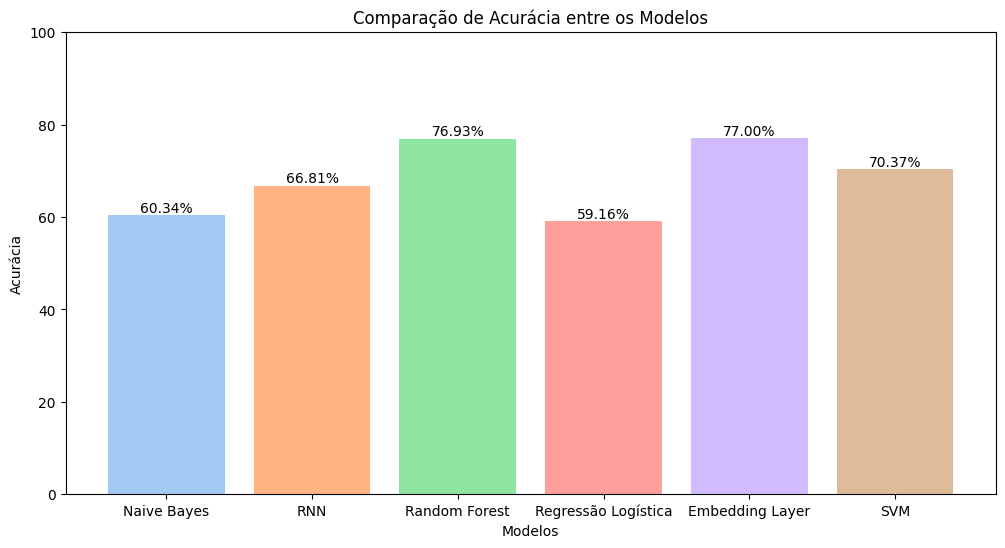

In [238]:
# Valores de revocação para cada modelo
acuracia = [60.34, 66.81, 76.93, 59.16, 77.00, 70.37]

# Rótulos dos modelos
modelos = ['Naive Bayes', 'RNN', 'Random Forest', 'Regressão Logística', 'Embedding Layer', 'SVM']

# Paleta de cores suaves
cores = sns.color_palette('pastel')

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(modelos, acuracia, color=cores)

# Adicionar os valores de revocação acima das barras
for i in range(len(modelos)):
    plt.text(i, acuracia[i], f'{acuracia[i]:.2f}%', ha='center', va='bottom')

plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.title('Comparação de Acurácia entre os Modelos')

# Ajustar os limites dos eixos
plt.ylim(0, 100)

# Mostrar o gráfico
plt.show()


**Comparação de Revocação**

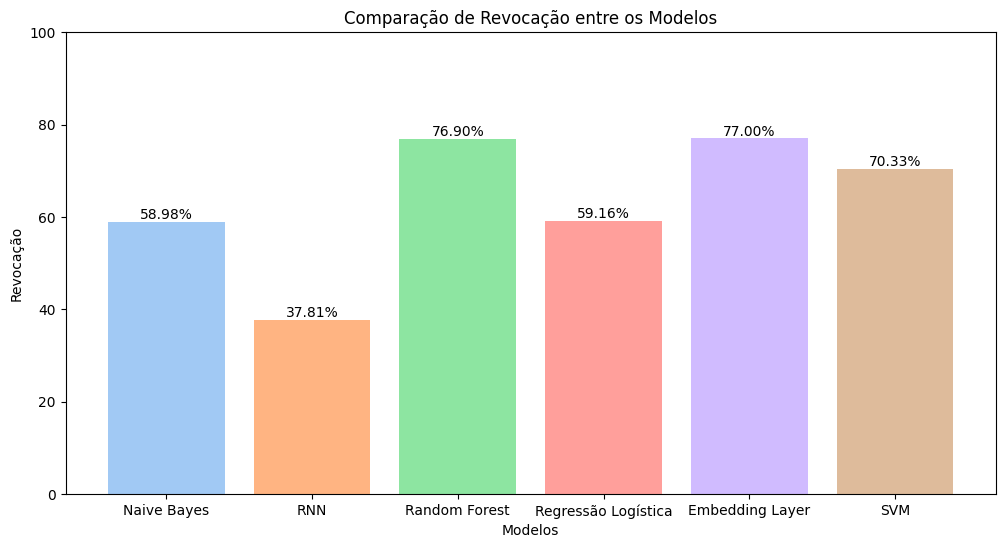

In [237]:
# Valores de revocação para cada modelo
revocacao = [58.98, 37.81, 76.90, 59.16, 77.00, 70.33]

# Rótulos dos modelos
modelos = ['Naive Bayes', 'RNN', 'Random Forest', 'Regressão Logística', 'Embedding Layer', 'SVM']

# Paleta de cores suaves
cores = sns.color_palette('pastel')

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(modelos, revocacao, color=cores)

# Adicionar os valores de revocação acima das barras
for i in range(len(modelos)):
    plt.text(i, revocacao[i], f'{revocacao[i]:.2f}%', ha='center', va='bottom')

plt.xlabel('Modelos')
plt.ylabel('Revocação')
plt.title('Comparação de Revocação entre os Modelos')

# Ajustar os limites dos eixos
plt.ylim(0, 100)

# Mostrar o gráfico
plt.show()


**Comparação dos modelos com melhores resultados**

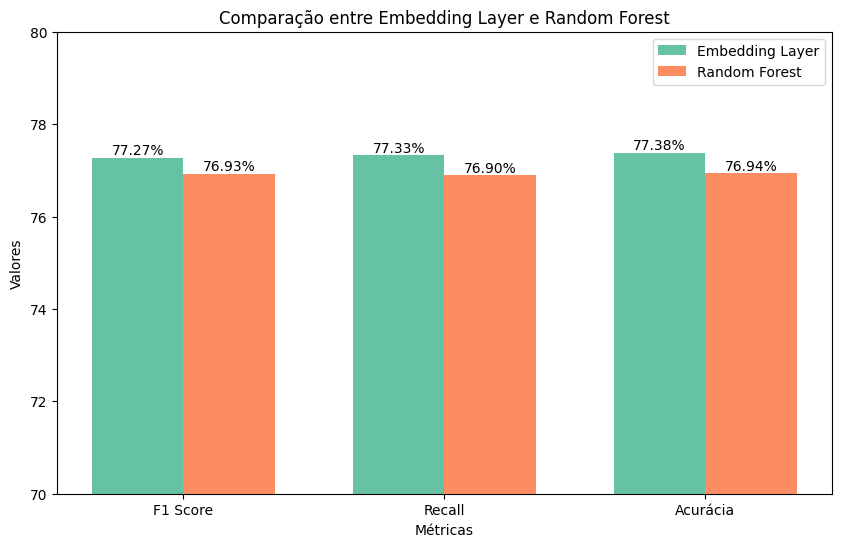

In [242]:
import matplotlib.pyplot as plt
import numpy as np

# Métricas para o modelo Embedding Layer
emb_f1score = 77.27
emb_recall = 77.33
emb_acuracia = 77.38

# Métricas para o modelo Random Forest
rf_acuracia = 76.94
rf_fscore = 76.93
rf_recall = 76.90

# Rótulos das métricas
metricas = ['F1 Score', 'Recall', 'Acurácia']

# Valores para o modelo Embedding Layer
emb_valores = [emb_f1score, emb_recall, emb_acuracia]

# Valores para o modelo Random Forest
rf_valores = [rf_fscore, rf_recall, rf_acuracia]

# Posições das barras no eixo x
posicoes = np.arange(len(metricas))

# Largura das barras
largura = 0.35

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(posicoes, emb_valores, largura, label='Embedding Layer', color='#66c2a5')
plt.bar(posicoes + largura, rf_valores, largura, label='Random Forest', color='#fc8d62')

# Adicionar os valores acima das barras
for i, j in zip(posicoes, emb_valores):
    plt.text(i, j, f'{j:.2f}%', ha='center', va='bottom')

for i, j in zip(posicoes + largura, rf_valores):
    plt.text(i, j, f'{j:.2f}%', ha='center', va='bottom')

plt.xlabel('Métricas')
plt.ylabel('Valores')
plt.title('Comparação entre Embedding Layer e Random Forest')
plt.xticks(posicoes + largura/2, metricas)
plt.legend()

# Ajustar os limites dos eixos
plt.ylim(70, 80)

# Mostrar o gráfico
plt.show()


###**Gráfico Sentimento x Tipo de Interação**

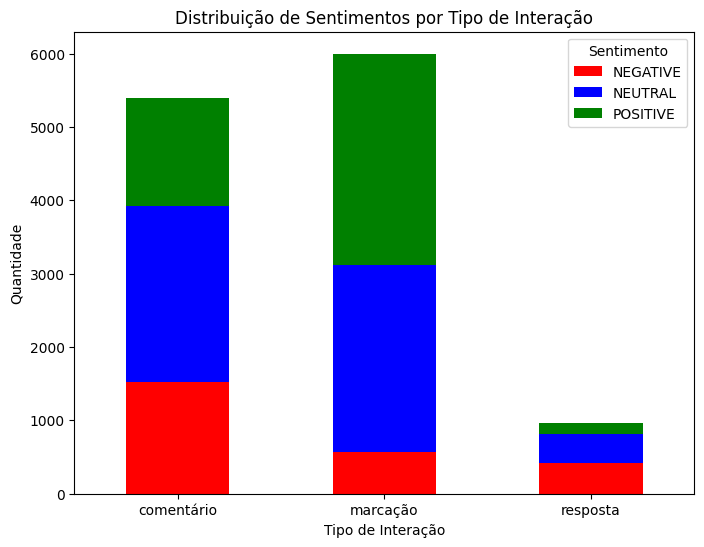

In [224]:
import matplotlib.pyplot as plt

# Contagem dos sentimentos por tipo de interação
sentimento_count = base_tratada.groupby(['tipoInteracao', 'sentimento']).size().unstack()

# Criação do gráfico de barras empilhadas
sentimento_count.plot(kind='bar', stacked=True, figsize=(8, 6), color=['red', 'blue', 'green'])

# Configurações do gráfico
plt.xlabel('Tipo de Interação')
plt.ylabel('Quantidade')
plt.title('Distribuição de Sentimentos por Tipo de Interação')
plt.legend(title='Sentimento', loc='upper right')

# Rotação dos rótulos do eixo x
plt.xticks(rotation=0)

# Exibição do gráfico
plt.show()
